In [11]:
# install.packages(c('dplyr','languageserver'))
# install.packages("tibble")
# install.packages("ggplot2", "grid","gridExtra")
# install.packages("sqldf")

library(tibble)
library(dplyr)
library(ggplot2)
library(sqldf)
library(grid)
library(gridExtra)

## es 1

In [12]:
file_lake = "/home/pietro/Desktop/Advance_stat/data/Lake_Data.csv"
scottish.lakes <- read.csv(file_lake,sep=",",header = TRUE)
head(scottish.lakes)
str(scottish.lakes)

,Lake.name,Volume,Area,Length,Max..depth,Mean.depth
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,Ness,7.45,56.0,39.0,230,132.0
2,Lomond,2.60,71.0,36.0,190,37.0
3,Morar,2.30,27.0,18.8,310,87.0
4,Tay,1.60,26.4,23.0,150,60.6
5,Awe,1.20,39.0,41.0,94,32.0
6,Maree,1.09,28.6,20.0,114,38.0


'data.frame':	13 obs. of  6 variables:
 $ Lake.name : chr  "Ness" "Lomond" "Morar" "Tay" ...
 $ Volume    : num  7.45 2.6 2.3 1.6 1.2 1.09 1.08 1.07 0.97 0.79 ...
 $ Area      : num  56 71 27 26.4 39 28.6 18.6 16 19 19.5 ...
 $ Length    : num  39 36 18.8 23 41 20 23 16 15.7 28 ...
 $ Max..depth: int  230 190 310 150 94 114 156 162 134 128 ...
 $ Mean.depth: num  132 37 87 60.6 32 38 57.6 70 51 40 ...


In [13]:
vol_max <- max(scottish.lakes$Volume)
vol_min <- min(scottish.lakes$Volume)
area_max <- max(scottish.lakes$Area)
area_min <- min(scottish.lakes$Area)

m <- c(vol_max,vol_min,area_max,area_min)

sprintf("The lake %s has the highest Volume of %g [km3]", (scottish.lakes$Lake.name[is.element(scottish.lakes$Volume, vol_max)]), vol_max)
sprintf("The lake %s has the lowest Volume of %g [km3]", (scottish.lakes$Lake.name[is.element(scottish.lakes$Volume, vol_min)]), vol_min)
sprintf("The lake %s has the highest Area of %g [km2]", (scottish.lakes$Lake.name[is.element(scottish.lakes$Area, area_max)]), area_max)
sprintf("The lake %s has the lowest Area of %g [km2]", (scottish.lakes$Lake.name[is.element(scottish.lakes$Area, area_min)]), area_min)


[1] "The lake Ness has the highest Volume of 7.45 [km3]"

[1] "The lake Shin has the lowest Volume of 0.35 [km3]"

[1] "The lake Lomond has the highest Area of 71 [km2]"

[1] "The lake Katrine has the lowest Area of 12.4 [km2]"

In [14]:
#2

lakes_area <- scottish.lakes[order(scottish.lakes$Area, decreasing=TRUE),]

sprintf("The two largest area lakes are the %s lake and the %s lake", lakes_area$Lake.name[1],lakes_area$Lake.name[2])


[1] "The two largest area lakes are the Lomond lake and the Ness lake"

In [15]:
area_water <- sum(scottish.lakes$Area)
cat("The total area of Scotland covered by water is",area_water, "km2")


The total area of Scotland covered by water is 372 km2

## es 2

In [16]:
file_oil = "/home/pietro/Desktop/Advance_stat/data/crude-oil-prices.csv"
df <- read.csv(file_oil,sep=",",header = TRUE)
head(df)
str(df)

,Entity,Code,Year,Oil...Crude.prices.since.1861..current...
,<chr>,<chr>,<int>,<dbl>
1,World,OWID_WRL,1861,0.49
2,World,OWID_WRL,1862,1.05
3,World,OWID_WRL,1863,3.15
4,World,OWID_WRL,1864,8.06
5,World,OWID_WRL,1865,6.59
6,World,OWID_WRL,1866,3.74


'data.frame':	160 obs. of  4 variables:
 $ Entity                                   : chr  "World" "World" "World" "World" ...
 $ Code                                     : chr  "OWID_WRL" "OWID_WRL" "OWID_WRL" "OWID_WRL" ...
 $ Year                                     : int  1861 1862 1863 1864 1865 1866 1867 1868 1869 1870 ...
 $ Oil...Crude.prices.since.1861..current...: num  0.49 1.05 3.15 8.06 6.59 3.74 2.41 3.63 3.64 3.86 ...


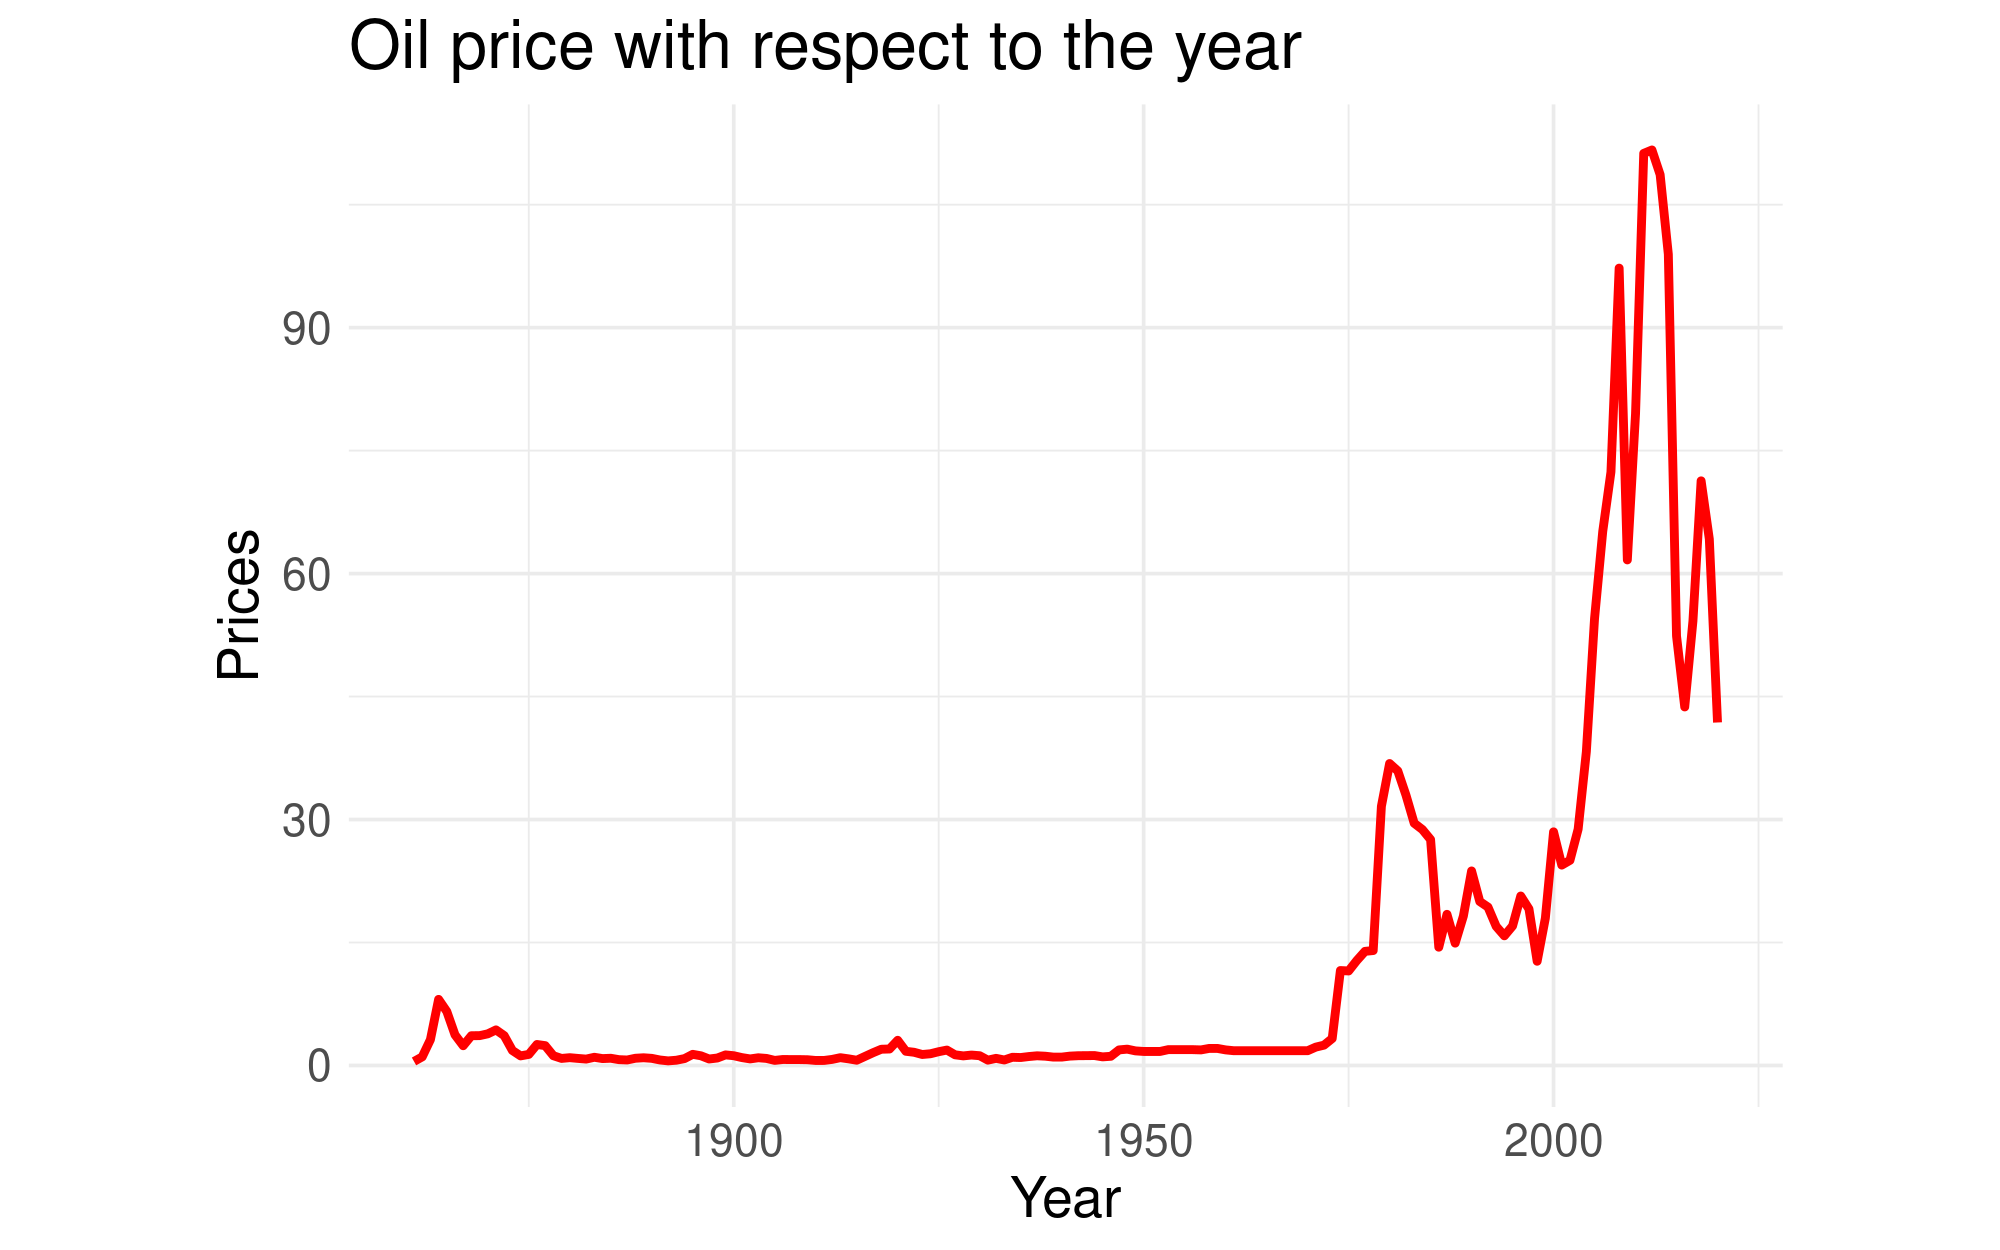

In [17]:
year <- df$Year
prices <- df$'Oil...Crude.prices.since.1861..current...'

options(repr.plot.width = 8, repr.plot.height = 5, repr.plot.res = 250)

ggplot(df, aes(Year, Oil...Crude.prices.since.1861..current...))+
    geom_line(size=1.2, color="red") +
    labs(x="Year", y="Prices", title="Oil price with respect to the year") + 
    theme_minimal() + theme(text = element_text(size=16)) + coord_fixed(ratio = 1)


In [18]:
max_price <- max(prices)
year_max_price <- df$Year[is.element(df$'Oil...Crude.prices.since.1861..current...', max_price)]
# year_max_price
cat(sprintf("the max price is %g $ and it occured in the year %s",max_price, year_max_price))

the max price is 111.67 $ and it occured in the year 2012

 num [1:159] 0.56 2.1 4.91 -1.47 -2.85 ...


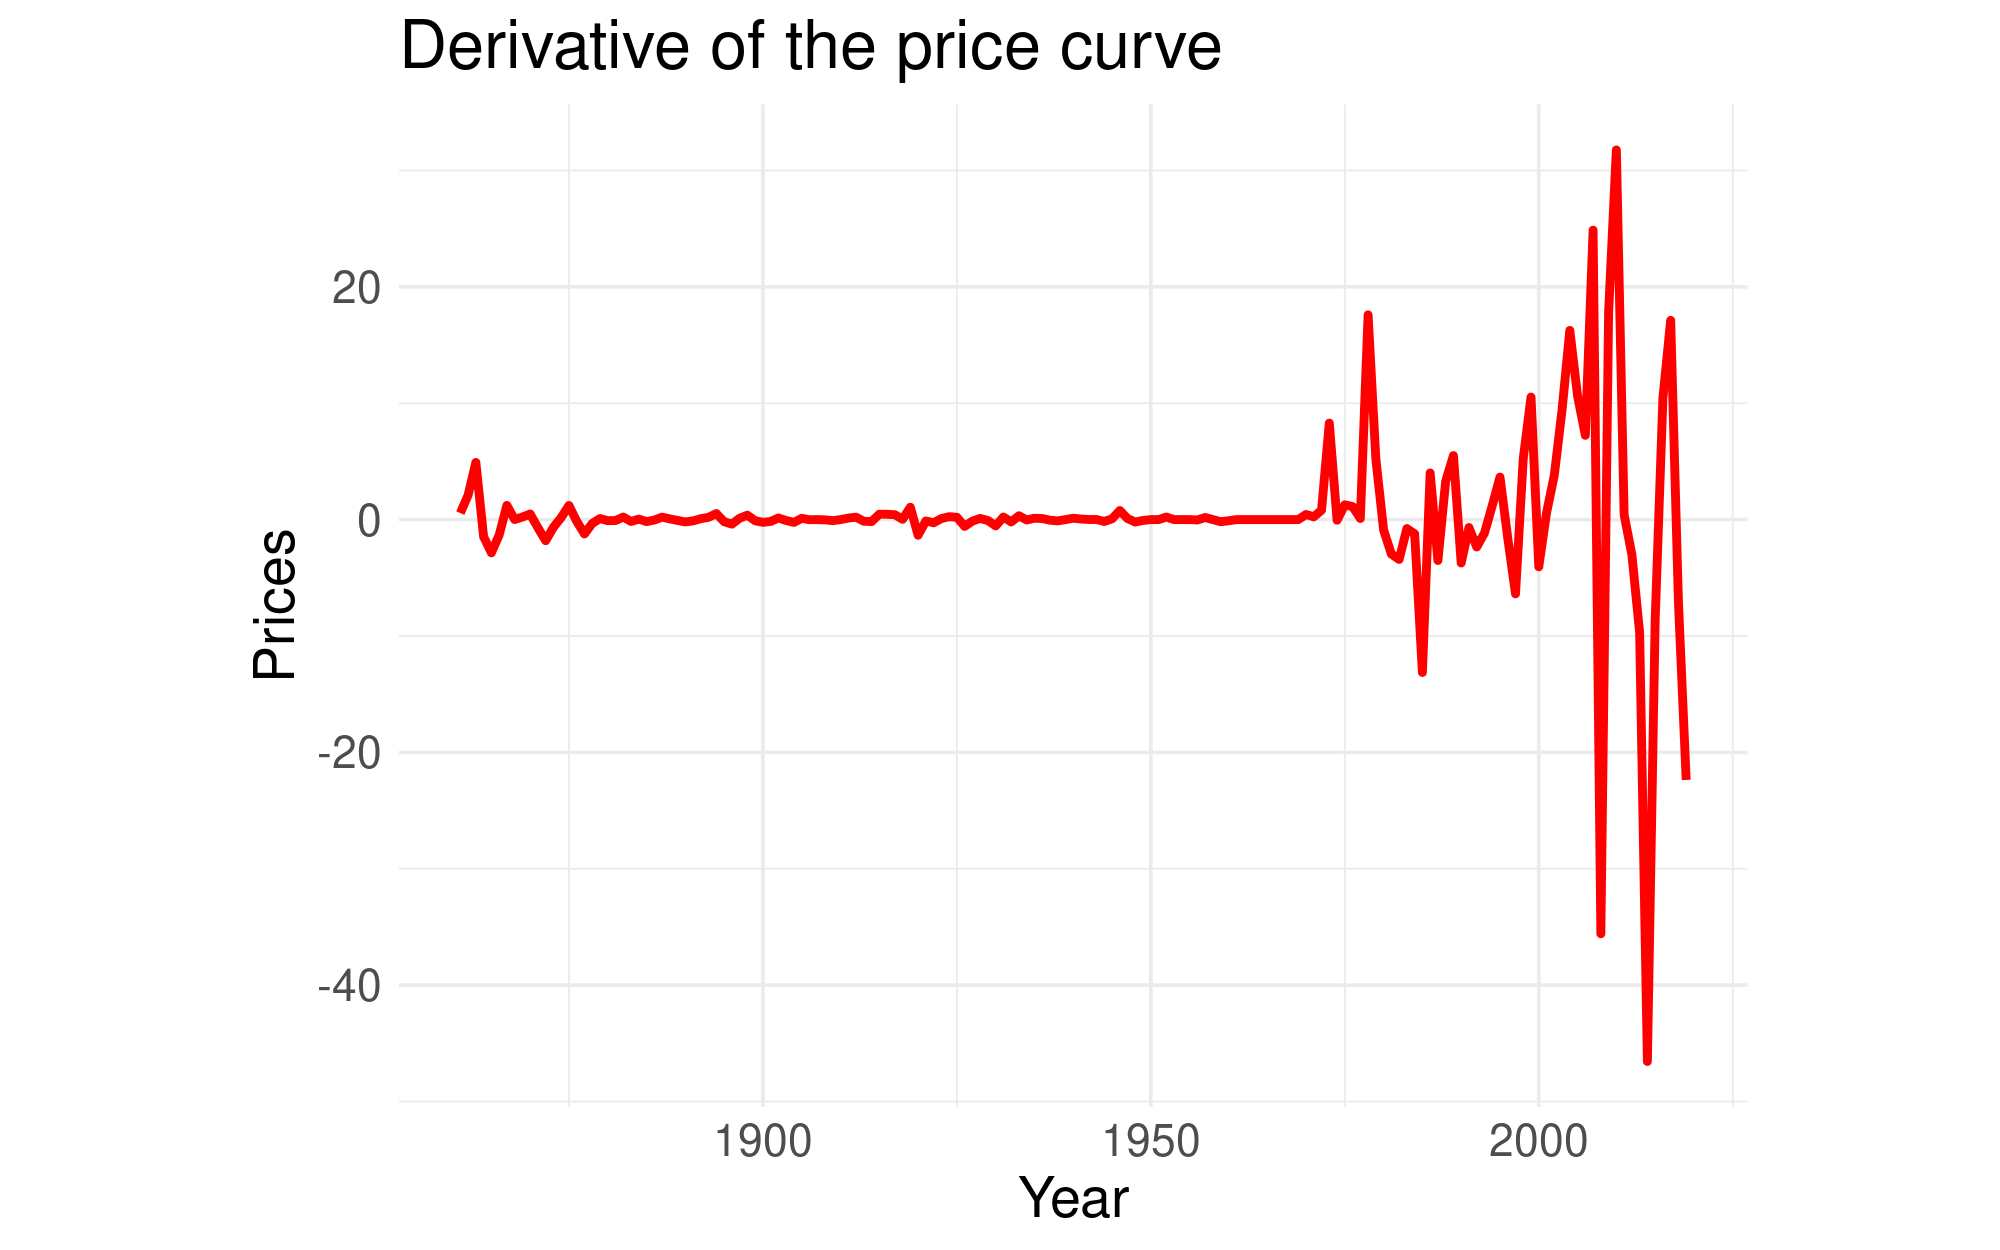

In [19]:
der <- vector()
for (i in 1:length(prices)-1) {
    der<-append(der, prices[i+1] - prices[i])
}
str(der)

options(repr.plot.width = 8, repr.plot.height = 5, repr.plot.res = 250)

ggplot(, aes(year[1:length(year)-1], der)) +
    geom_line(size=1.2, color="red") +
    labs(x="Year", y="Prices", title="Derivative of the price curve") + 
    theme_minimal() + theme(text = element_text(size=16)) + coord_fixed(ratio = 1.5)



## es 3

In [20]:
file_coal = "/home/pietro/Desktop/Advance_stat/data/coal-production-by-country.csv"
df_coal <- read.csv(file_coal,sep=",",header = TRUE)
head(df_coal)
str(df_coal)
coal_tibble <- as_tibble(df_coal)


,Entity,Code,Year,Coal.production..TWh.
,<chr>,<chr>,<int>,<dbl>
1,Afghanistan,AFG,1900,0
2,Afghanistan,AFG,1901,0
3,Afghanistan,AFG,1902,0
4,Afghanistan,AFG,1903,0
5,Afghanistan,AFG,1904,0
6,Afghanistan,AFG,1905,0


'data.frame':	11528 obs. of  4 variables:
 $ Entity               : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Code                 : chr  "AFG" "AFG" "AFG" "AFG" ...
 $ Year                 : int  1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 ...
 $ Coal.production..TWh.: num  0 0 0 0 0 0 0 0 0 0 ...


In [21]:
countries <-unique(df_coal$Entity)
n_countries <- length(countries)
cat("The number of countries is", n_countries)
i<-0

# this is a dataframe of counts of the entries per country
country_unique_df <- aggregate(data.frame(count = df_coal$Entity), list(value = df_coal$Entity), length)

df_coal_1970 <- df_coal[df_coal$Year >= 1970,]
country_unique_df_1970 <- aggregate(data.frame(count = df_coal_1970$Entity), list(value = df_coal_1970$Entity), length)
colnames(country_unique_df_1970) <- c("country","count") 


head(country_unique_df_1970)
str(country_unique_df_1970)

The number of countries is 200

,country,count
,<chr>,<int>
1,Afghanistan,47
2,Africa,39
3,Albania,47
4,American Samoa,37
5,Antigua and Barbuda,37
6,Armenia,25


'data.frame':	179 obs. of  2 variables:
 $ country: chr  "Afghanistan" "Africa" "Albania" "American Samoa" ...
 $ count  : int  47 39 47 37 37 25 31 47 39 39 ...


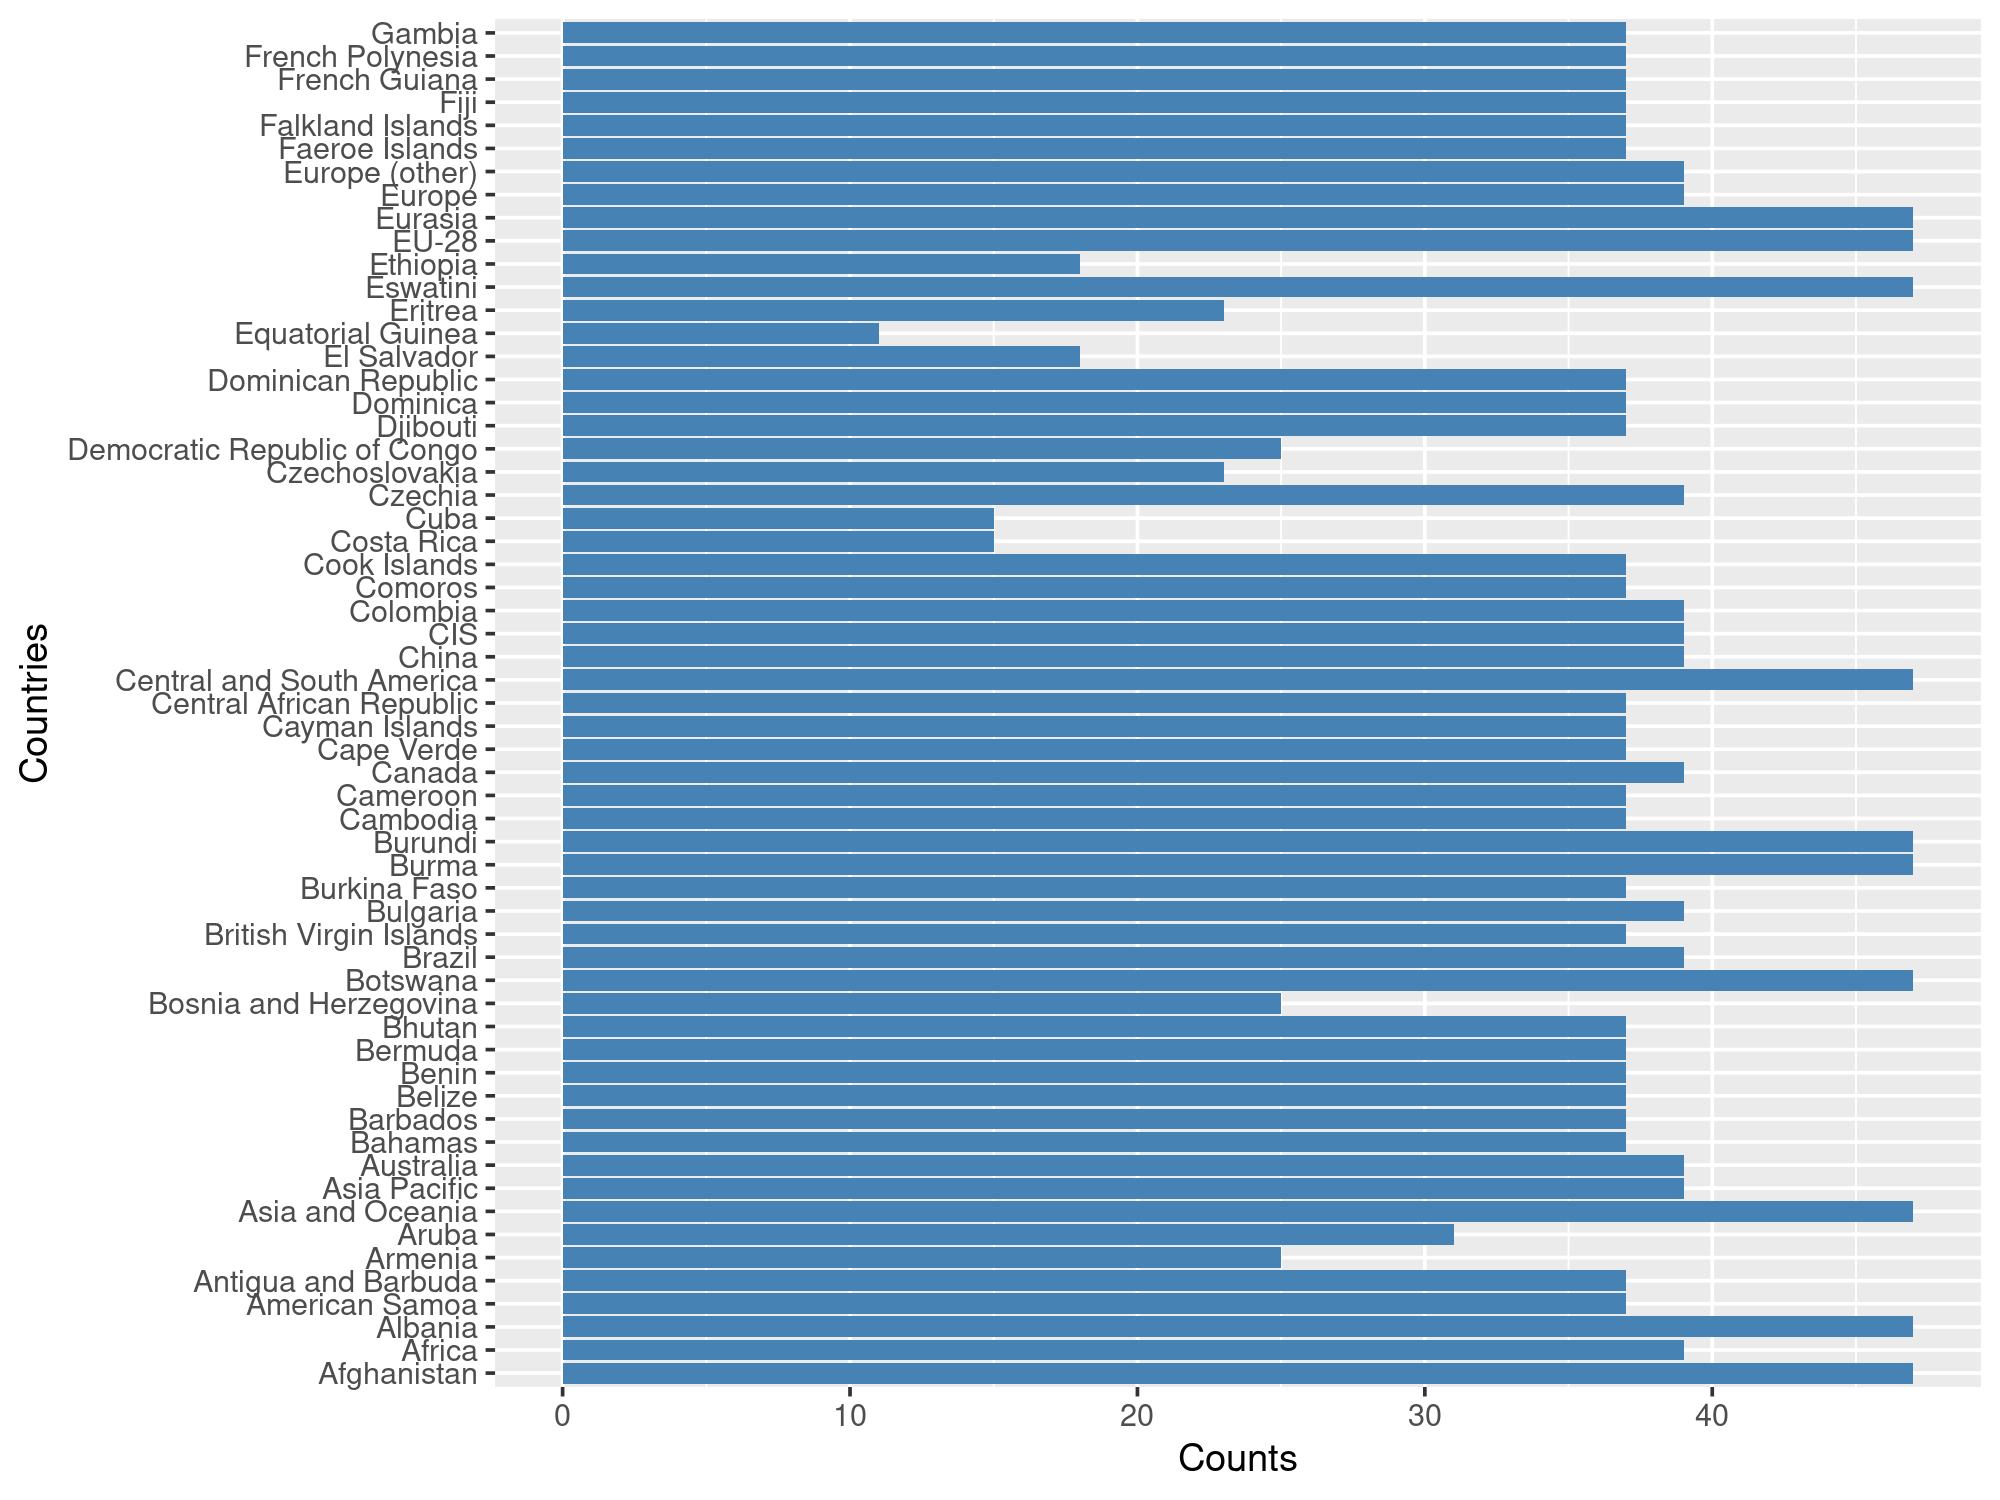

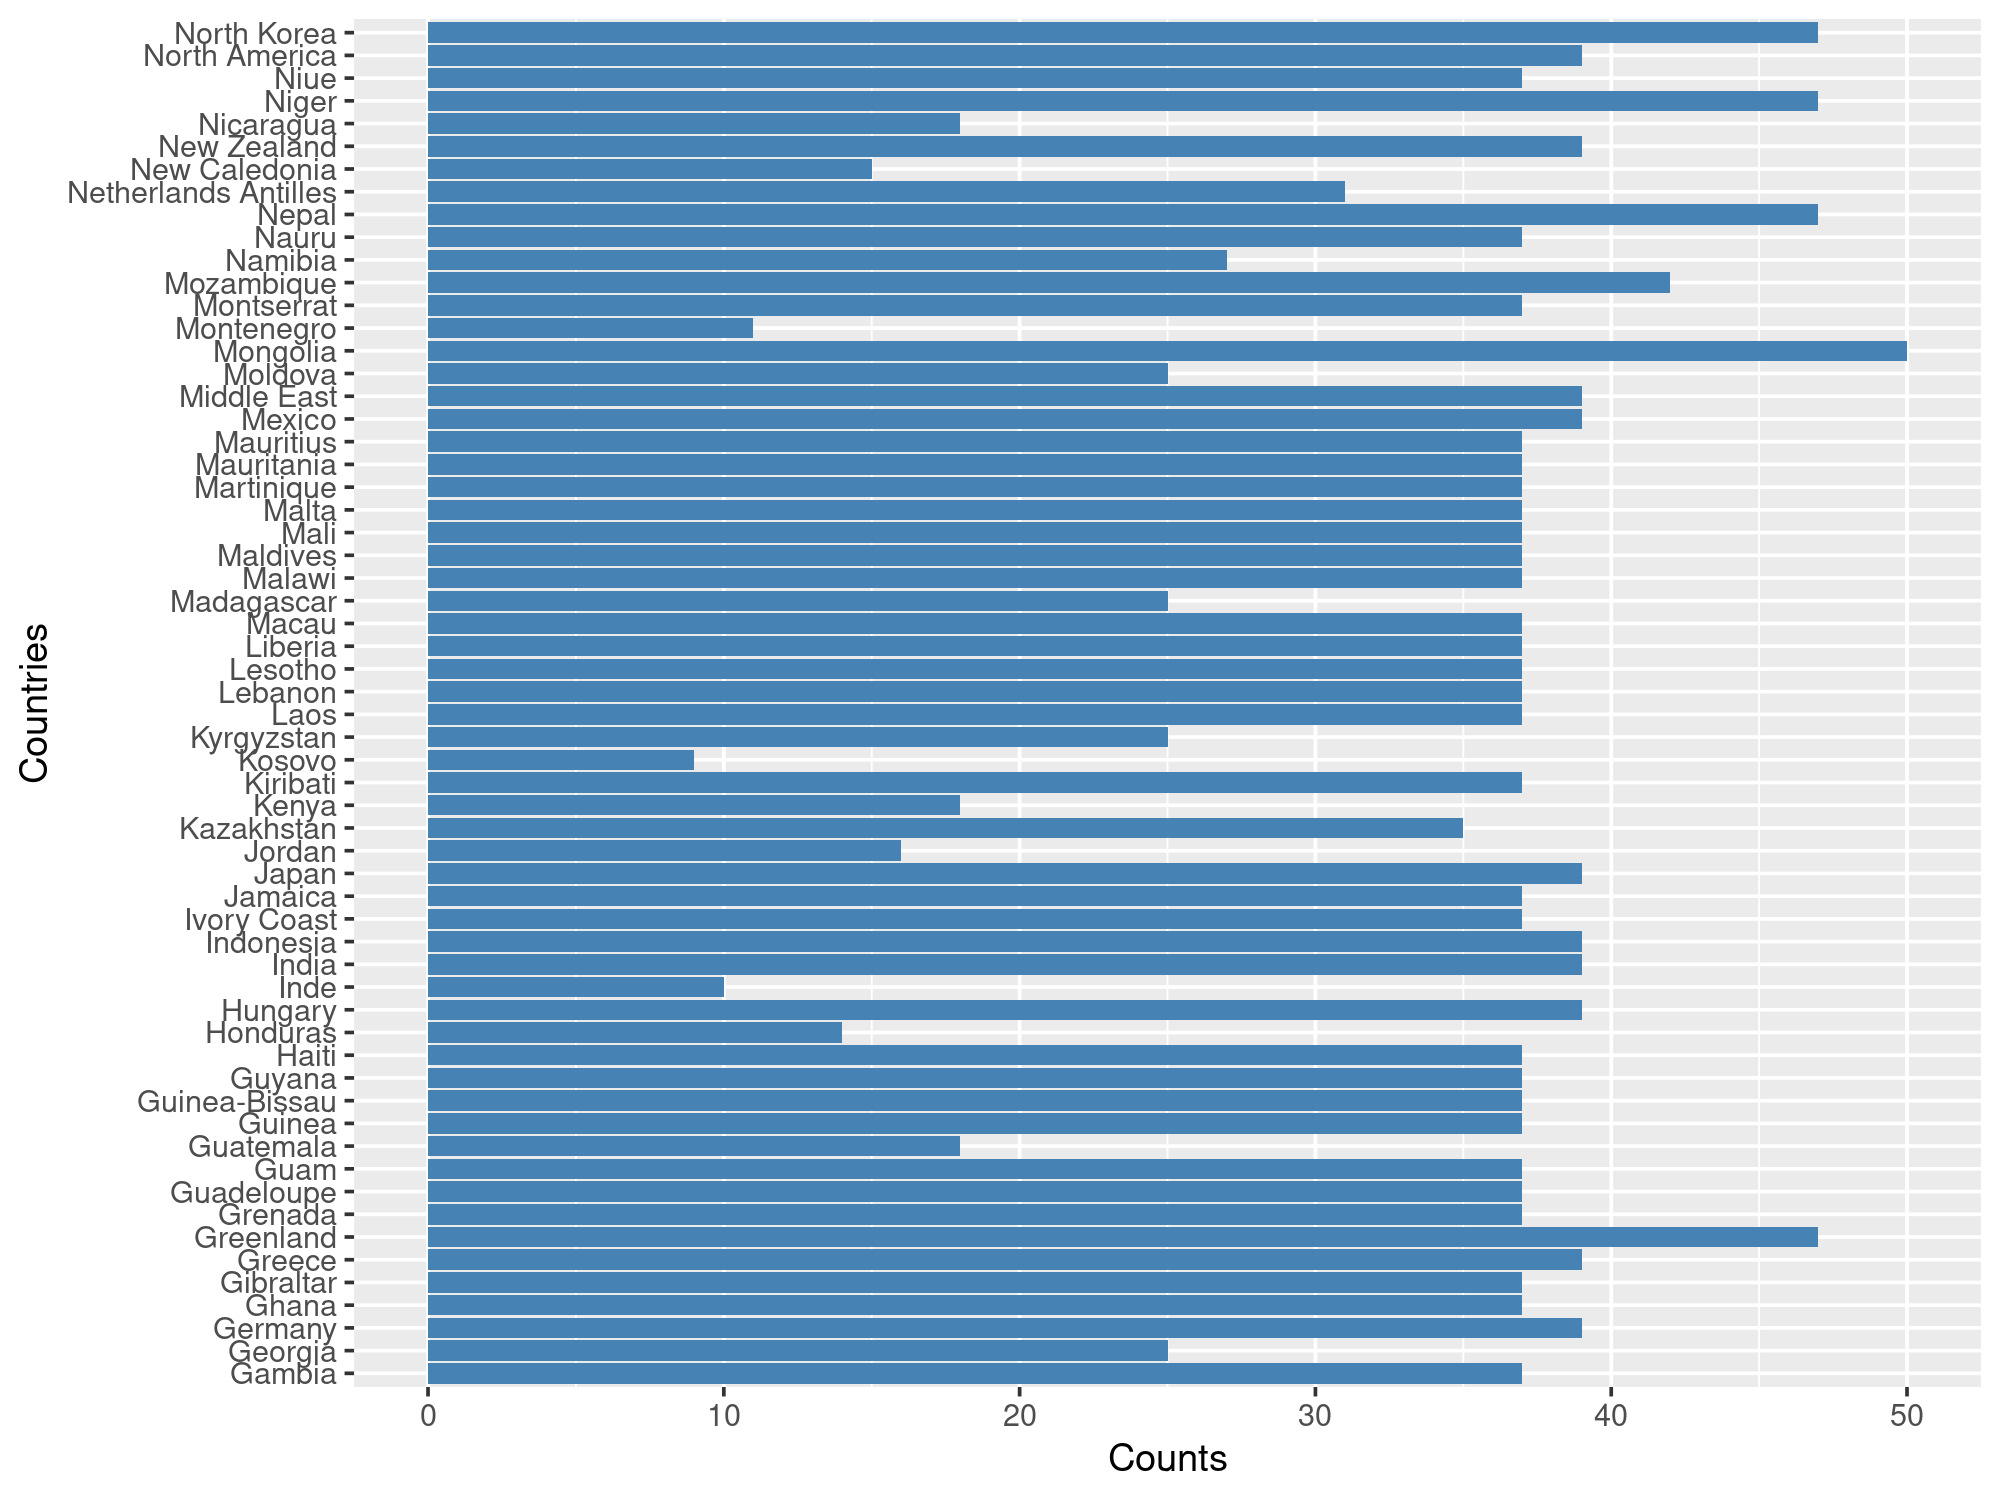

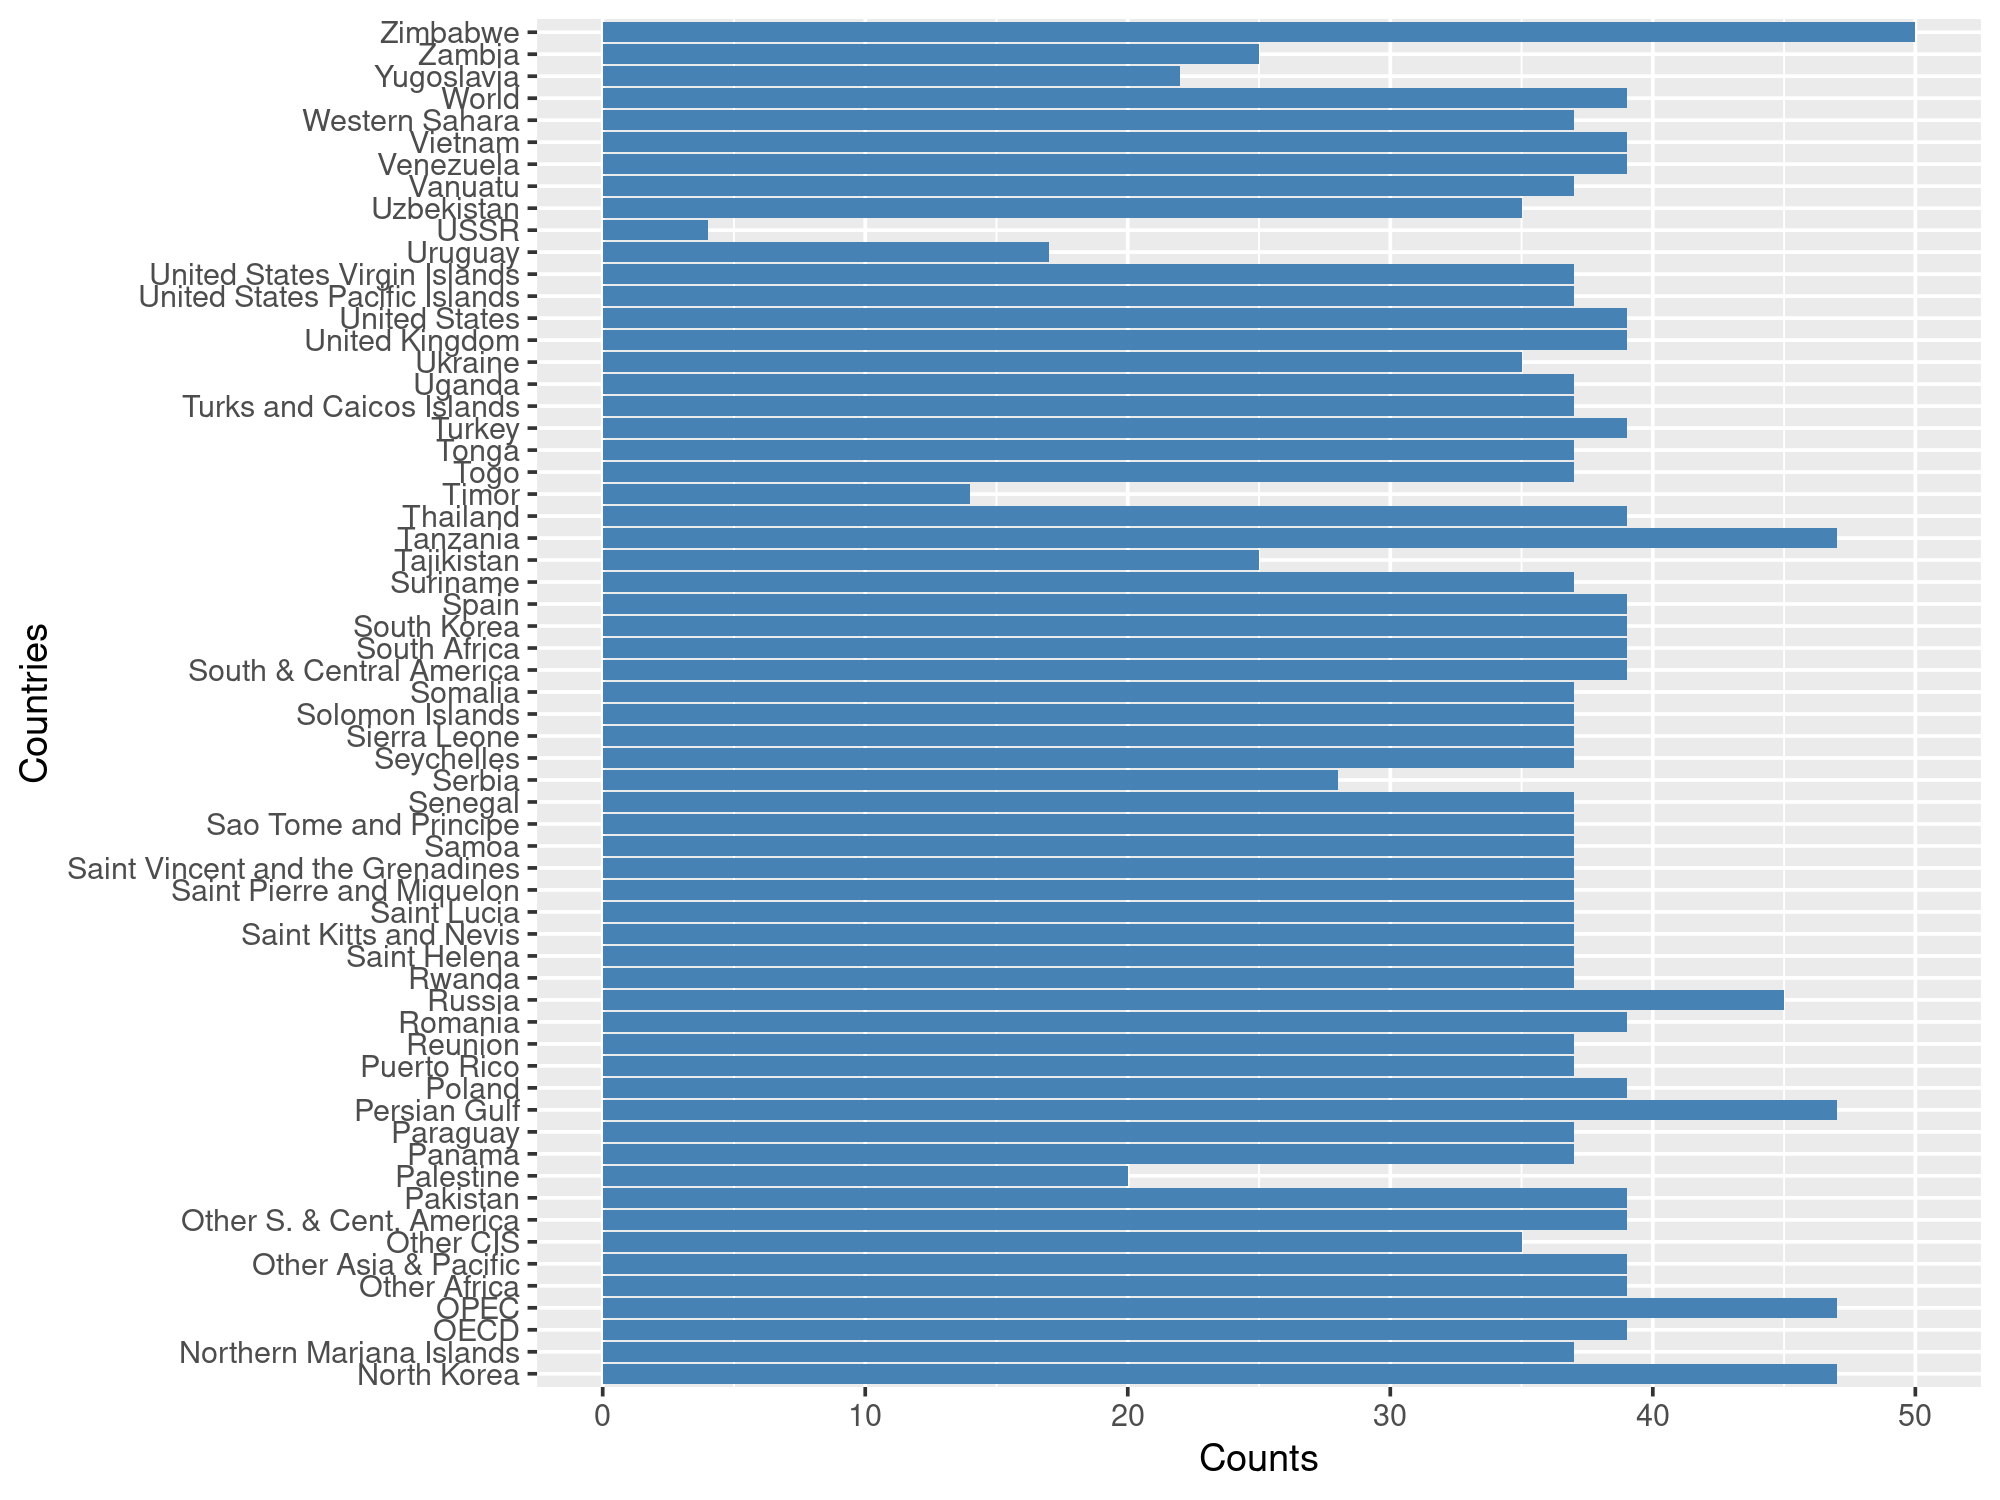

In [22]:
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 250)

# '''
# I splitted the figure in 3 different one to simplify and order the plot
# '''
split <- as.integer(length(country_unique_df_1970$country) / 3)

ggplot(country_unique_df_1970[c(1:split),] , aes(x=country, y=count)) + 
  geom_bar(stat = "identity",fill="steelblue") +
  coord_flip() +
  labs(y="Counts", x="Countries")

ggplot(country_unique_df_1970[c(split : (2*split)),] , aes(x=country, y=count)) + 
  geom_bar(stat = "identity",fill="steelblue") +
  coord_flip() +
  labs(y="Counts", x="Countries")

ggplot(country_unique_df_1970[c( (2*split) : length(country_unique_df_1970$country)),] , aes(x=country, y=count)) + 
  geom_bar(stat = "identity",fill="steelblue") +
  coord_flip() +
  labs(y="Counts", x="Countries")


In [23]:
tot_sum <- vector()
countries <- country_unique_df_1970$country
for (i in 1:length(countries)){
    temp_v <- vector()
    temp_v <- df_coal_1970[is.element(df_coal_1970$Entity, countries[i]),]$Coal.production..TWh.
    tot_sum <- append(tot_sum, sum(temp_v))

}

country_unique_df_1970$production <- tot_sum
cat("Here the dataframe showing how many times a counrty appears in the dataframe")
head(country_unique_df_1970)

cat("Below, the dataframe sorted by the total production")
head(country_unique_df_1970[order(country_unique_df_1970$production, decreasing = TRUE),],)


Here the dataframe showing how many times a counrty appears in the dataframe

,country,count,production
,<chr>,<int>,<dbl>
1,Afghanistan,47,83.102
2,Africa,39,57836.224
3,Albania,47,101.490
4,American Samoa,37,0.000
5,Antigua and Barbuda,37,0.000
6,Armenia,25,0.000


Below, the dataframe sorted by the total production

,country,count,production
,<chr>,<int>,<dbl>
176,World,39,1260113.2
9,Asia Pacific,39,690240.5
8,Asia and Oceania,47,685960.0
32,China,39,459564.6
120,OECD,39,438441.4
117,North America,39,244443.4


[1] "Here are the top 5 Countries with highest coal productions"


,country,count,production
,<chr>,<int>,<dbl>
32,China,39,459564.65
166,United States,39,226068.84
135,Russia,45,101908.49
10,Australia,39,83077.07
77,India,39,77043.45


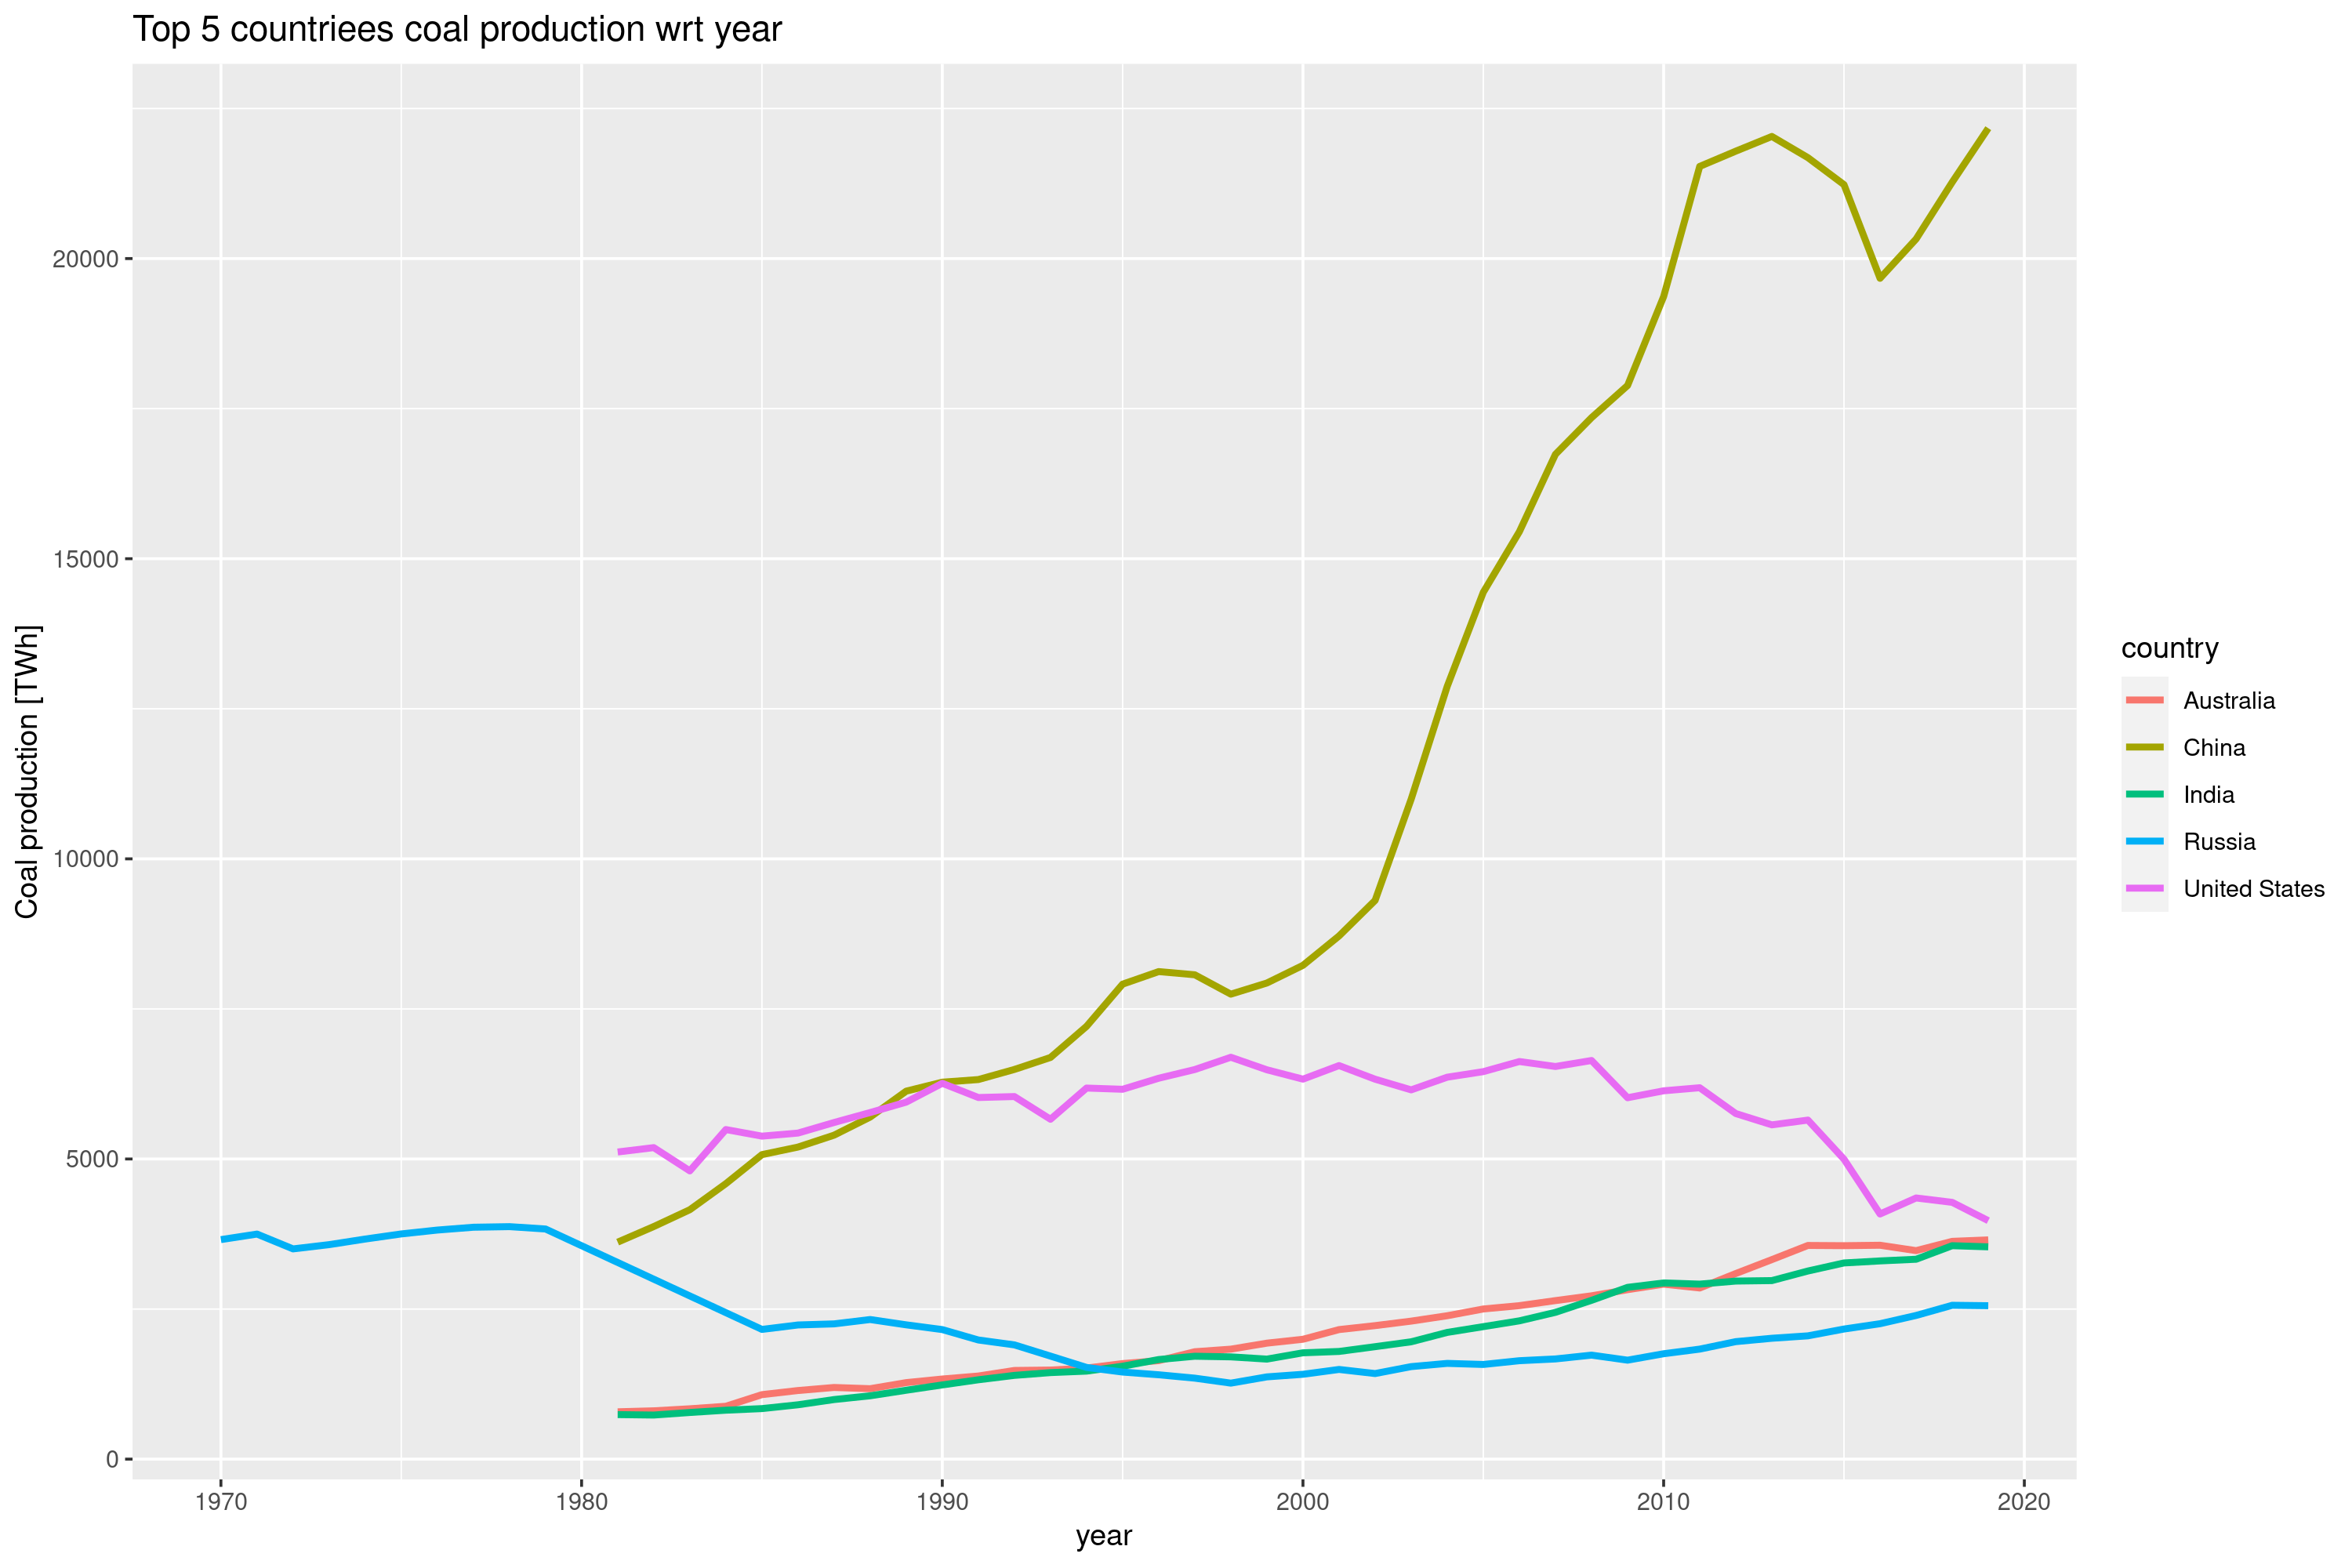

In [24]:
#4
sort_coal_df <- country_unique_df_1970[order(country_unique_df_1970$production, decreasing = TRUE),]
top_prod <- sort_coal_df[c(1:5),]$country

# The top 5 countries with the highest coal production selected from the last dataframe
top_country_prod <- c("China", "United States", "Russia", "Australia", "India")

print("Here are the top 5 Countries with highest coal productions")
sort_coal_df[is.element(sort_coal_df$country, top_country_prod),]


# dataframe of the top 5 countries with the production by year
top_country_prod_df <- df_coal_1970[is.element(df_coal_1970$Entity, top_country_prod),]

#plot of the production by year of the top 5 coal productor
options(repr.plot.width=12, repr.plot.height=8)
ggplot(data = top_country_prod_df, aes(Year, Coal.production..TWh., color = as.character(Entity))) + 
    geom_line(size=1.2) +
    labs(title="Top 5 countriees coal production wrt year", x="year", y="Coal production [TWh]", color = "country")

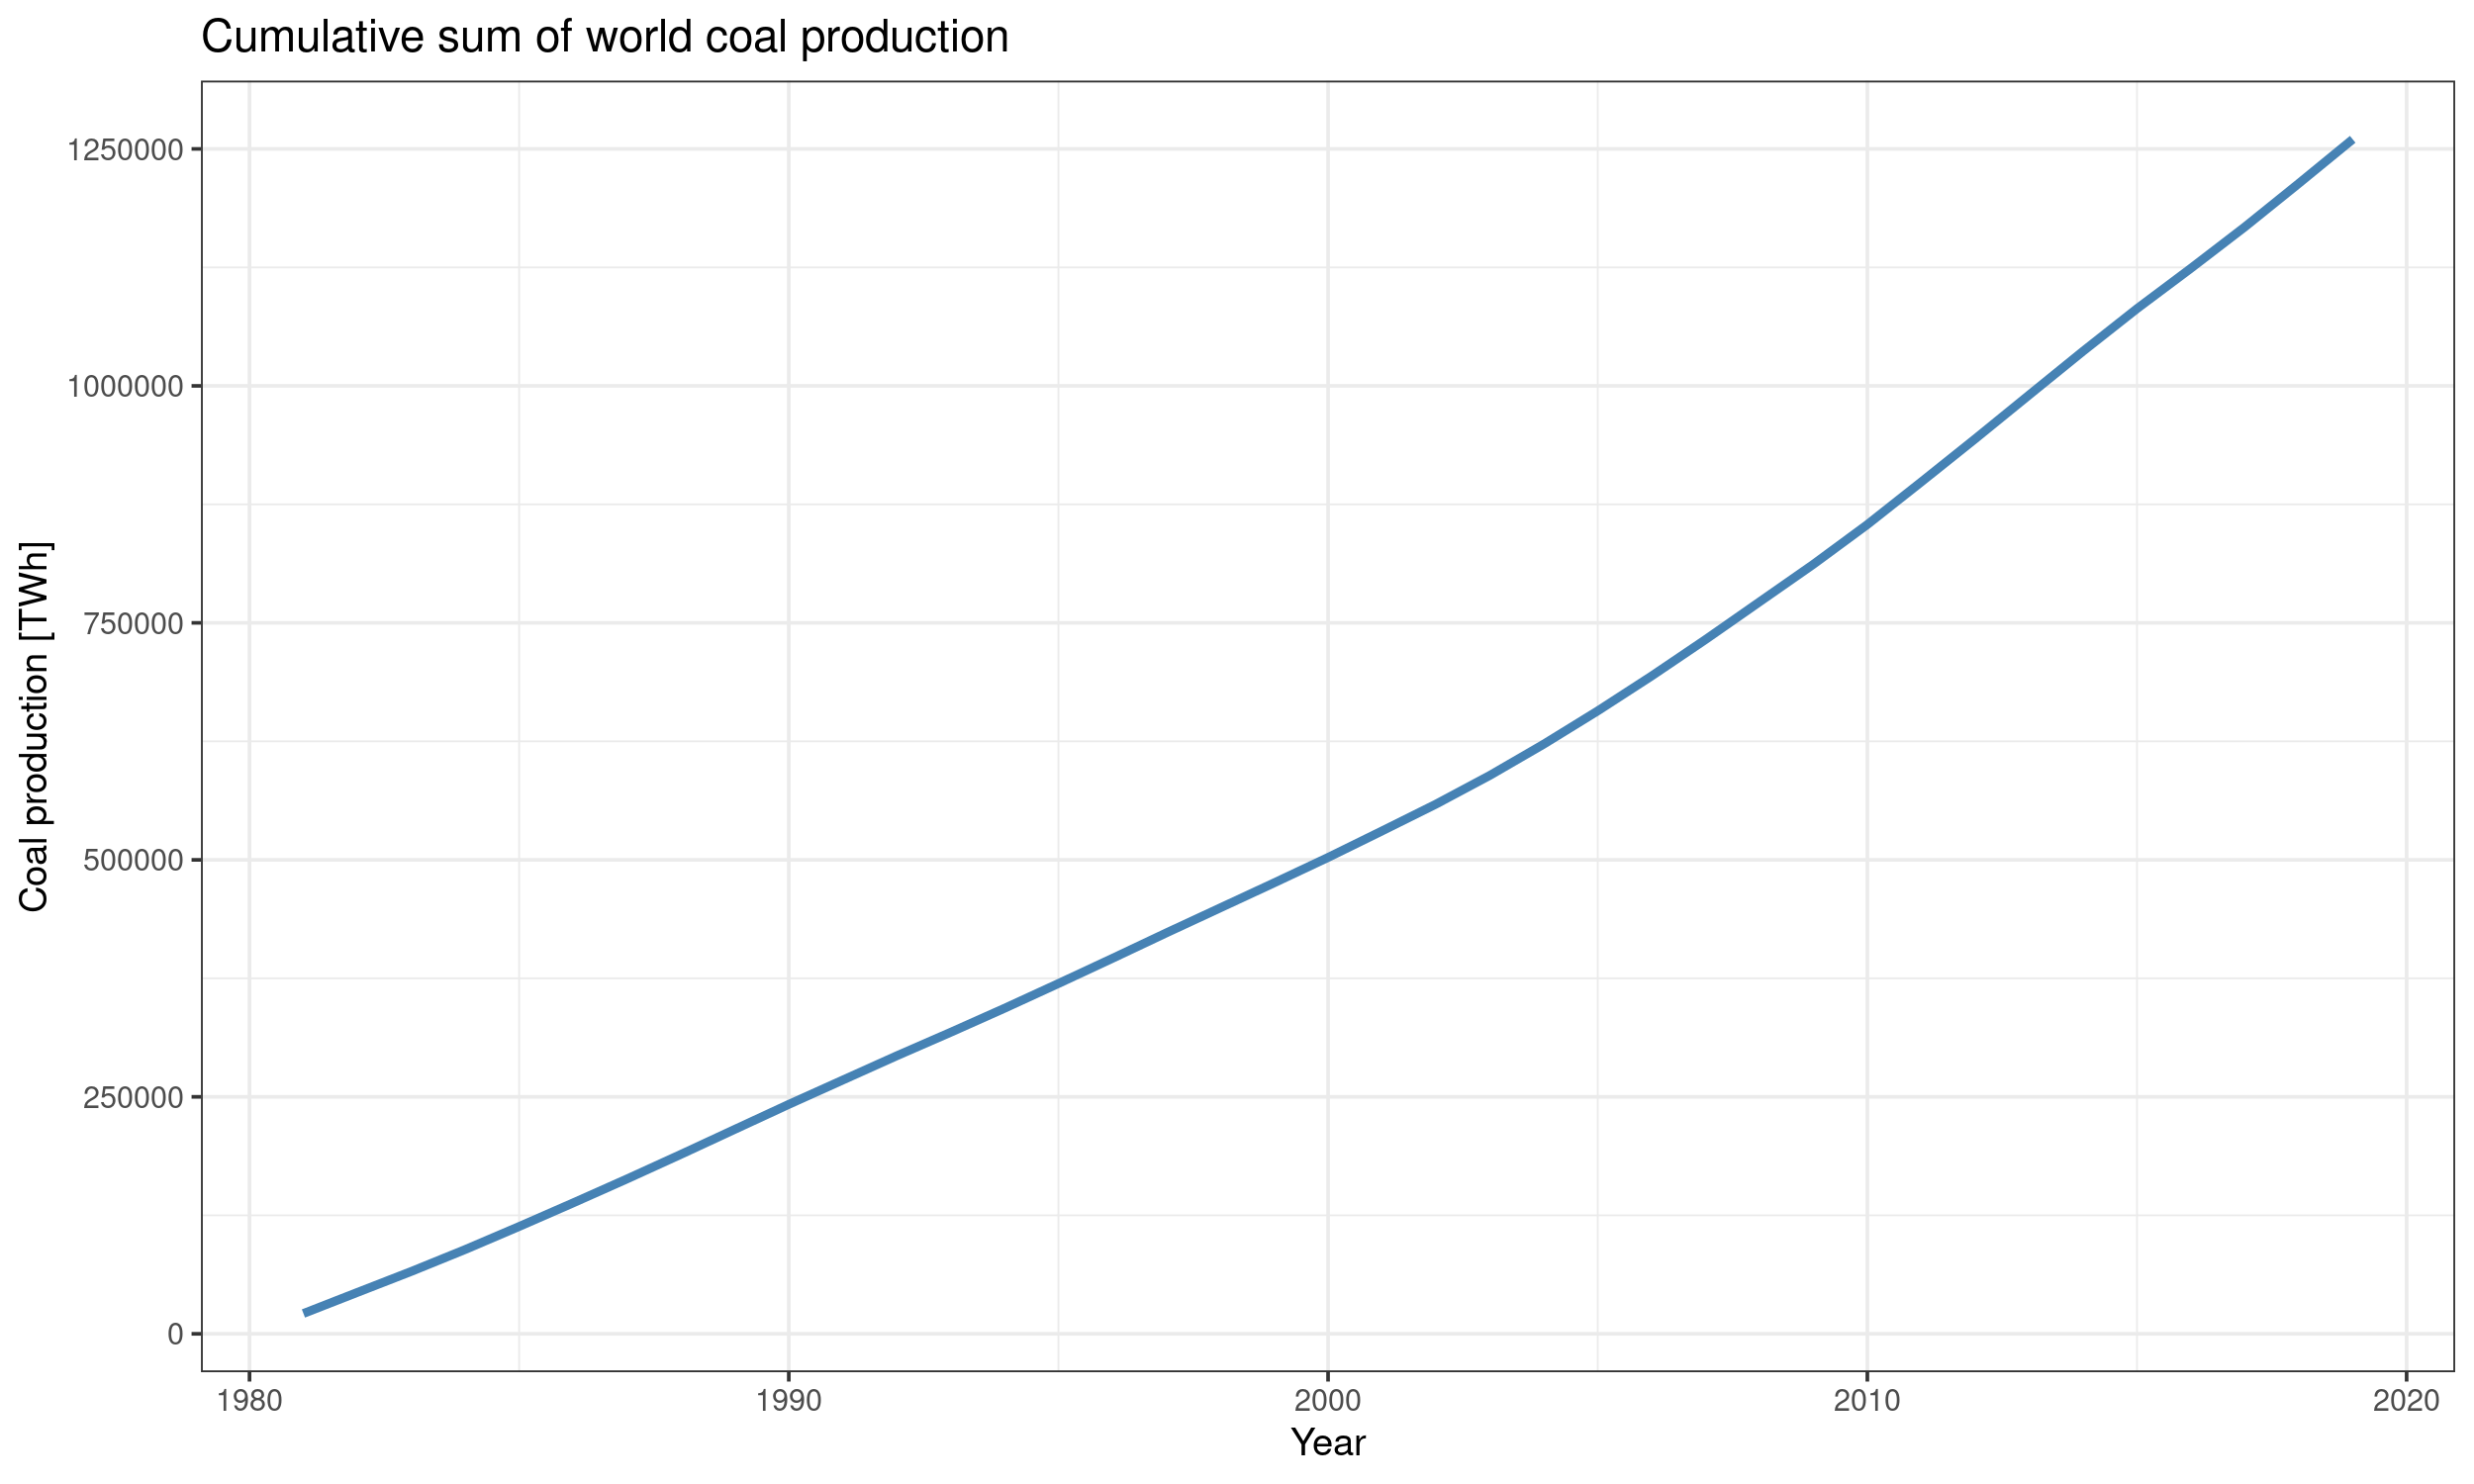

In [25]:
#5
com_sum <- 0
world_prod <- vector()
World <- df_coal[is.element(df_coal$Entity,"World"),]
for (i in 1:length(World$Year)) {
    com_sum <- com_sum + World$Coal.production..TWh.[i]
    world_prod <- append(world_prod, com_sum)
}

options(repr.plot.width=10, repr.plot.height=6)

ggplot(data = World, aes(x=Year, y = world_prod)) +
    geom_line(size=1.2, color="steelblue") +
    labs(title="Cumulative sum of world coal production", x="Year", y="Coal production [TWh]")+
    theme_linedraw() + 
    theme_bw()

# options(repr.plot.width = 8, repr.plot.height = 5)
# # format(world_prod ,scientific = TRUE)
# plot(World$Year, world_prod, cex = 0.5, 
#     xlab="Year", ylab="coal production [TWh]", 
#     main = "Cumulative sum of World coal prod",
#     cex.lab = 1, cex.axis = 0.5, cex.main = 1,
#     type="o", col = "blue", lwd = 2)



## es 4

In [26]:
# read the file vaccinations-by-manufacturer.csv
file_vaccination = "/home/pietro/Desktop/Advance_stat/data/vaccinations-by-manufacturer.csv"
df_vaccination <- tibble(read.csv(file_vaccination,sep=",",header = TRUE))
str(df_vaccination)

tibble [35,275 × 4] (S3: tbl_df/tbl/data.frame)
 $ location          : chr [1:35275] "Argentina" "Argentina" "Argentina" "Argentina" ...
 $ date              : chr [1:35275] "2020-12-29" "2020-12-29" "2020-12-29" "2020-12-29" ...
 $ vaccine           : chr [1:35275] "Moderna" "Oxford/AstraZeneca" "Sinopharm/Beijing" "Sputnik V" ...
 $ total_vaccinations: int [1:35275] 2 3 1 20481 2 3 1 40583 2 3 ...


In [43]:
#1

# converting the date column as data type
df_vaccination$date = as.Date(df_vaccination$date)

# filter the main tibble selecting the Italy data
Italy <- filter(df_vaccination, df_vaccination$location == "Italy")
head(Italy)


location,date,vaccine,total_vaccinations
<chr>,<date>,<chr>,<int>
Italy,2020-12-27,Moderna,2
Italy,2020-12-27,Pfizer/BioNTech,7346
Italy,2020-12-28,Moderna,6
Italy,2020-12-28,Pfizer/BioNTech,8847
Italy,2020-12-29,Moderna,10
Italy,2020-12-29,Pfizer/BioNTech,9941


the vaccine manufaturers in Italy are Moderna Pfizer/BioNTech Johnson&Johnson Oxford/AstraZeneca Novavax

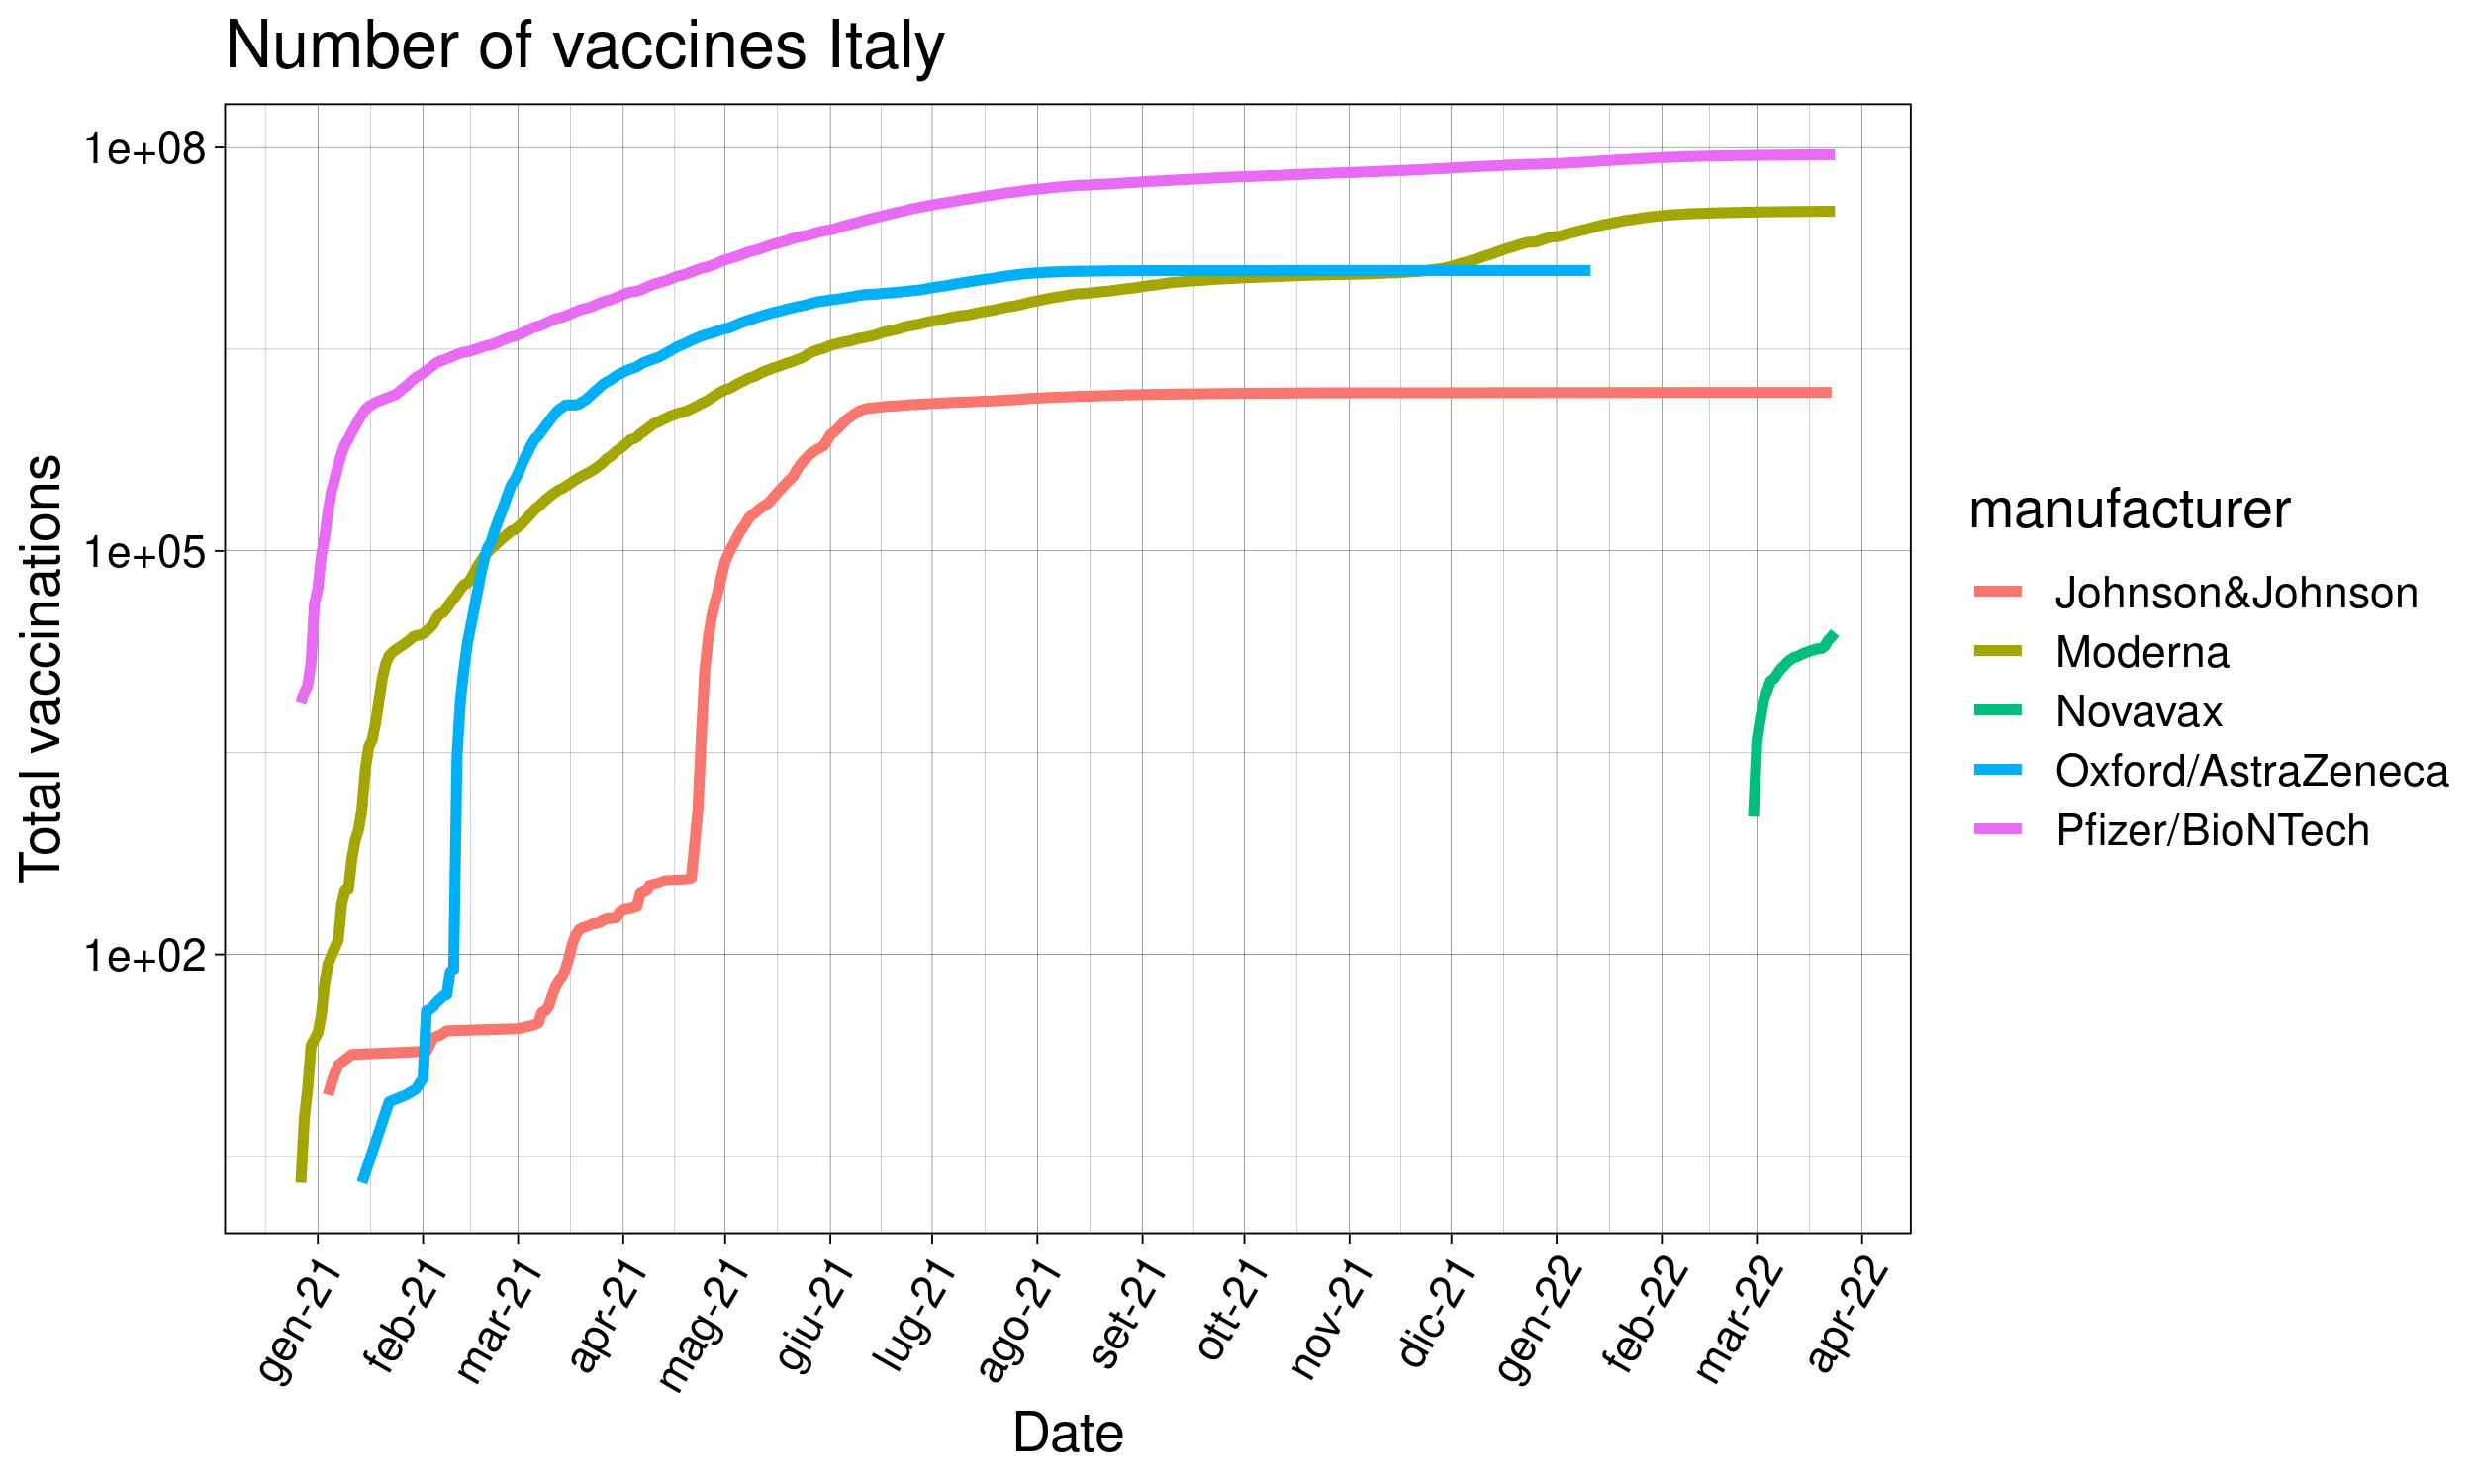

In [49]:
#2

days <- unique(Italy$date)
vaccines <- unique(Italy$vaccine)
cat("the vaccine manufaturers in Italy are",vaccines)

options(repr.plot.width=10, repr.plot.height=6)  

italy_man_plot <- ggplot(data=Italy, aes(x=date, y=total_vaccinations, color=vaccine)) +   
     theme_linedraw() +                                            
     geom_line(lwd=1.5) +                                                             
     theme(text = element_text(size=16)) +
     labs(title="Number of vaccines Italy", x="Date", y="Total vaccinations", color="manufacturer")+
     theme(axis.text.x = element_text(angle = 60, hjust = 1)) +
     scale_x_date(date_breaks = "1 months", date_labels="%b-%y") +
     scale_y_continuous(trans='log10')     
    
italy_man_plot

Moderna,Pfizer/BioNTech,Johnson&Johnson,Oxford/AstraZeneca,Novavax
<int>,<int>,<int>,<int>,<int>
33561224,88397132,1507207,12165504,24670


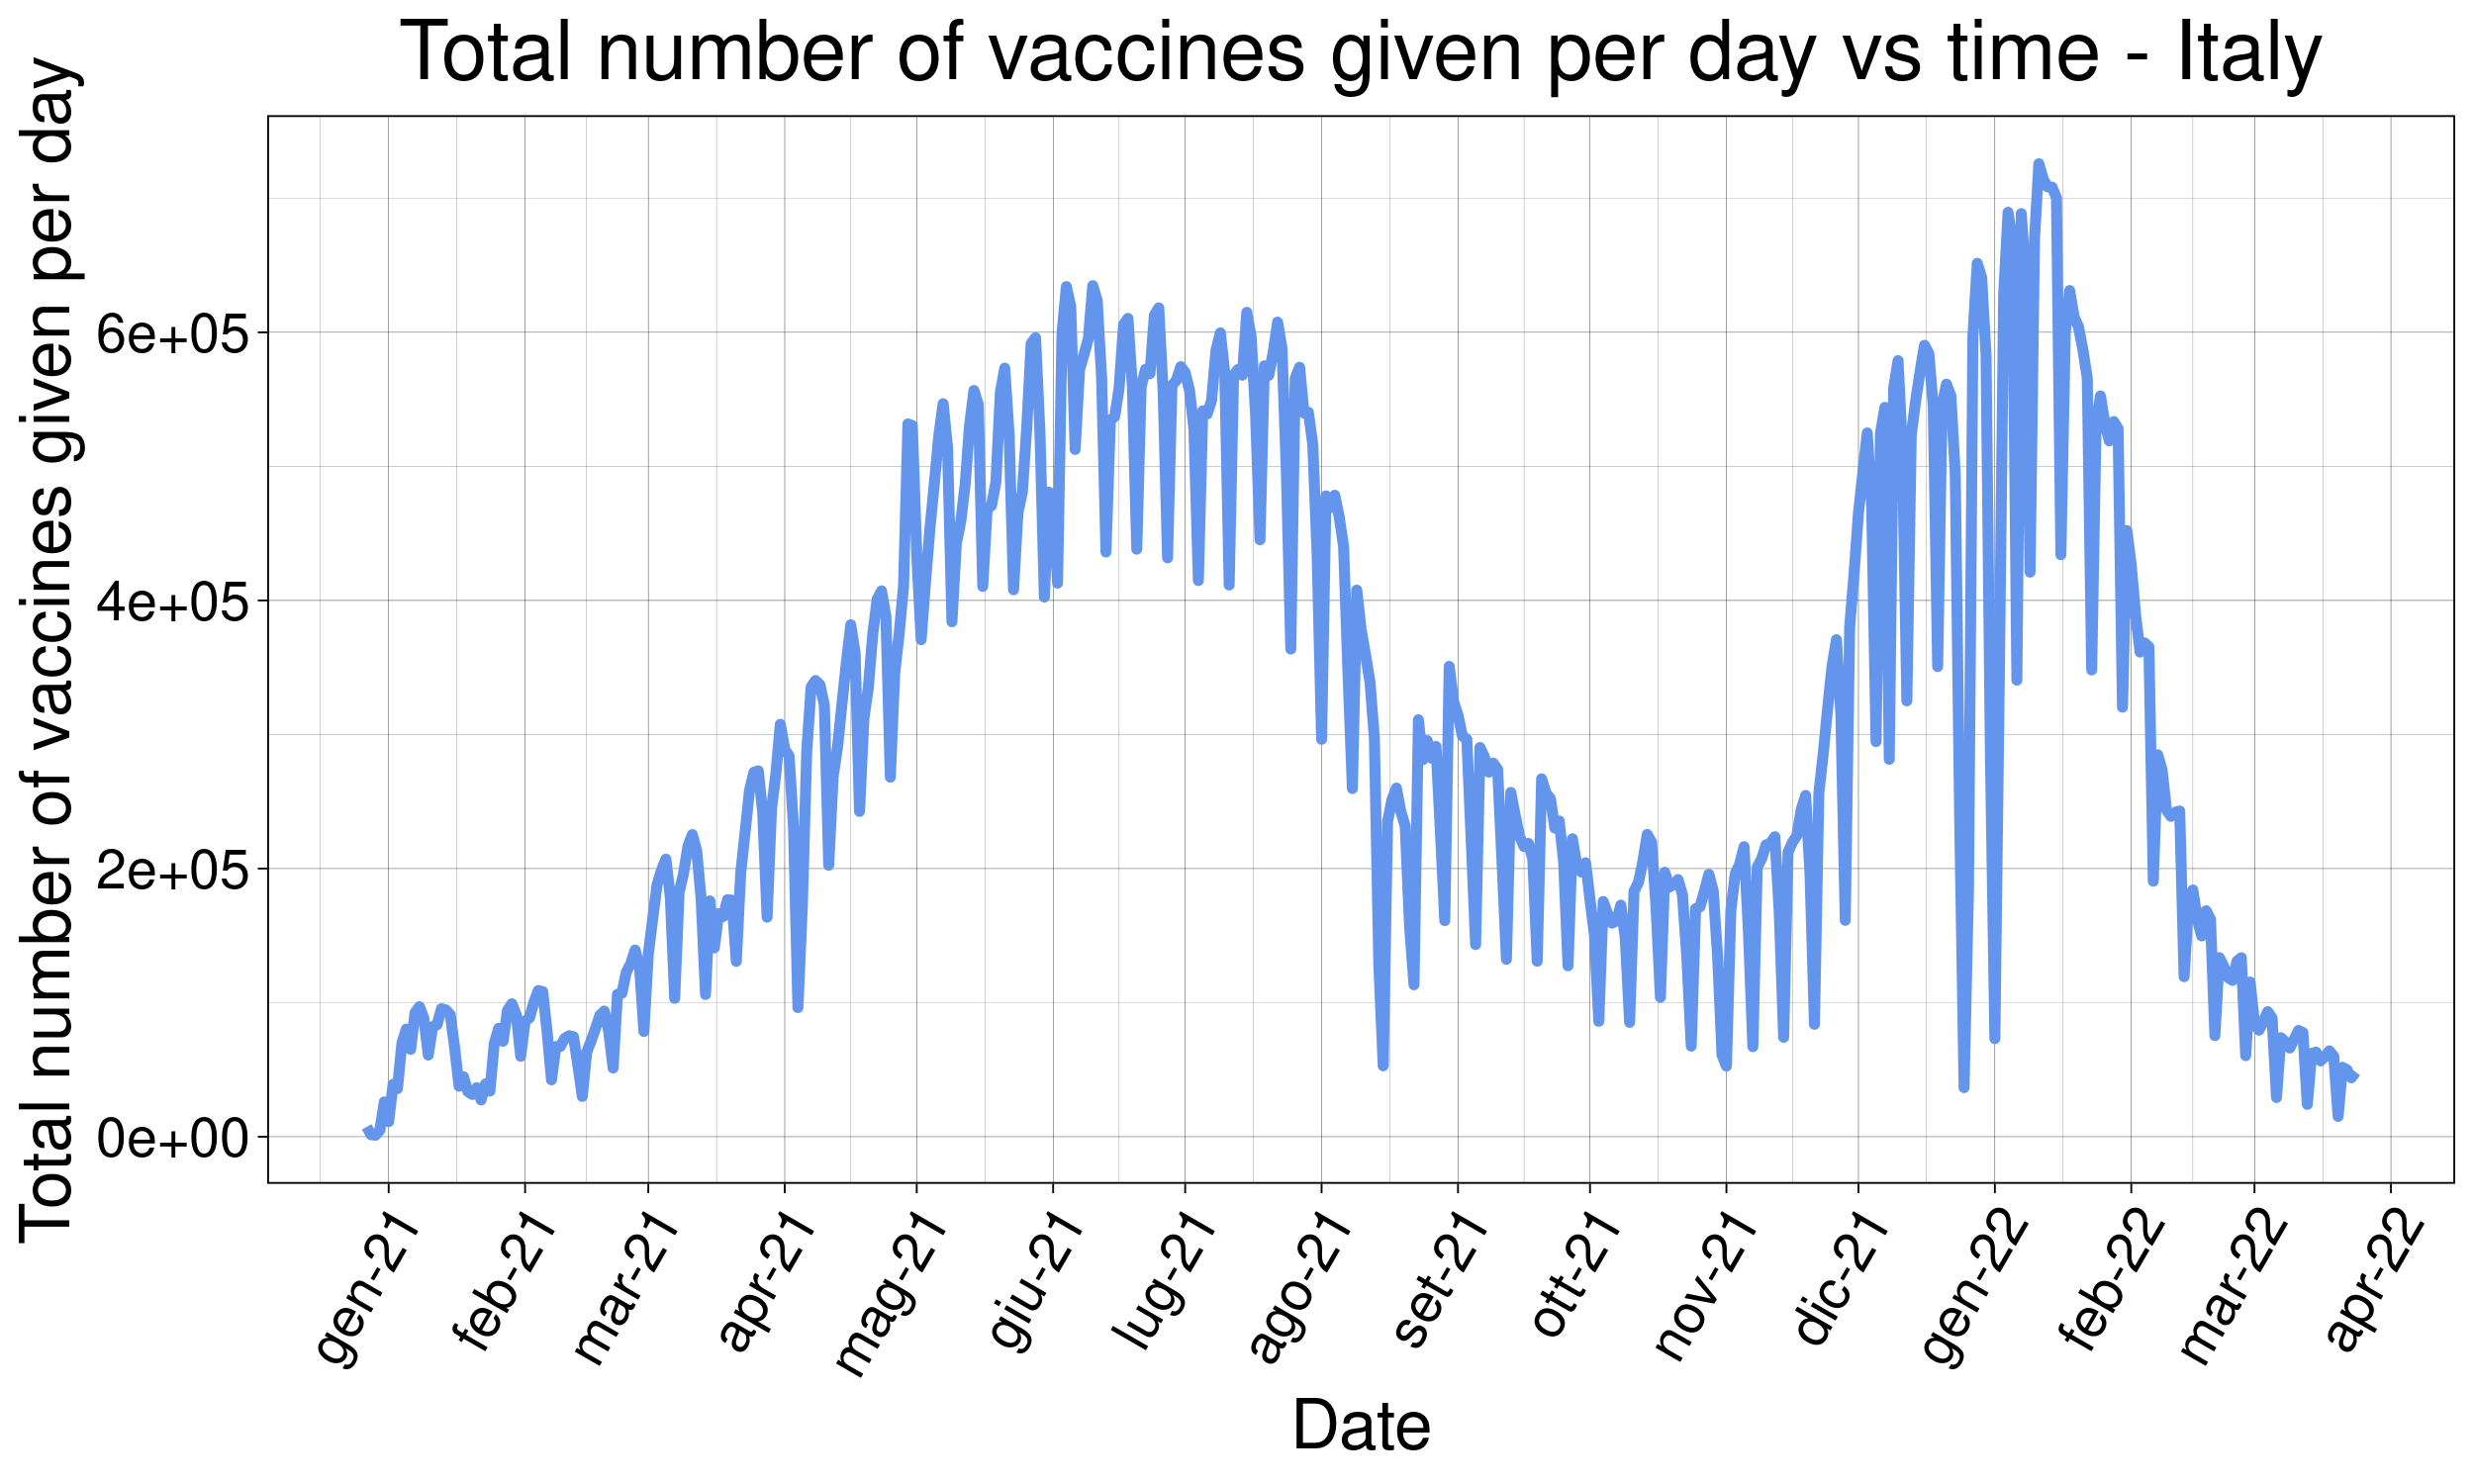

In [45]:
# calculate the vaccines shot per day

vac_per_day <- vector()
tot_vac <- vector()

# define an "elementary" dataframe in which we put the number of shots done since that day
day_vac <- data.frame(matrix(ncol = 5, nrow = 1))
day_vac[1,] <- integer(5); colnames(day_vac) <- vaccines

#then we update the values of this dataframe every time these numbers change
#if not change (no shot for a particular manufacturer this day) we left the previous value
for (i in 1:length(days)){
    c <- Italy$vaccine[is.element(Italy$date, days[i]) ]
    v <- Italy$total_vaccinations[is.element(Italy$date, days[i]) ]
    
    for (j in 1:length(c) ) {   
        day_vac[ c[j] ] <- v[j]
    }
    #from the elementary dataframe we calculate the cumulative sum of the total vaccination done since that day
    tot_vac <- append(tot_vac, sum(day_vac)) 
    #then we calcuate the number of vac per day by tot_vac of the actual day - the previous one 
    if(i==1){ vac_per_day<-append(vac_per_day, tot_vac )        }
    else {vac_per_day <- append(vac_per_day, tot_vac[i] - tot_vac[i-1] ) }
     
}
day_vac

italy_day_plot <- ggplot() +   
     theme_linedraw() +                                            
     geom_line(aes(x=unique(Italy$date), y=vac_per_day), lwd=1.5, color="cornflowerblue") +                                                             
     theme(text = element_text(size=16)) +
     labs(title="Number of vaccines Italy", x="Date", y="Total number of vaccines given per day", color="manufacturer")+
     ggtitle("Total number of vaccines given per day vs time - Italy") +
     theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle = 60, hjust = 1)) +
     scale_x_date(date_breaks = "1 months", date_labels="%b-%y")  

italy_day_plot


[1] "Johnson&Johnson"    "Moderna"            "Novavax"           
[4] "Oxford/AstraZeneca" "Pfizer/BioNTech"   


Warning message:
“Transformation introduced infinite values in continuous y-axis”


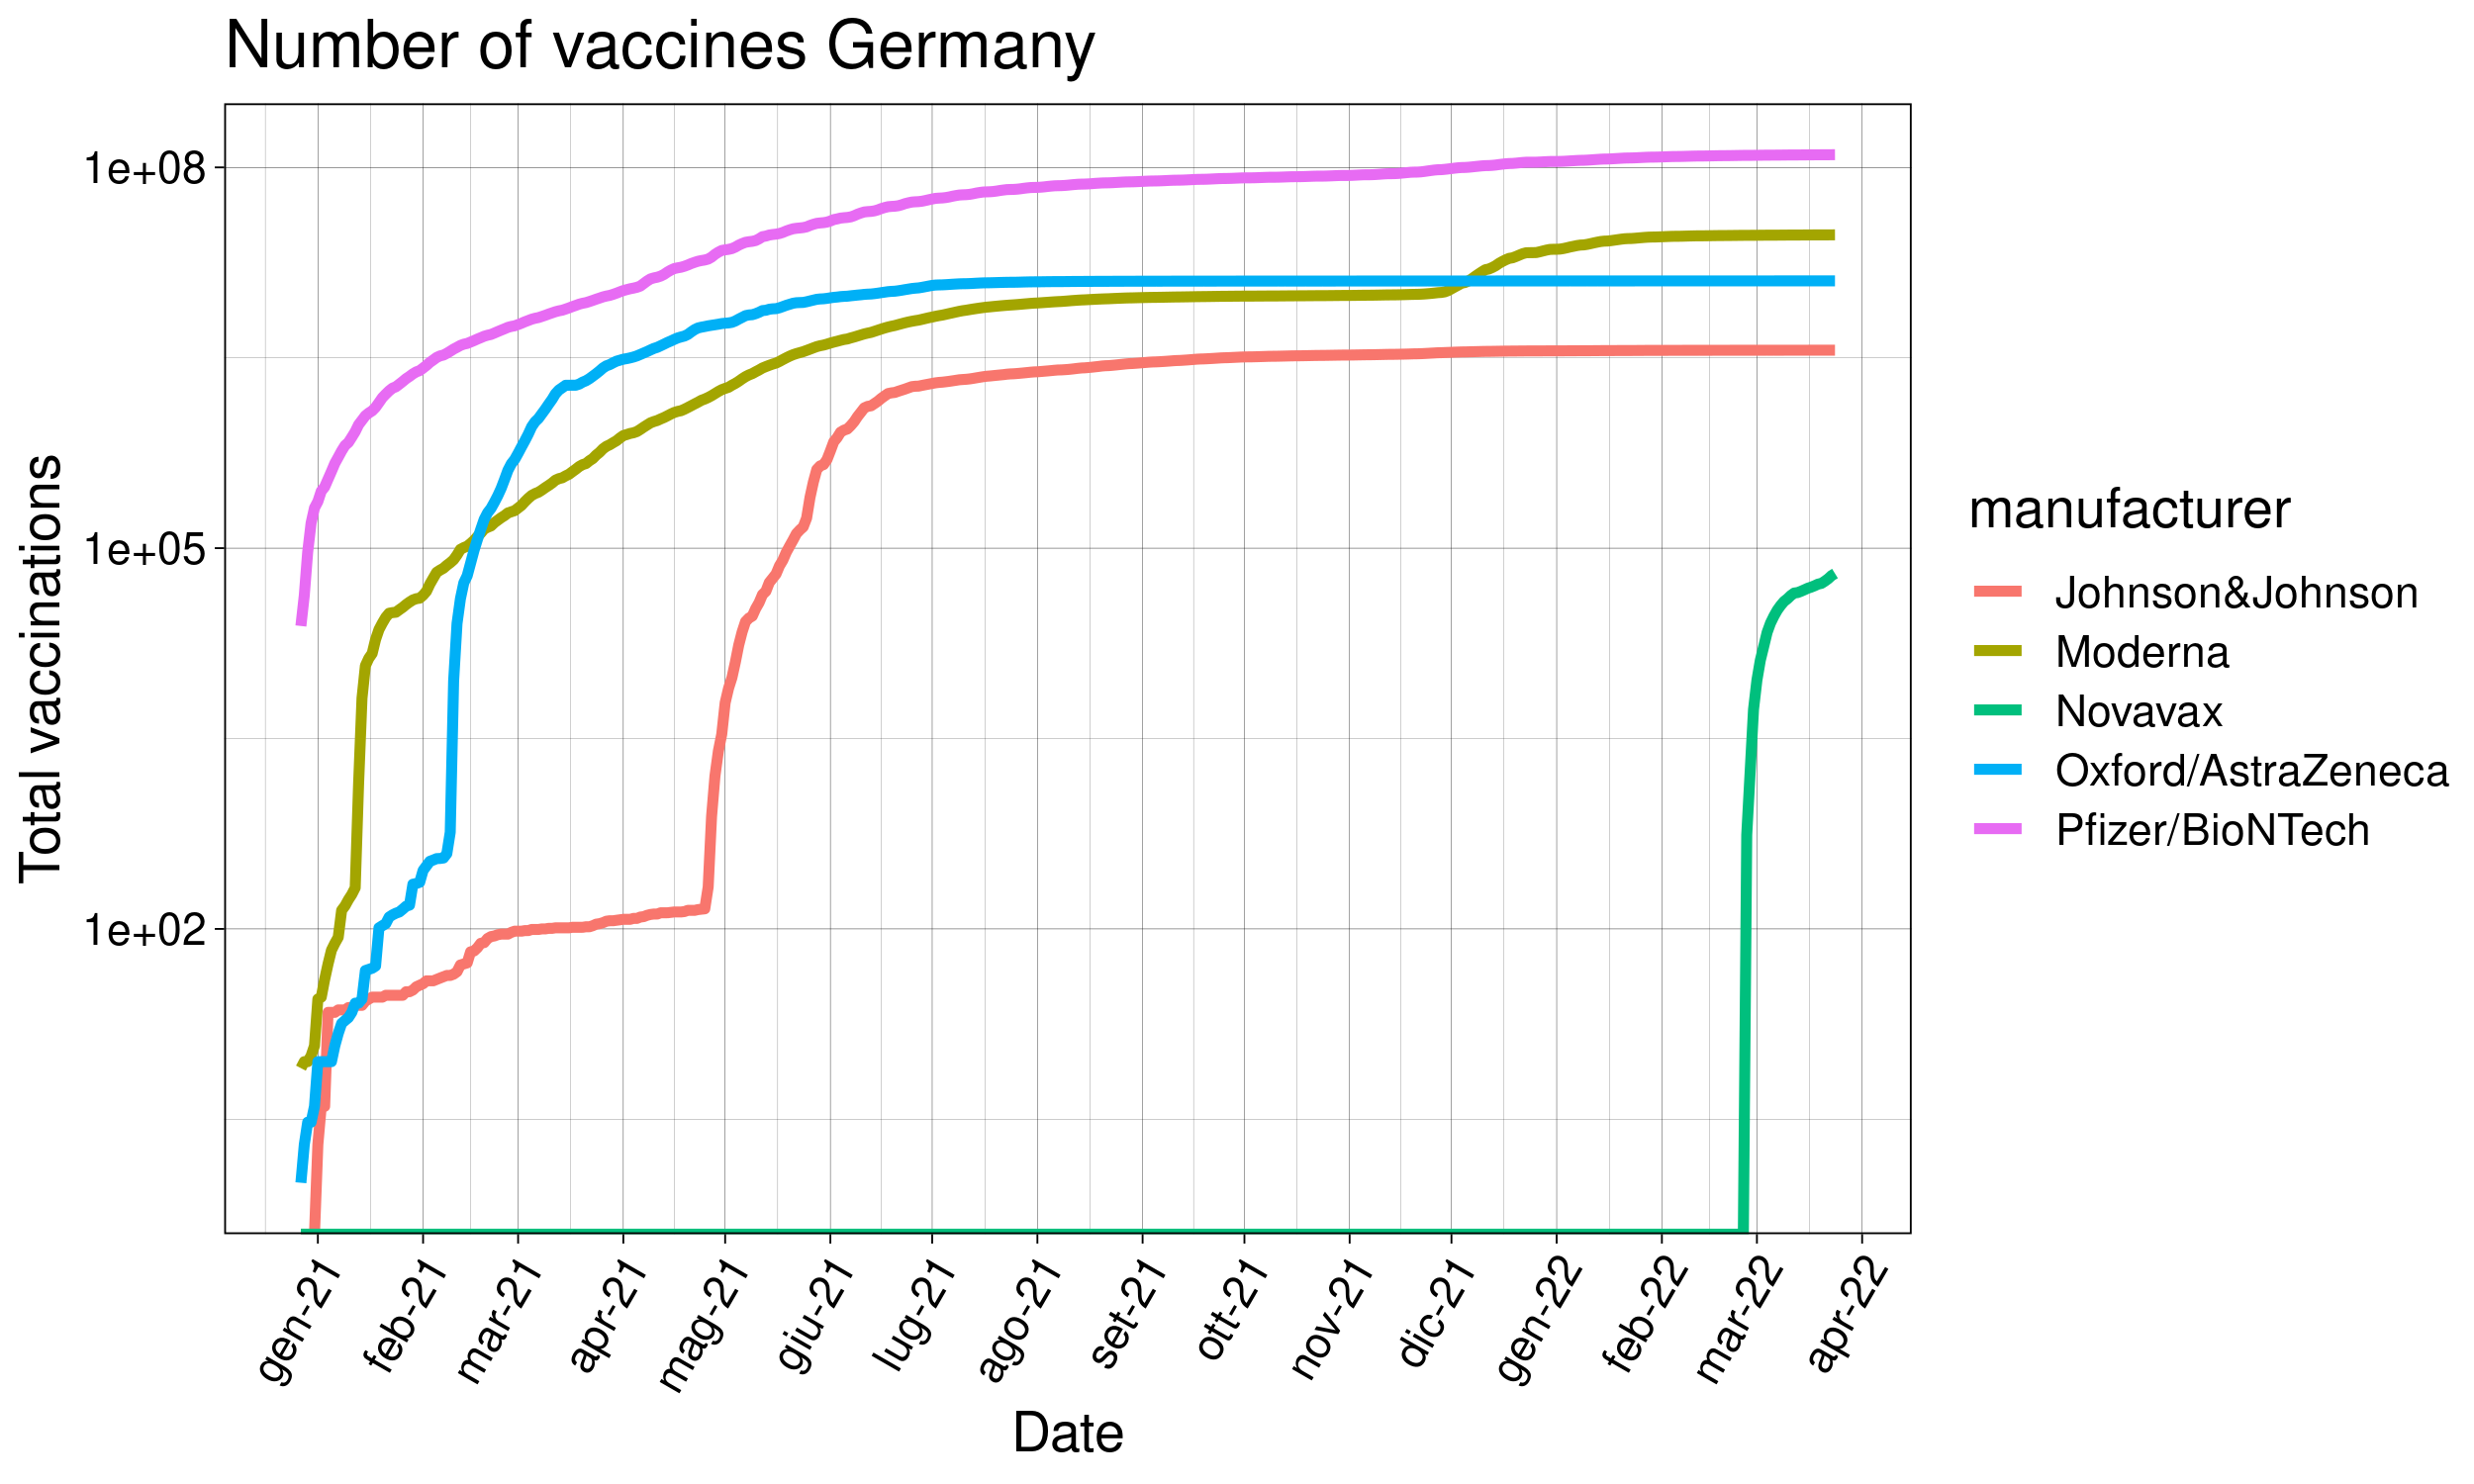

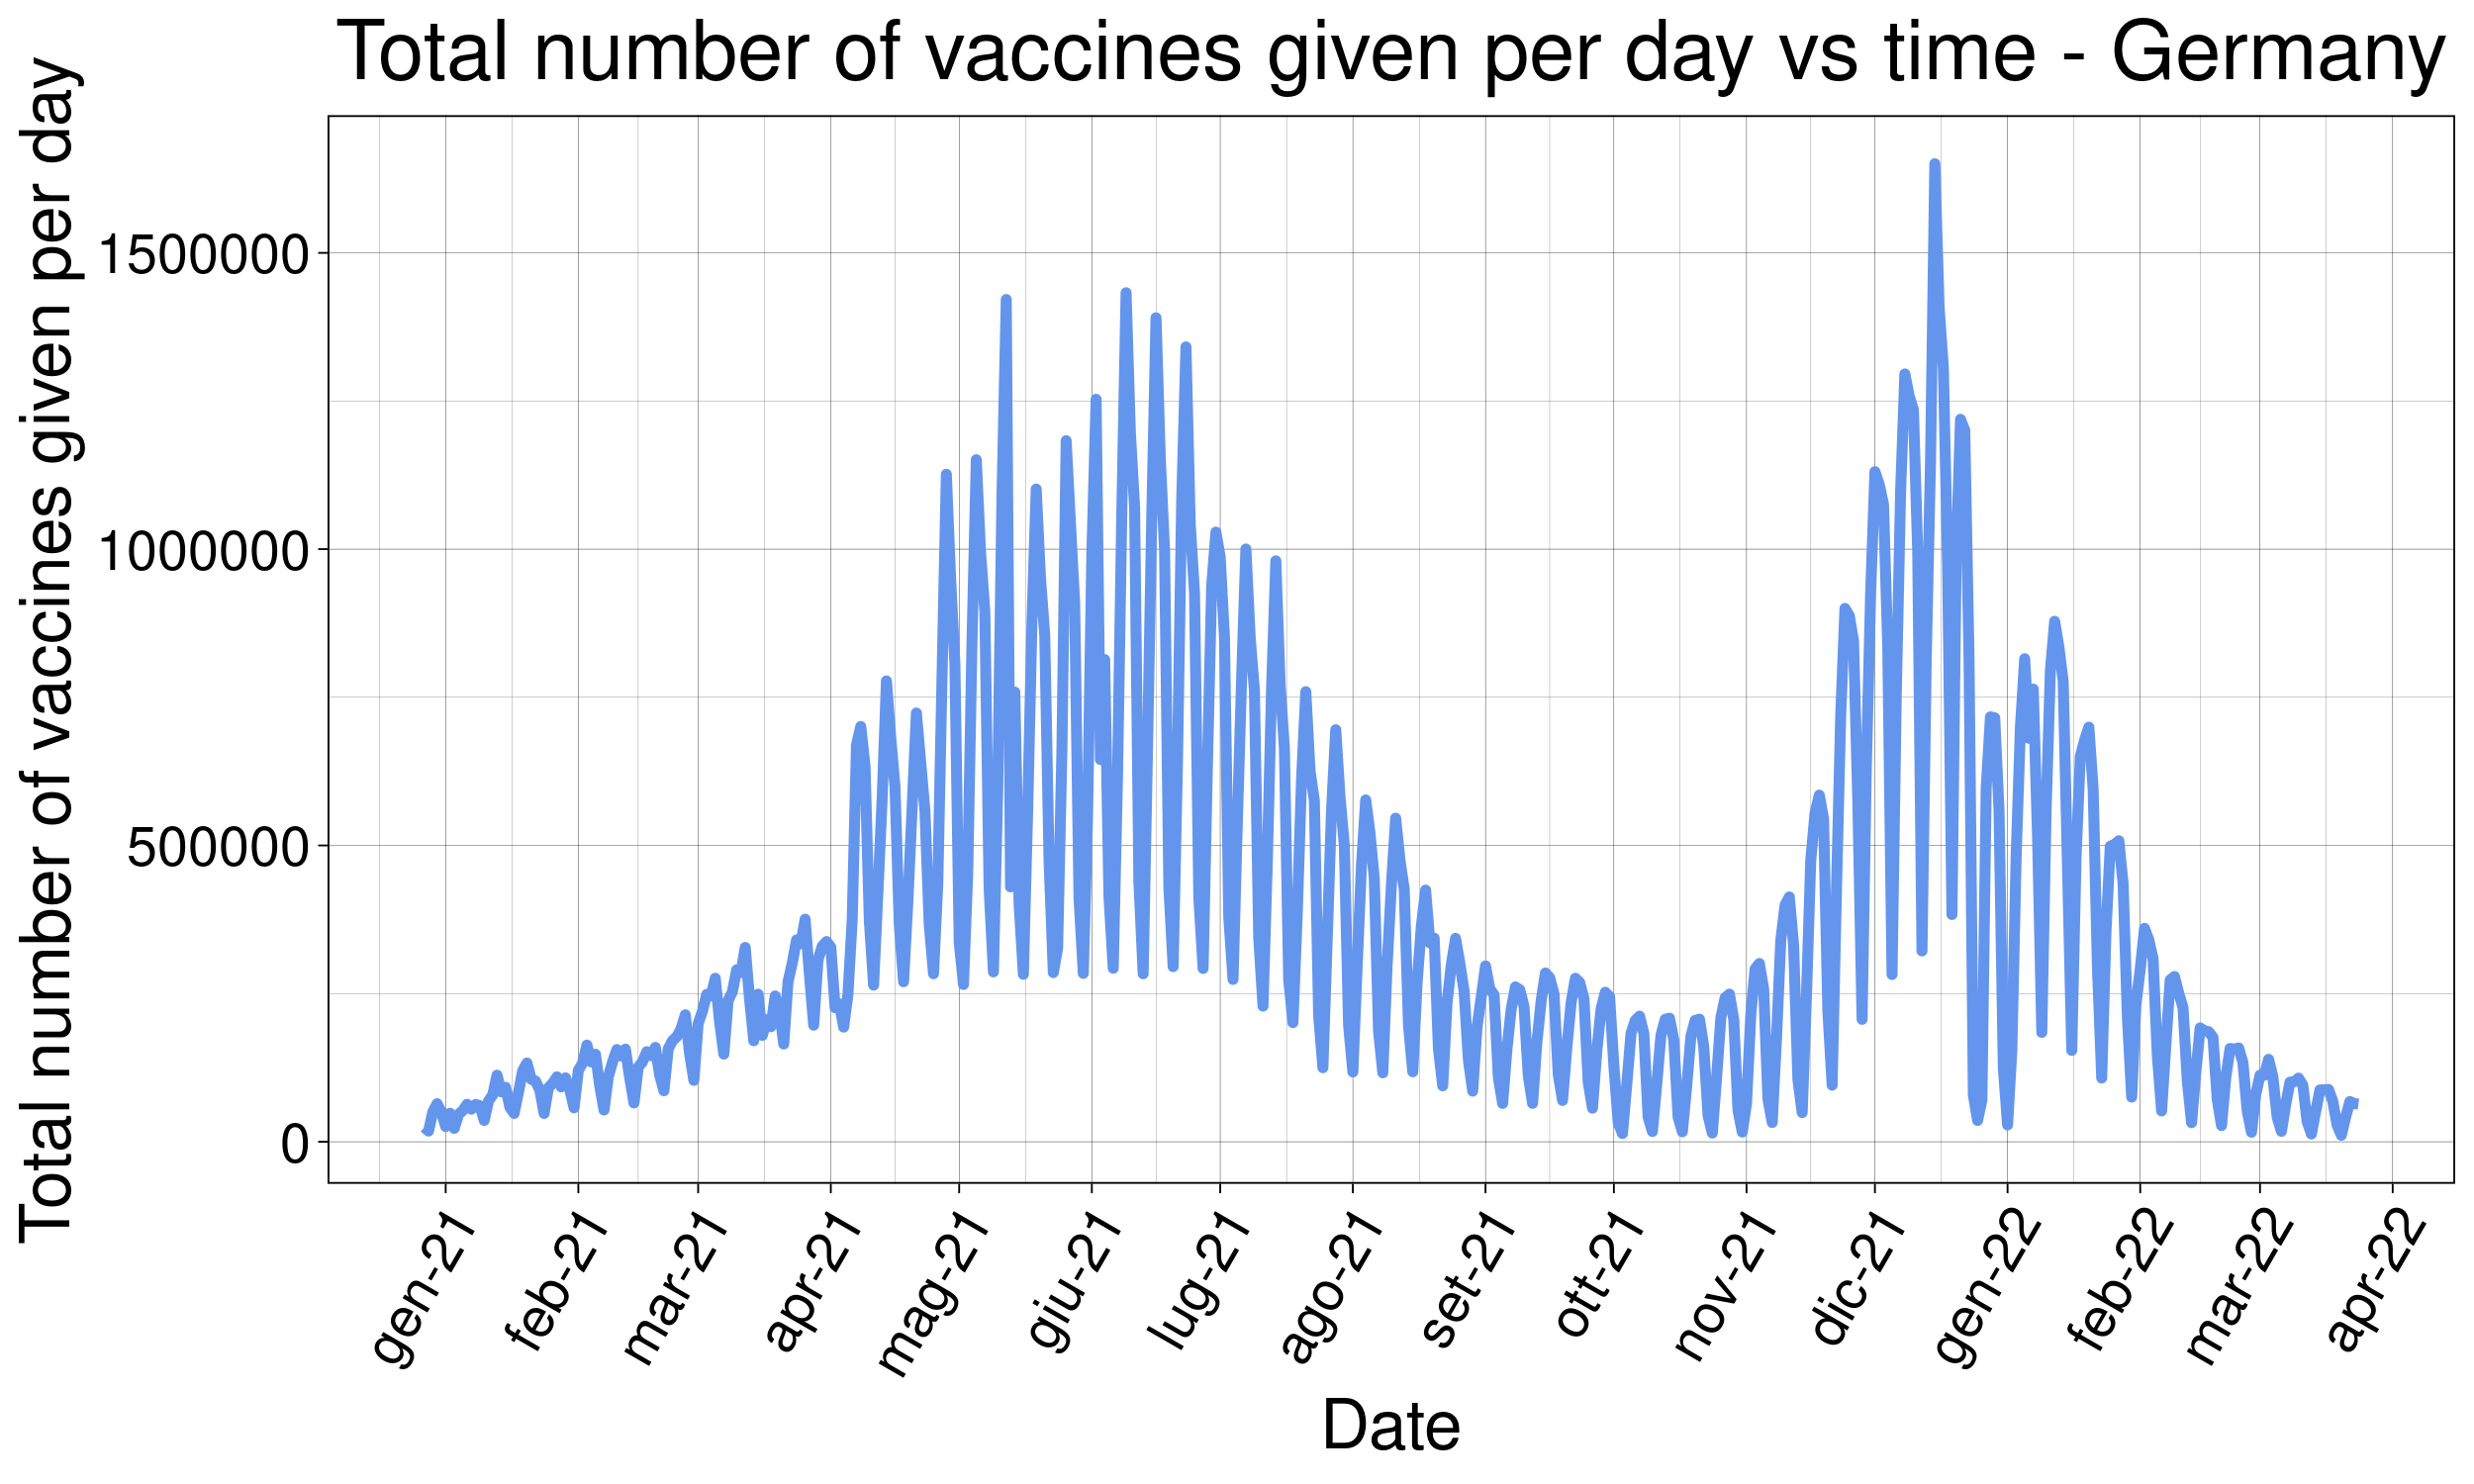

In [50]:
Germany <- filter(df_vaccination, location == "Germany")

days <- unique(Germany$date)
vaccines <- unique(Germany$vaccine)
print(vaccines)

options(repr.plot.width=10, repr.plot.height=6)  

Germany_man_plot <- ggplot(data=Germany, aes(x=date, y=total_vaccinations, color=vaccine)) +   
     theme_linedraw() +                                            
     geom_line(lwd=1.5) +                                                             
     theme(text = element_text(size=16)) +
     labs(title="Number of vaccines Germany", x="Date", y="Total vaccinations", color="manufacturer")+
     theme(axis.text.x = element_text(angle = 60, hjust = 1)) +
     scale_x_date(date_breaks = "1 months", date_labels="%b-%y") +
     scale_y_continuous(trans='log10')     
    
Germany_man_plot

vac_per_day <- vector()
tot_vac <- vector()

day_vac <- data.frame(matrix(ncol = 5, nrow = 1))
day_vac[1,] <- integer(5); colnames(day_vac) <- vaccines

for (i in 1:length(days)){

    c <- Germany$vaccine[is.element(Germany$date, days[i]) ]
    v <- Germany$total_vaccinations[is.element(Germany$date, days[i]) ]
    # v <- filter(Germany, date == days[1])
    
    for (j in 1:length(c) ) {   
        day_vac[ c[j] ] <- v[j]
    }

    tot_vac <- append(tot_vac, sum(day_vac)) 
    
    if(i==1){ vac_per_day<-append(vac_per_day, tot_vac )        }
    else {vac_per_day <- append(vac_per_day, tot_vac[i] - tot_vac[i-1] ) }
     
}

Germany_day_plot <- ggplot() +
     theme_linedraw() +                                            
     geom_line(aes(x=unique(Germany$date), y=vac_per_day), lwd=1.5, color="cornflowerblue") +                                                             
     theme(text = element_text(size=20)) +
     labs(title="Total number of vaccines given per day vs time - Germany", x="Date", y="Total number of vaccines given per day", color="manufacturer")+
     theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle = 60, hjust = 1)) +
     scale_x_date(date_breaks = "1 months", date_labels="%b-%y")  

Germany_day_plot



[1] "Moderna"         "Pfizer/BioNTech" "Johnson&Johnson"


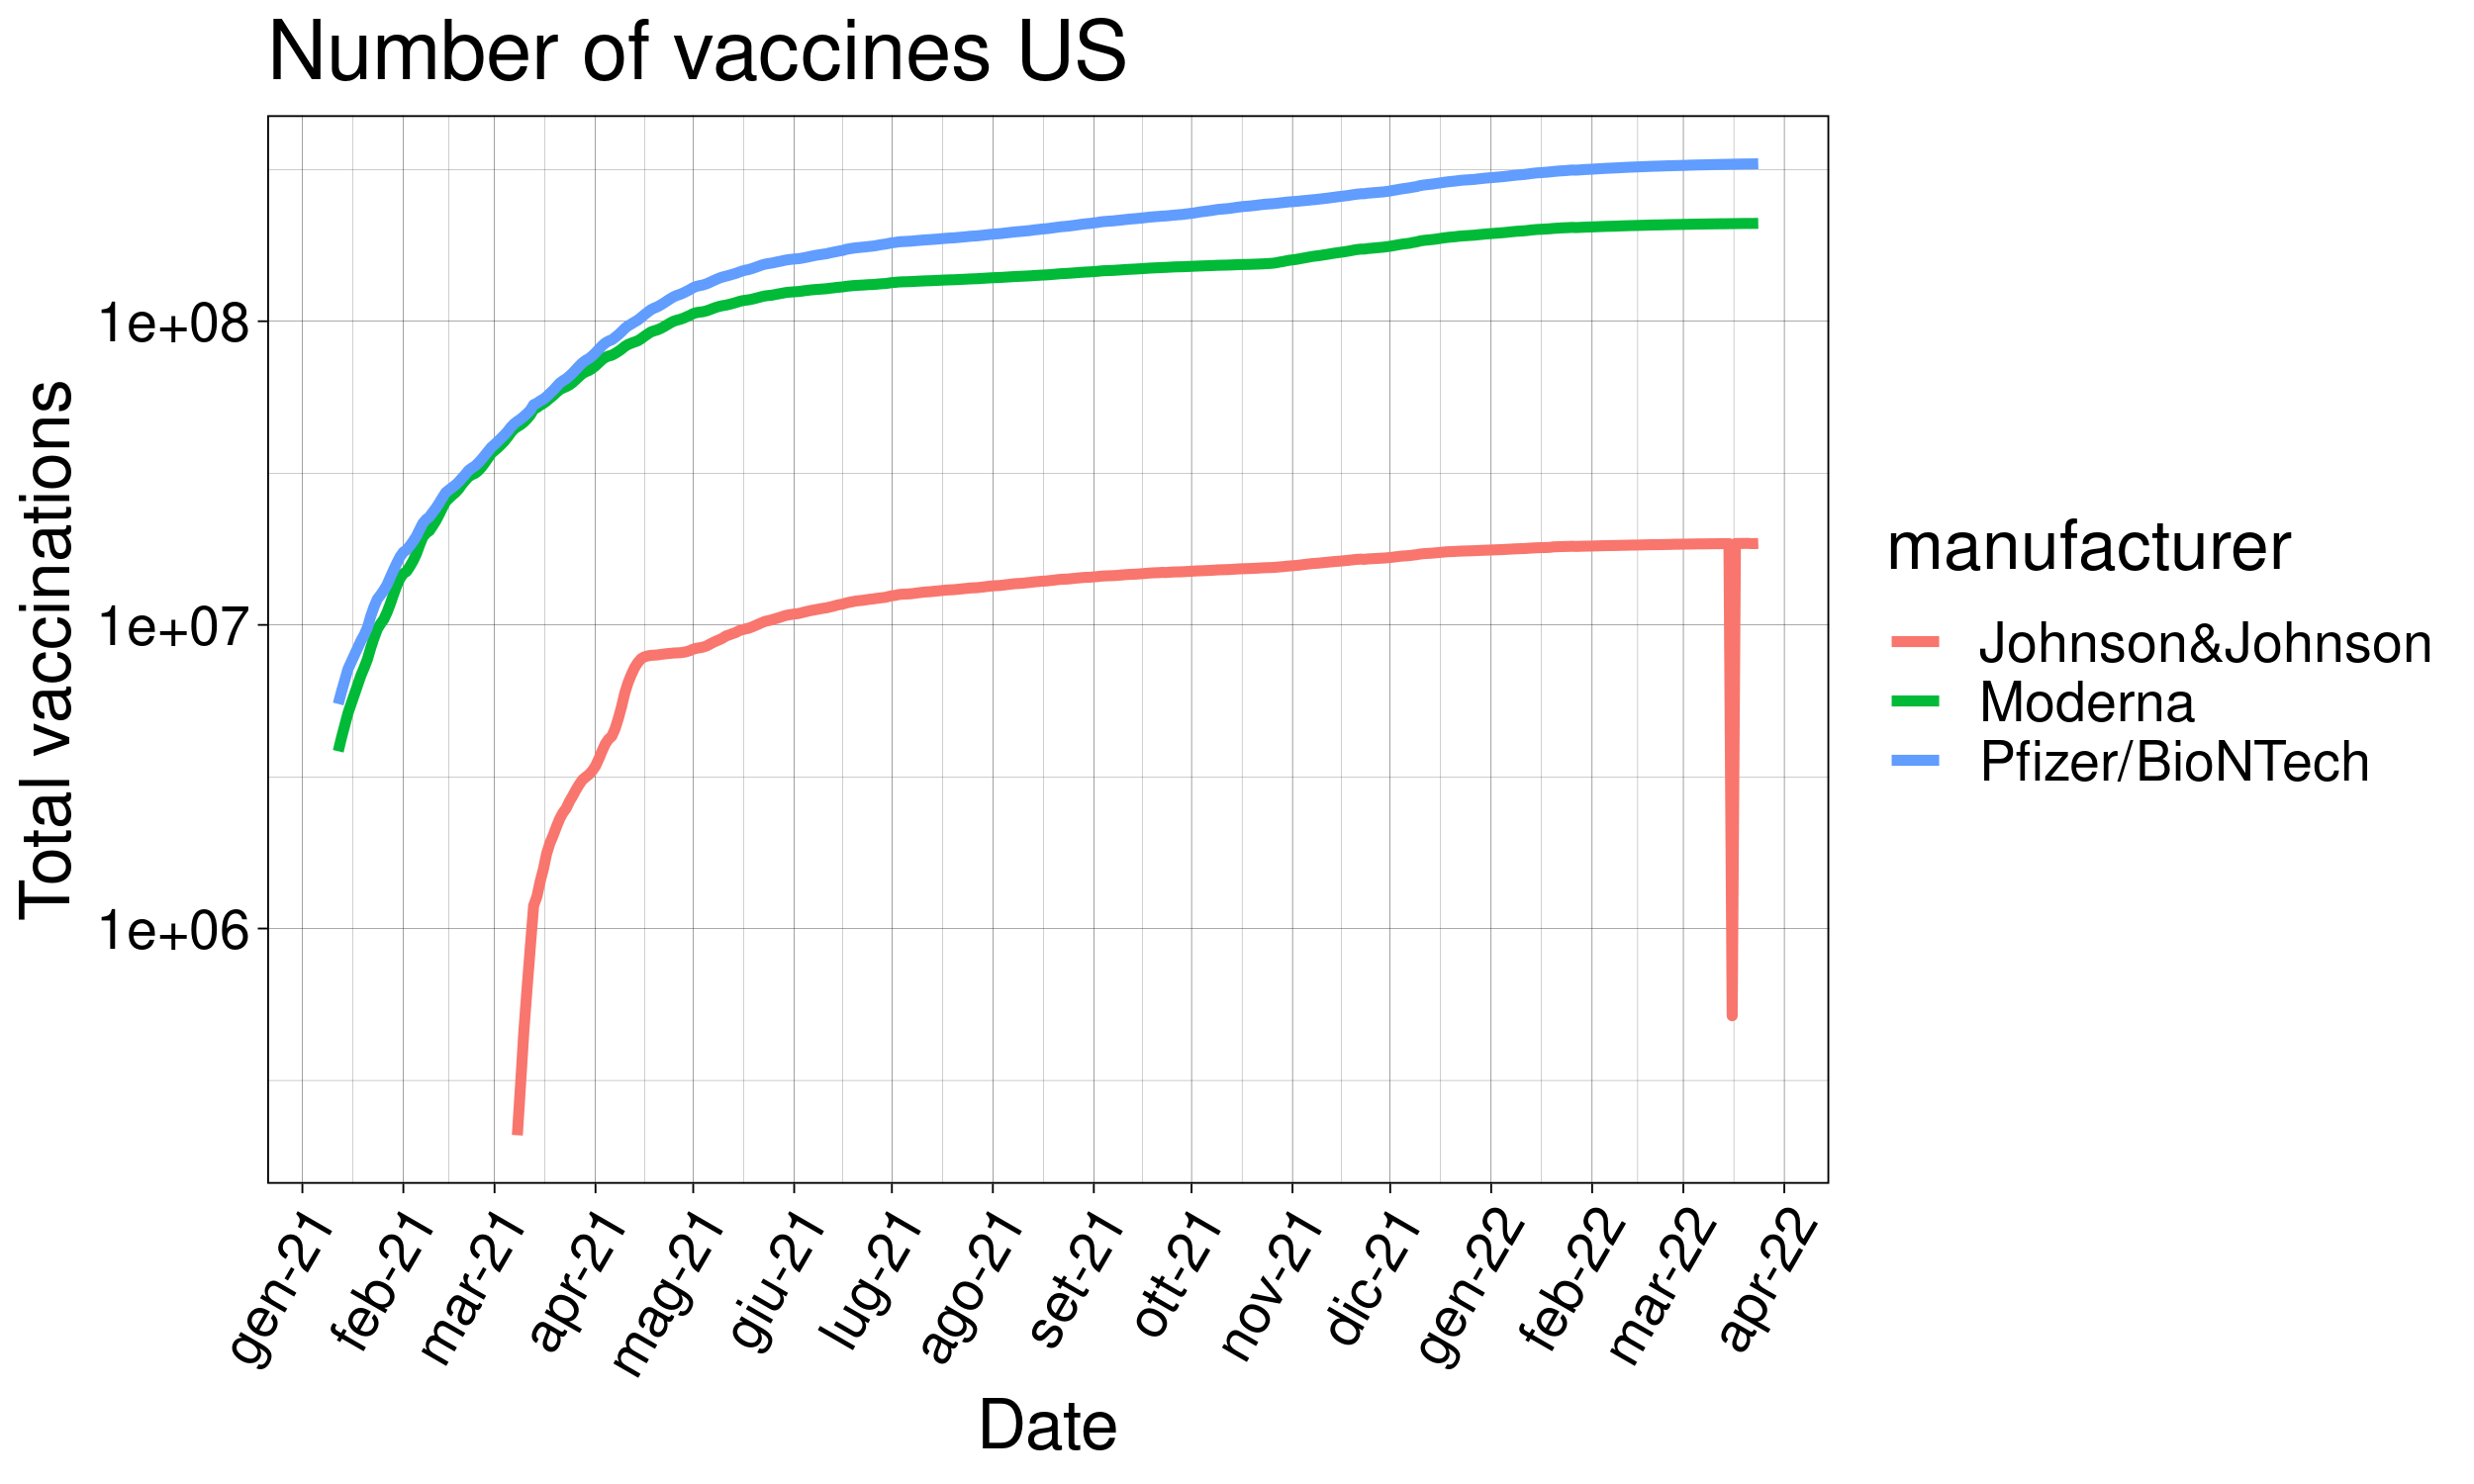

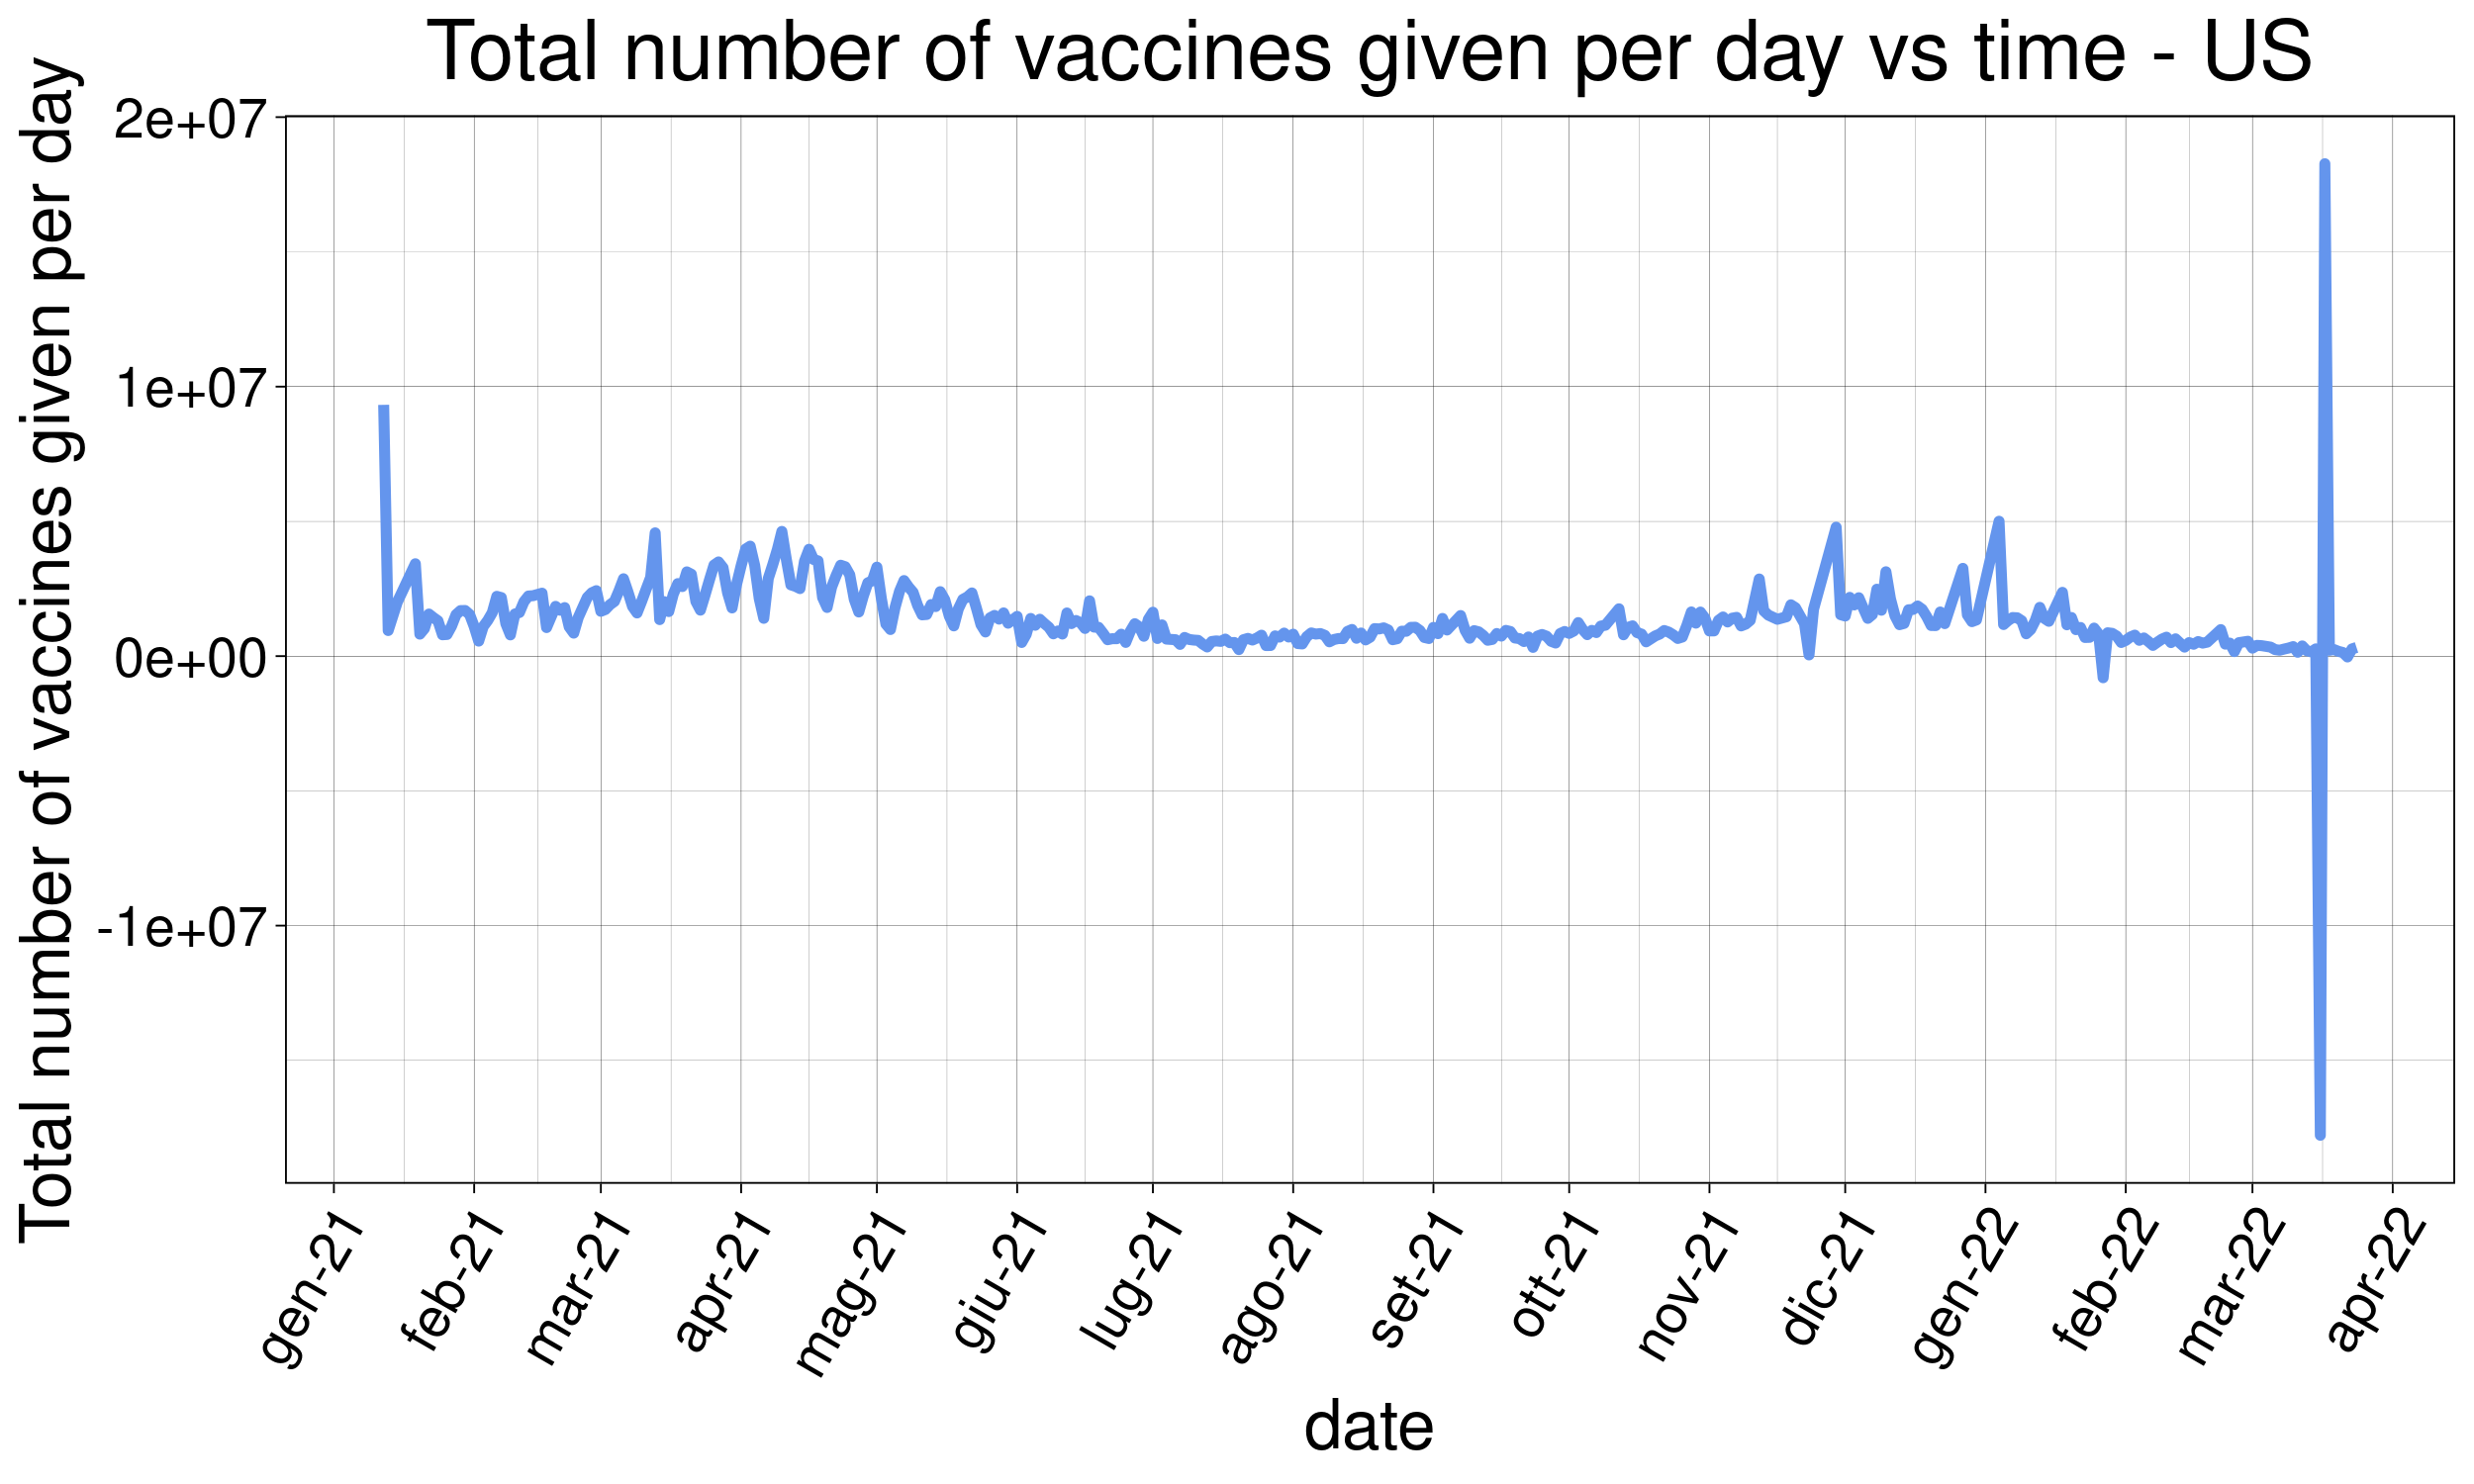

In [31]:
US <- filter(df_vaccination, location == "United States")

days <- unique(US$date)
vaccines <- unique(US$vaccine)
print(vaccines)

options(repr.plot.width=10, repr.plot.height=6)  

US_man_plot <- ggplot(data=US, aes(x=date, y=total_vaccinations, color=vaccine)) +   
     theme_linedraw() +                                            
     geom_line(lwd=1.5) +                                                             
     theme(text = element_text(size=20)) +
     labs(title="Number of vaccines US", x="Date", y="Total vaccinations", color="manufacturer")+
     theme(axis.text.x = element_text(angle = 60, hjust = 1)) +
     scale_x_date(date_breaks = "1 months", date_labels="%b-%y") +
     scale_y_continuous(trans='log10')     
    
US_man_plot

vac_per_day <- vector()
tot_vac <- vector()

day_vac <- data.frame(matrix(ncol = 5, nrow = 1))
day_vac[1,] <- integer(5); colnames(day_vac) <- vaccines

for (i in 1:length(days)){

    c <- US$vaccine[is.element(US$date, days[i]) ]
    v <- US$total_vaccinations[is.element(US$date, days[i]) ]
    # v <- filter(US, date == days[1])
    
    for (j in 1:length(c) ) {   
        day_vac[ c[j] ] <- v[j]
    }

    tot_vac <- append(tot_vac, sum(day_vac)) 
    
    if(i==1){ vac_per_day<-append(vac_per_day, tot_vac )        }
    else {vac_per_day <- append(vac_per_day, tot_vac[i] - tot_vac[i-1] ) }
     
}

US_day_plot <- ggplot() +
     theme_linedraw() +                                            
     geom_line(aes(x=unique(US$date), y=vac_per_day), 
               lwd=1.5,
               color="cornflowerblue") +                                                             
     theme(text = element_text(size=20)) +
     labs(title="Total number of vaccines given per day vs time - US", x="Date", y="Total number of vaccines given per day", color="manufacturer")+
     theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle = 60, hjust = 1)) +
     scale_x_date(date_breaks = "1 months", date_labels="%b-%y")  

US_day_plot



There is an error in the data because the number of Johnson&Johnson vaccinations seems to decrease in a day. This is impossible because the given shots of vaccine cannot decrease. The cumulative sum of the given vaccine cannot decrease.\
To fix this problem, avoiding to manipulate the data, we can plot untill the day in which the data are broken, or we can eliminate the wrong data. We choose the second way by selecing the wrong sample which is the JJ total vaccincation sample of a particular day in march 2022. (we can see it in the first plot above)



In [32]:
US_right <- US[US$date < as.Date("2022-03-01"), ]
US_wrong <- US[US$date > as.Date("2022-03-01"), ]

for (i in 1:length(US_wrong$date)){
    if(US_wrong[[i, "total_vaccinations"]] < mean(US_wrong[US_wrong$vaccine == "Johnson&Johnson", ]$total_vaccinations)){
        data_wrong = US_wrong[[i, "date"]]
        }
}
data_wrong

US_filtered <- filter(US, date != data_wrong | vaccine == "Johnson&Johnson" )

[1] "2022-03-16"

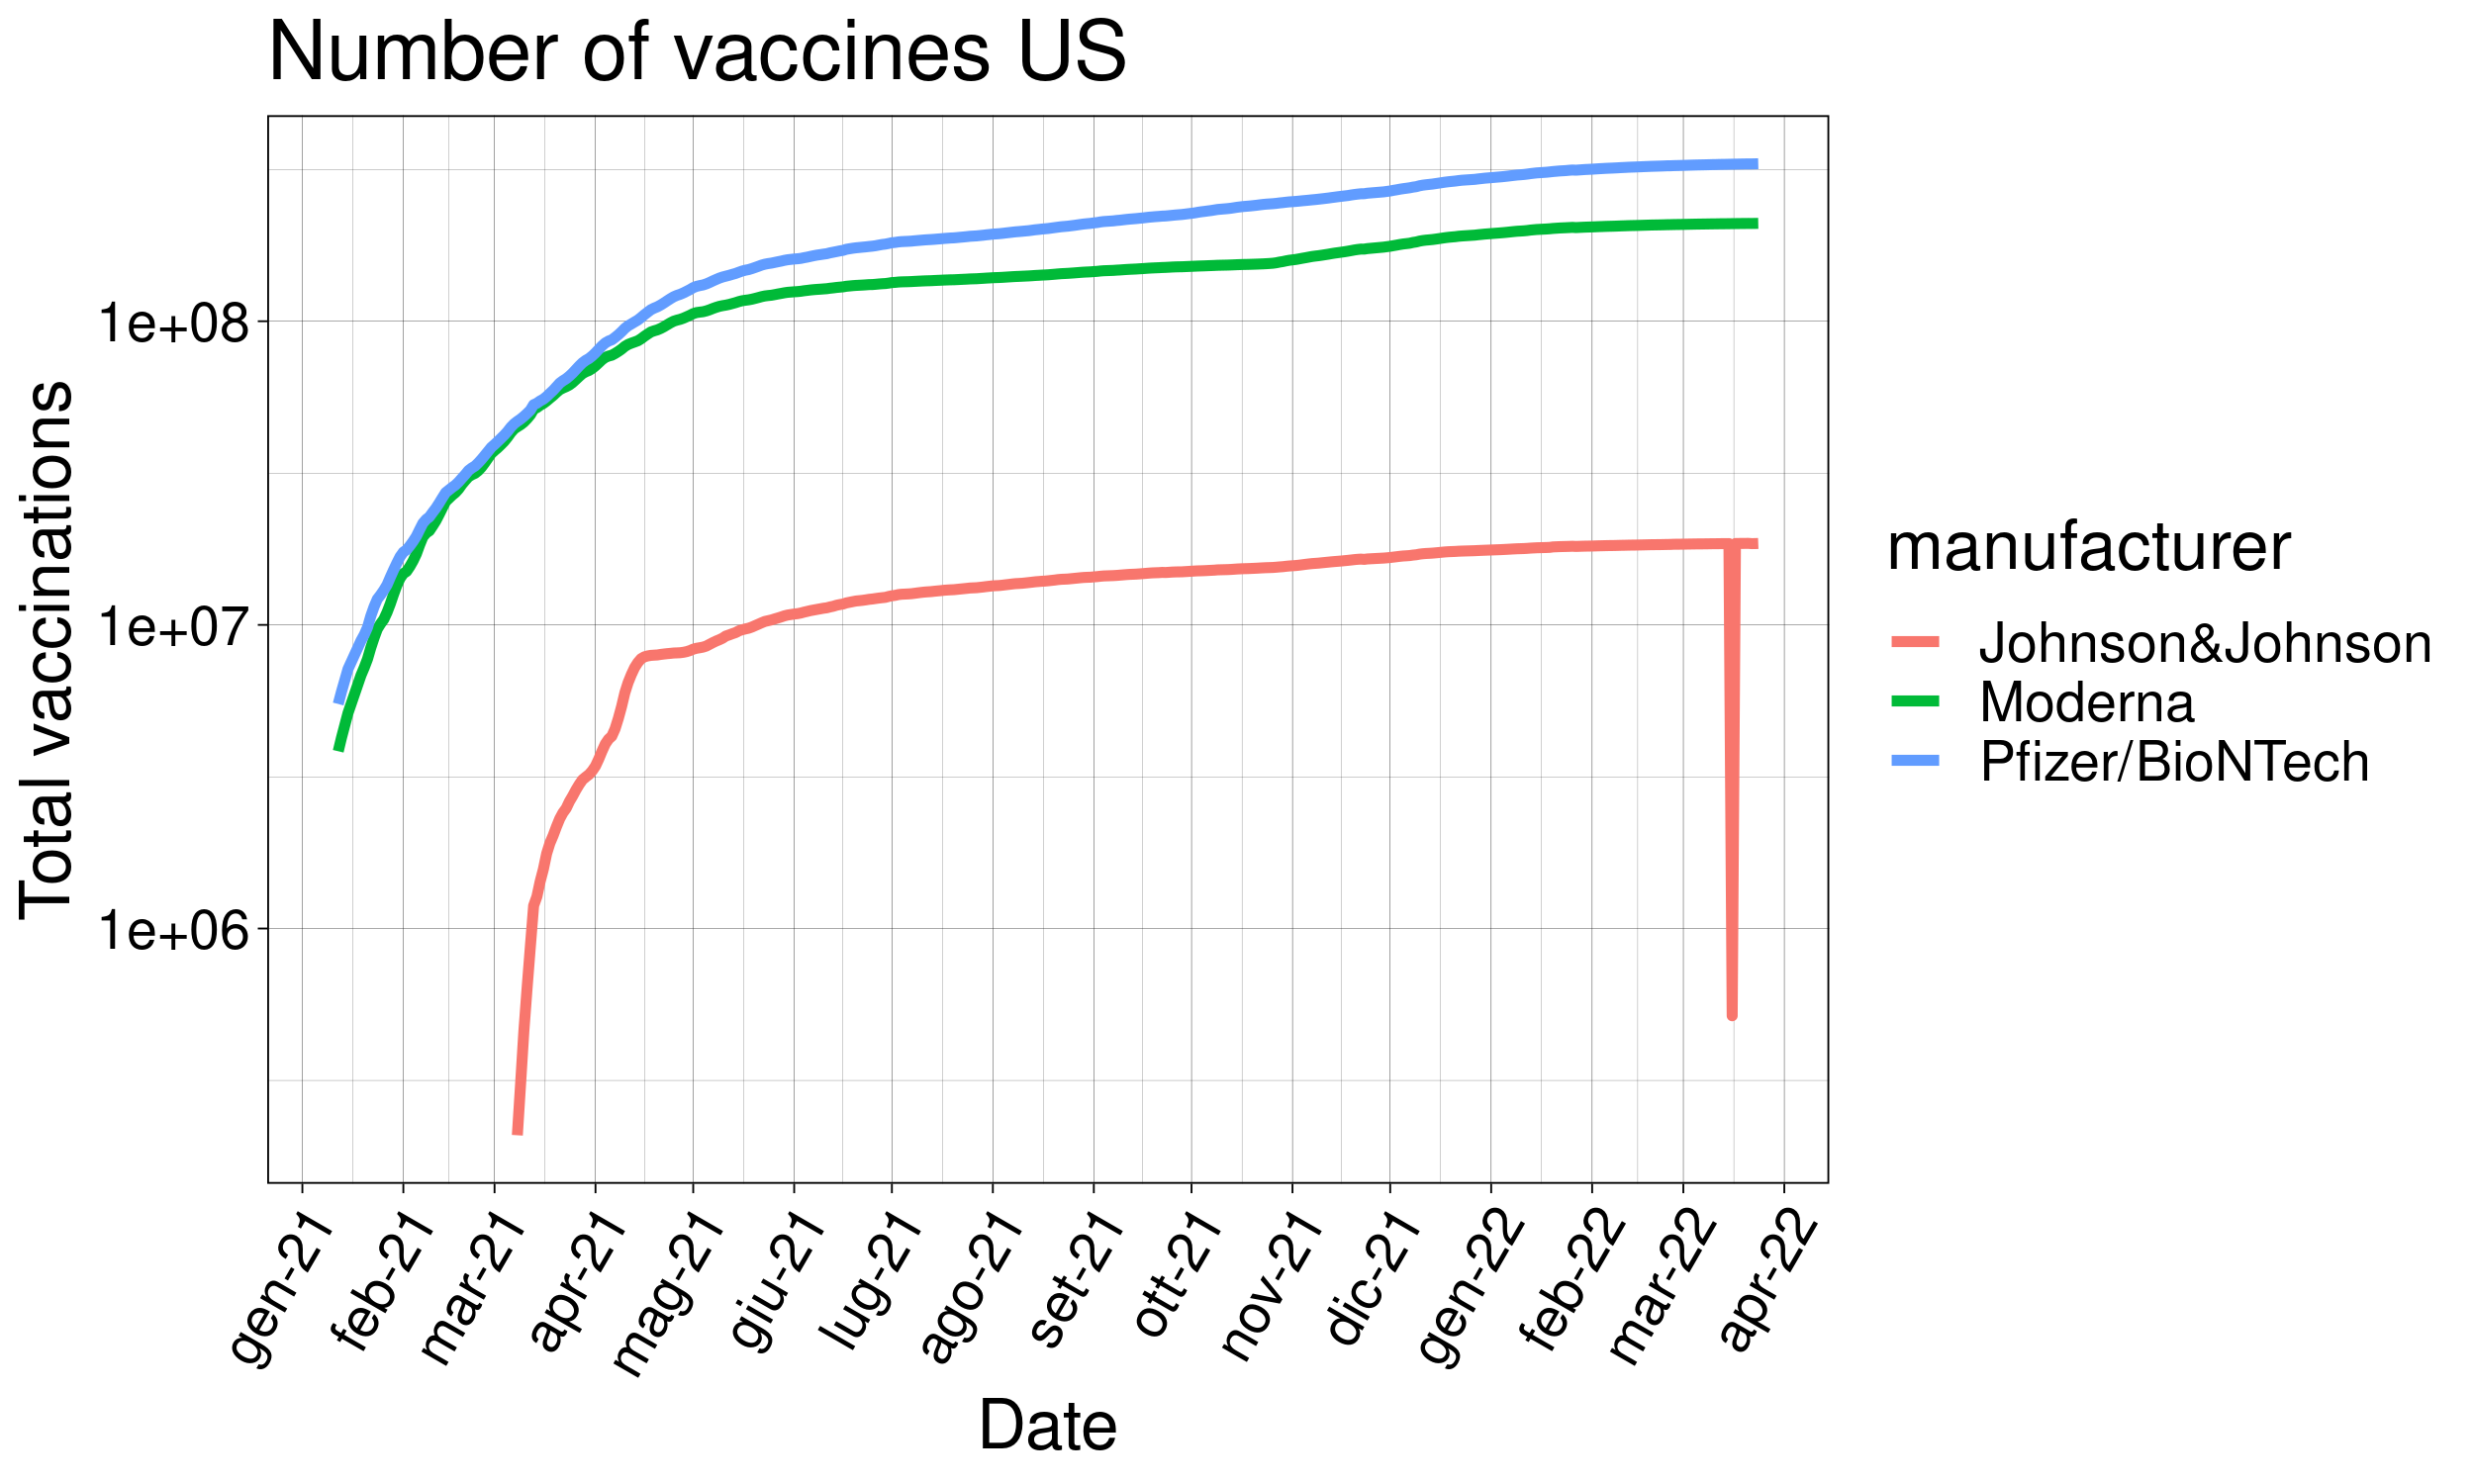

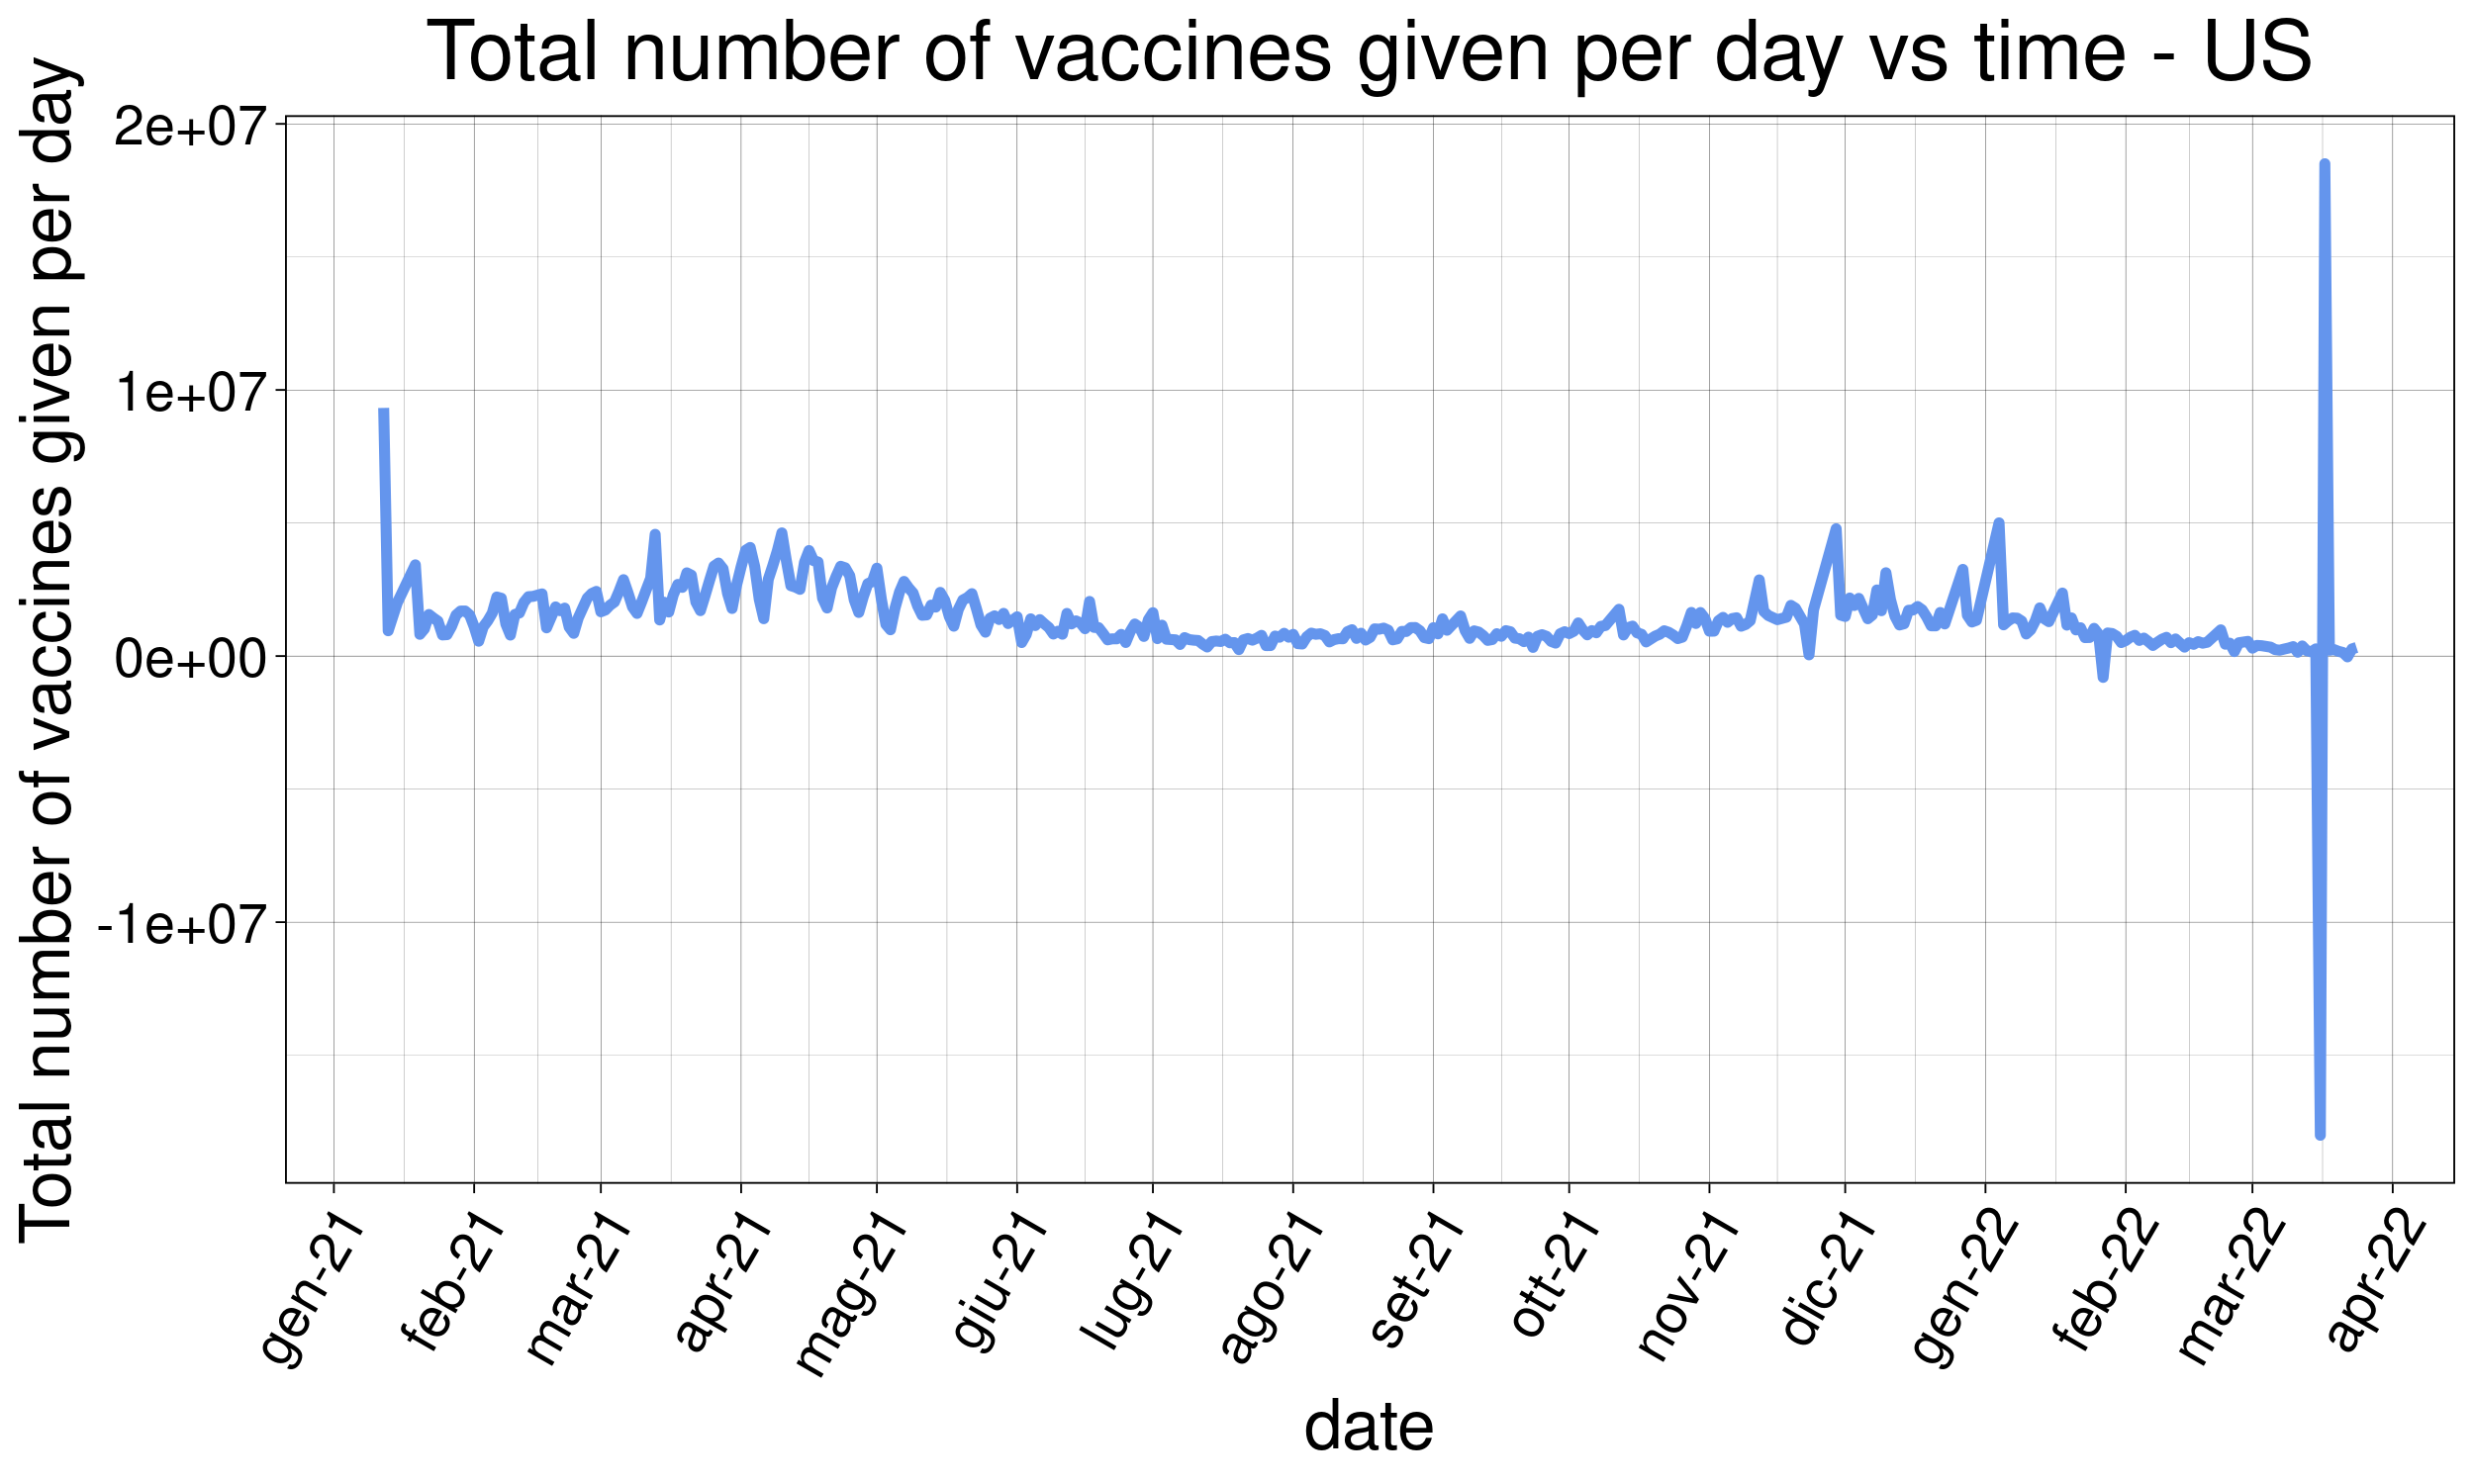

In [33]:
US_man_plot <- ggplot(data=US_filtered, aes(x=date, y=total_vaccinations, color=vaccine)) +   
     theme_linedraw() +                                            
     geom_line(lwd=1.5) +                                                             
     theme(text = element_text(size=20)) +
     labs(title="Number of vaccines US", x="Date", y="Total vaccinations", color="manufacturer")+
     theme(axis.text.x = element_text(angle = 60, hjust = 1)) +
     scale_x_date(date_breaks = "1 months", date_labels="%b-%y") +
     scale_y_continuous(trans='log10')     
    
US_man_plot

days <- unique(US_filtered$date)
vaccines <- unique(US_filtered$vaccine)

vac_per_day <- vector()
tot_vac <- vector()

day_vac <- data.frame(matrix(ncol = 5, nrow = 1))
day_vac[1,] <- integer(5); colnames(day_vac) <- vaccines

for (i in 1:length(days)){

    c <- US_filtered$vaccine[is.element(US_filtered$date, days[i]) ]
    v <- US_filtered$total_vaccinations[is.element(US_filtered$date, days[i]) ]
    # v <- filter(US, date == days[1])
    
    for (j in 1:length(c) ) {   
        day_vac[ c[j] ] <- v[j]
    }

    tot_vac <- append(tot_vac, sum(day_vac)) 
    
    if(i==1){ vac_per_day<-append(vac_per_day, tot_vac )        }
    else {vac_per_day <- append(vac_per_day, tot_vac[i] - tot_vac[i-1] ) }
     
}

US_day_plot <- ggplot() +
     theme_linedraw() +                                            
     geom_line(aes(x=unique(US_filtered$date), y=vac_per_day), 
               lwd=1.5,
               color="cornflowerblue") +                                                             
     theme(text = element_text(size=20)) +
     labs(title="Total number of vaccines given per day vs time - US", x="Date", y="Total number of vaccines given per day", color="manufacturer")+
     theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle = 60, hjust = 1)) +
     scale_x_date(date_breaks = "1 months", date_labels="%b-%y")  

US_day_plot

In the first day of vaccination in the USA, the number of daily vaccination is very large. It seems like there aren't previous information about the vaccination.
In fact the first data we have is the following (corresponding to the first day of vaccination in US):


In [34]:
US[US$date == as.Date(days[1]), ]
s <- sum(US[US$date == as.Date(days[1]), ]$total_vaccinations)
s

location,date,vaccine,total_vaccinations
<chr>,<date>,<chr>,<int>
United States,2021-01-12,Moderna,3835859
United States,2021-01-12,Pfizer/BioNTech,5488697


[1] 9324556

### Vaccinations.csv

In [35]:
#5
# read vaccinations.csv
file_vac = "/home/pietro/Desktop/Advance_stat/data/vaccinations.csv"
df_vac <- tibble(read.csv(file_vac))
df_vac$date = as.Date(df_vac$date)

str(df_vac)

tibble [90,716 × 16] (S3: tbl_df/tbl/data.frame)
 $ location                           : chr [1:90716] "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ iso_code                           : chr [1:90716] "AFG" "AFG" "AFG" "AFG" ...
 $ date                               : Date[1:90716], format: "2021-02-22" "2021-02-23" ...
 $ total_vaccinations                 : num [1:90716] 0 NA NA NA NA NA 8200 NA NA NA ...
 $ people_vaccinated                  : num [1:90716] 0 NA NA NA NA NA 8200 NA NA NA ...
 $ people_fully_vaccinated            : num [1:90716] NA NA NA NA NA NA NA NA NA NA ...
 $ total_boosters                     : int [1:90716] NA NA NA NA NA NA NA NA NA NA ...
 $ daily_vaccinations_raw             : int [1:90716] NA NA NA NA NA NA NA NA NA NA ...
 $ daily_vaccinations                 : int [1:90716] NA 1367 1367 1367 1367 1367 1367 1580 1794 2008 ...
 $ total_vaccinations_per_hundred     : num [1:90716] 0 NA NA NA NA NA 0.02 NA NA NA ...
 $ people_vaccinated_per_

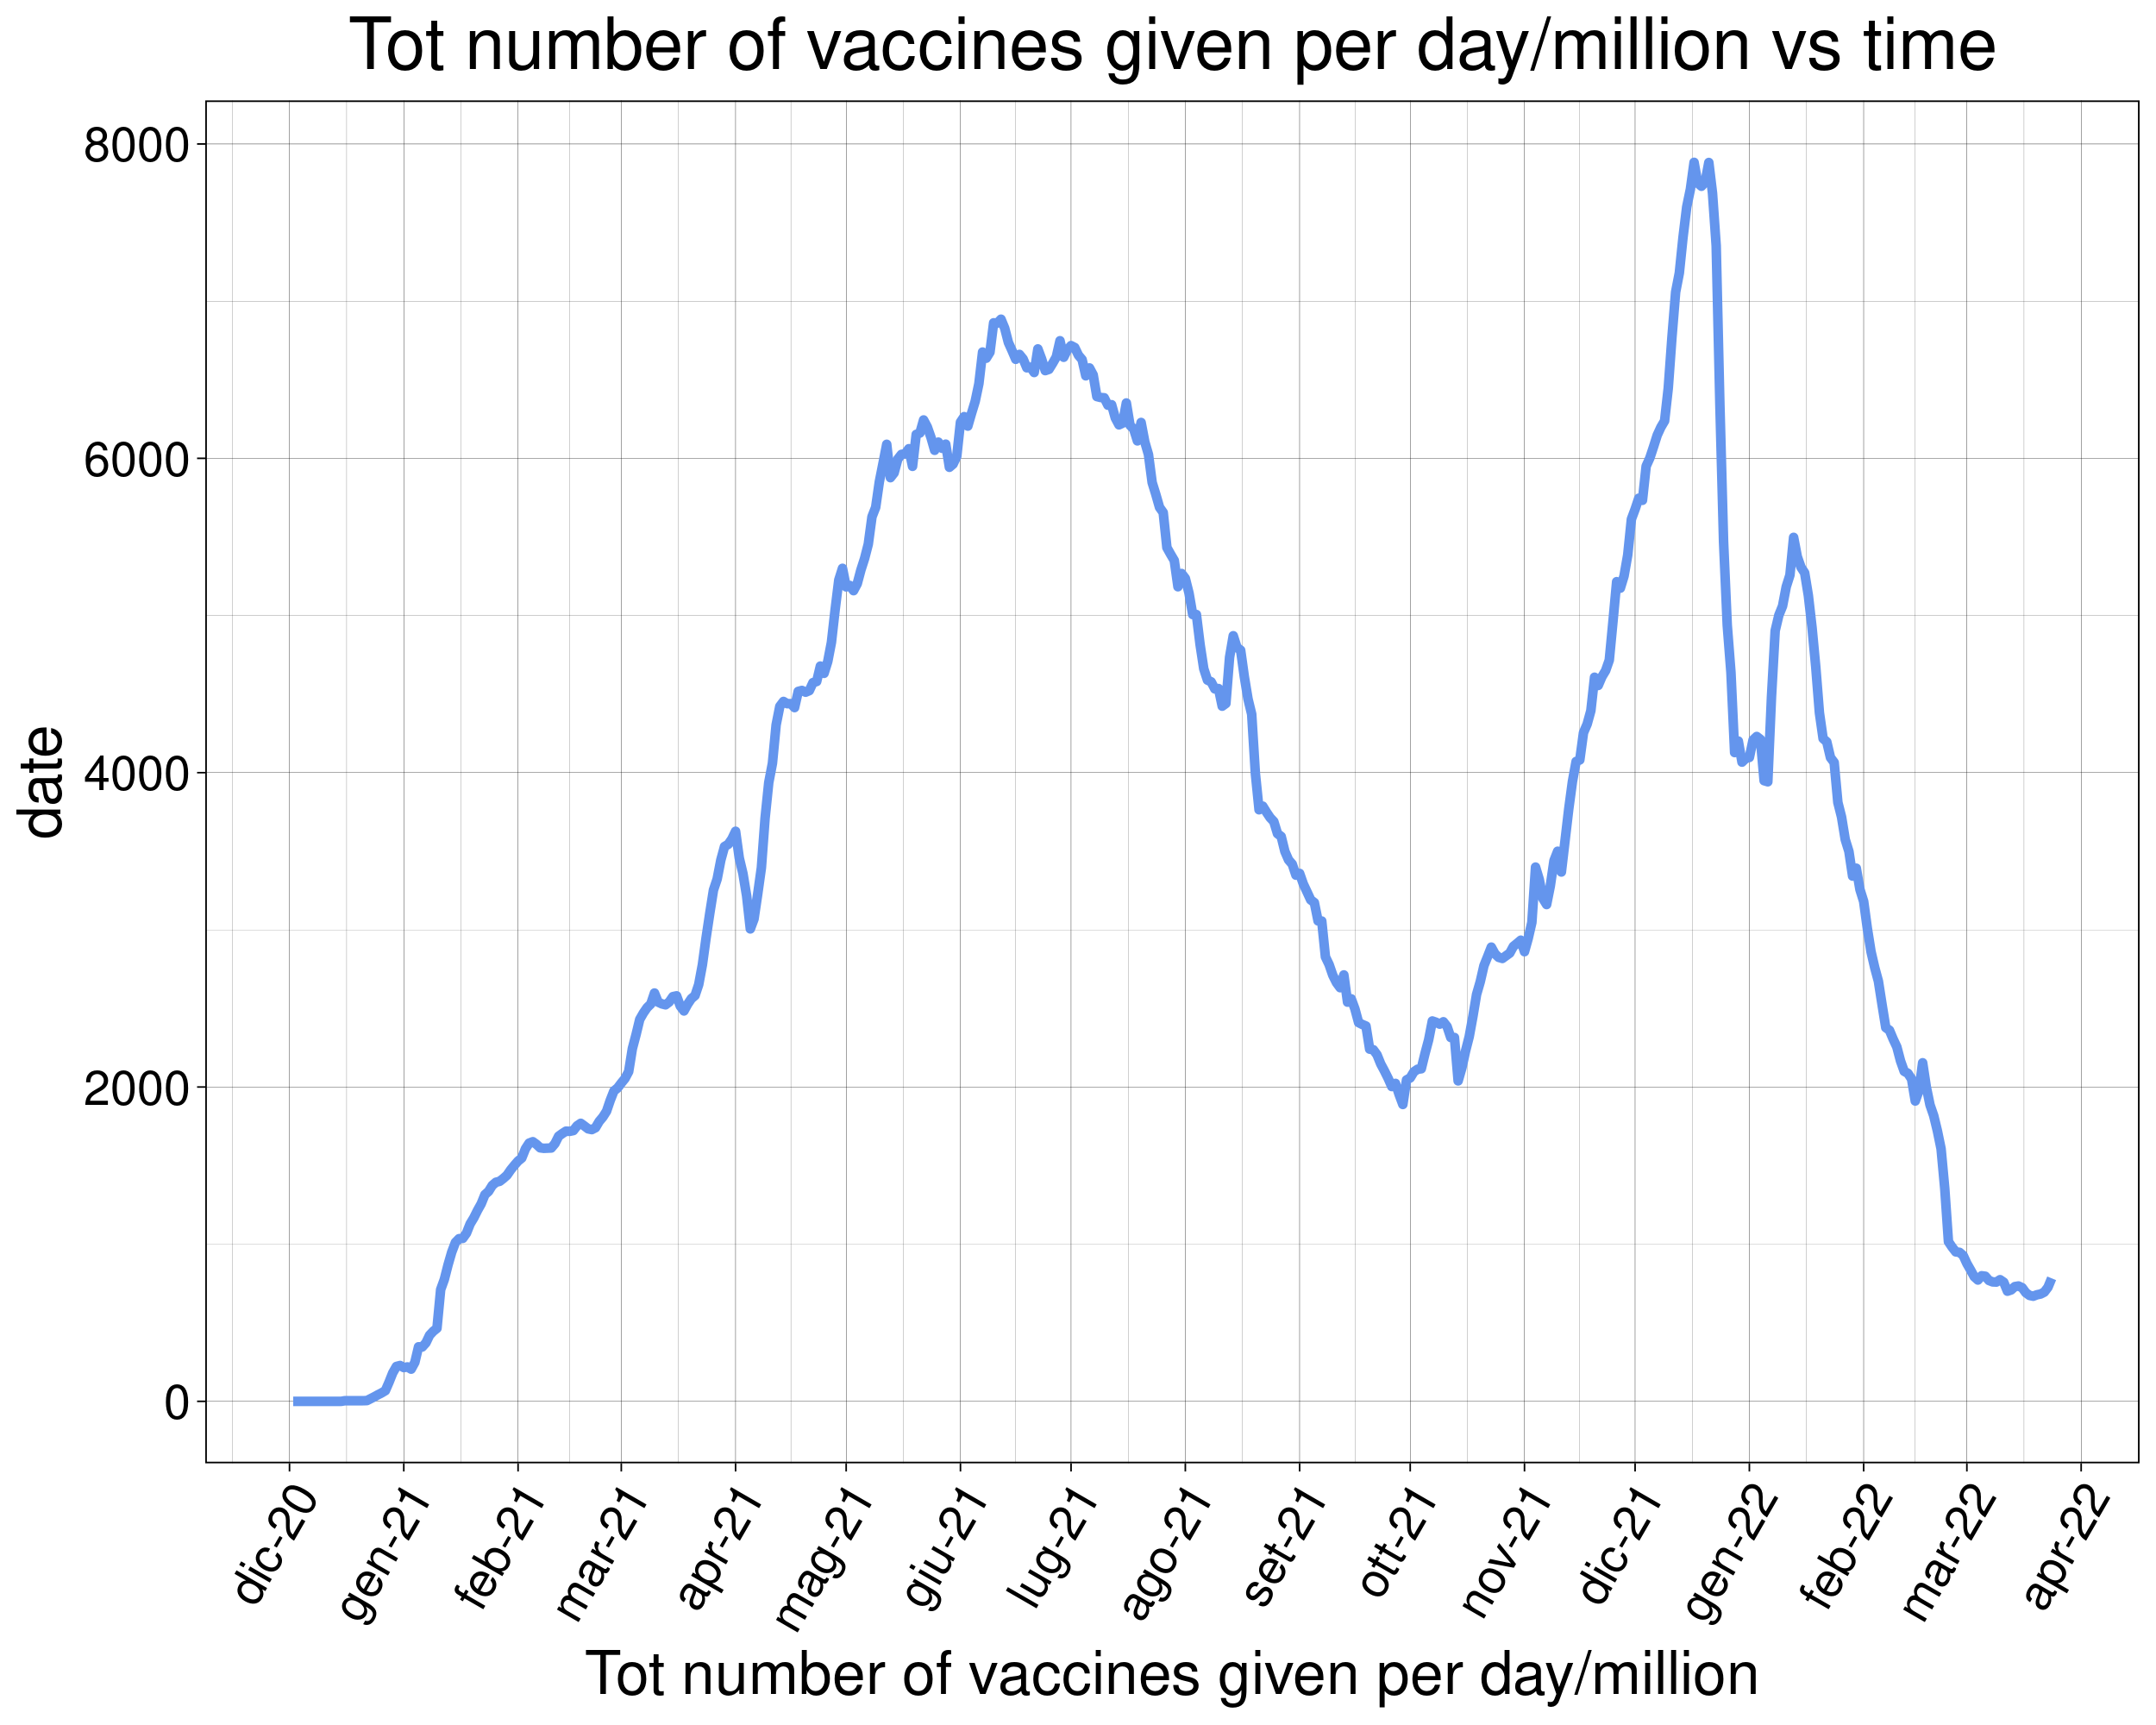

In [36]:
EU_iso_code <- c("AUT","BEL", "BGR","HRV","CYP", "CZE", "DNK", "EST", "FIN", "FRA","DEU", "GRC","HUN",
"IRL","ITA","LVA","LTU","LUX","MLT","NLD","POL","PRT","ROU","SVK","SVN","ESP","SWE","GBR")

# EU <- df_vac[df_vac$iso_code %in% EU_iso_code, ]
EU <- df_vac[df_vac$iso_code == "OWID_EUR", ]
# compute total vaccines per day
vac_per_day_EU <- aggregate(EU$daily_vaccinations_per_million, list(EU$date), sum)

options(repr.plot.width=10, repr.plot.height=8) 
europe_day_plot <- ggplot() +   
      theme_linedraw() +                                            
      geom_line(aes(x=EU$date, y=EU$daily_vaccinations_per_million), 
               lwd=1.5,
               color="cornflowerblue") +                                                             
      theme(text = element_text(size=20)) +
      labs(x="Tot number of vaccines given per day/million" , y= "date") +
      ggtitle("Tot number of vaccines given per day/million vs time") +
      theme(plot.title = element_text(hjust = 0.5),
           axis.text.x = element_text(angle = 60, hjust = 1)) +
      scale_x_date(date_breaks = "1 months", date_labels="%b-%y")

europe_day_plot


4.1


In [37]:
# first of all let's see the structure of the dataset, looking the col names
str(df_vac)

tibble [90,716 × 16] (S3: tbl_df/tbl/data.frame)
 $ location                           : chr [1:90716] "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ iso_code                           : chr [1:90716] "AFG" "AFG" "AFG" "AFG" ...
 $ date                               : Date[1:90716], format: "2021-02-22" "2021-02-23" ...
 $ total_vaccinations                 : num [1:90716] 0 NA NA NA NA NA 8200 NA NA NA ...
 $ people_vaccinated                  : num [1:90716] 0 NA NA NA NA NA 8200 NA NA NA ...
 $ people_fully_vaccinated            : num [1:90716] NA NA NA NA NA NA NA NA NA NA ...
 $ total_boosters                     : int [1:90716] NA NA NA NA NA NA NA NA NA NA ...
 $ daily_vaccinations_raw             : int [1:90716] NA NA NA NA NA NA NA NA NA NA ...
 $ daily_vaccinations                 : int [1:90716] NA 1367 1367 1367 1367 1367 1367 1580 1794 2008 ...
 $ total_vaccinations_per_hundred     : num [1:90716] 0 NA NA NA NA NA 0.02 NA NA NA ...
 $ people_vaccinated_per_

Warning message:
“Removed 53 row(s) containing missing values (geom_path).”


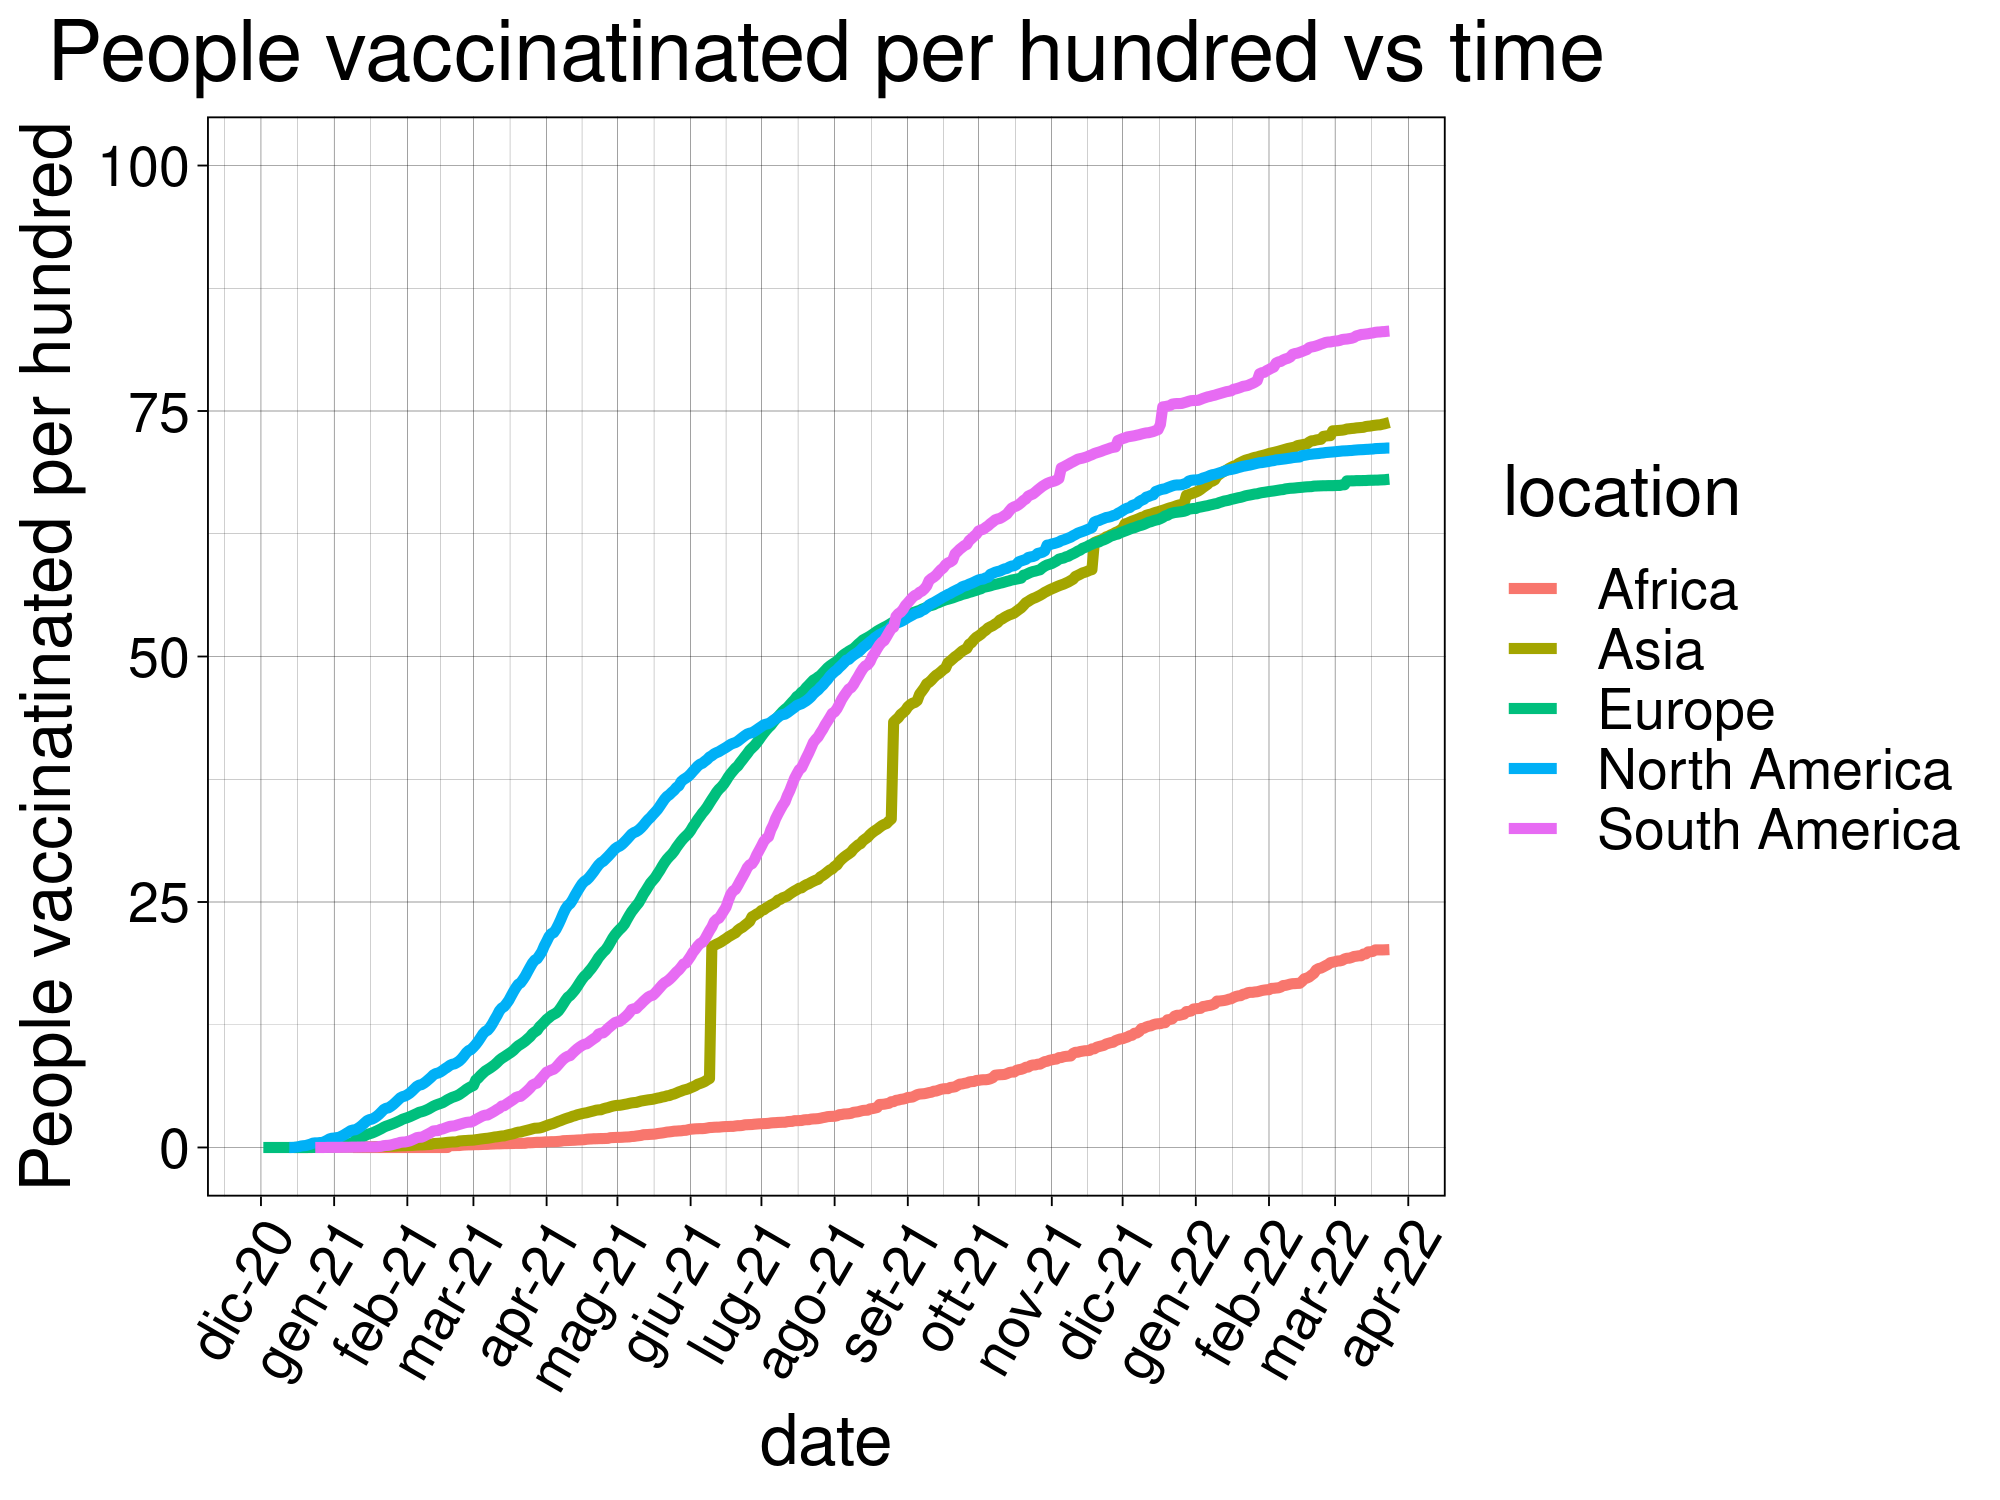

Warning message:
“Removed 505 row(s) containing missing values (geom_path).”


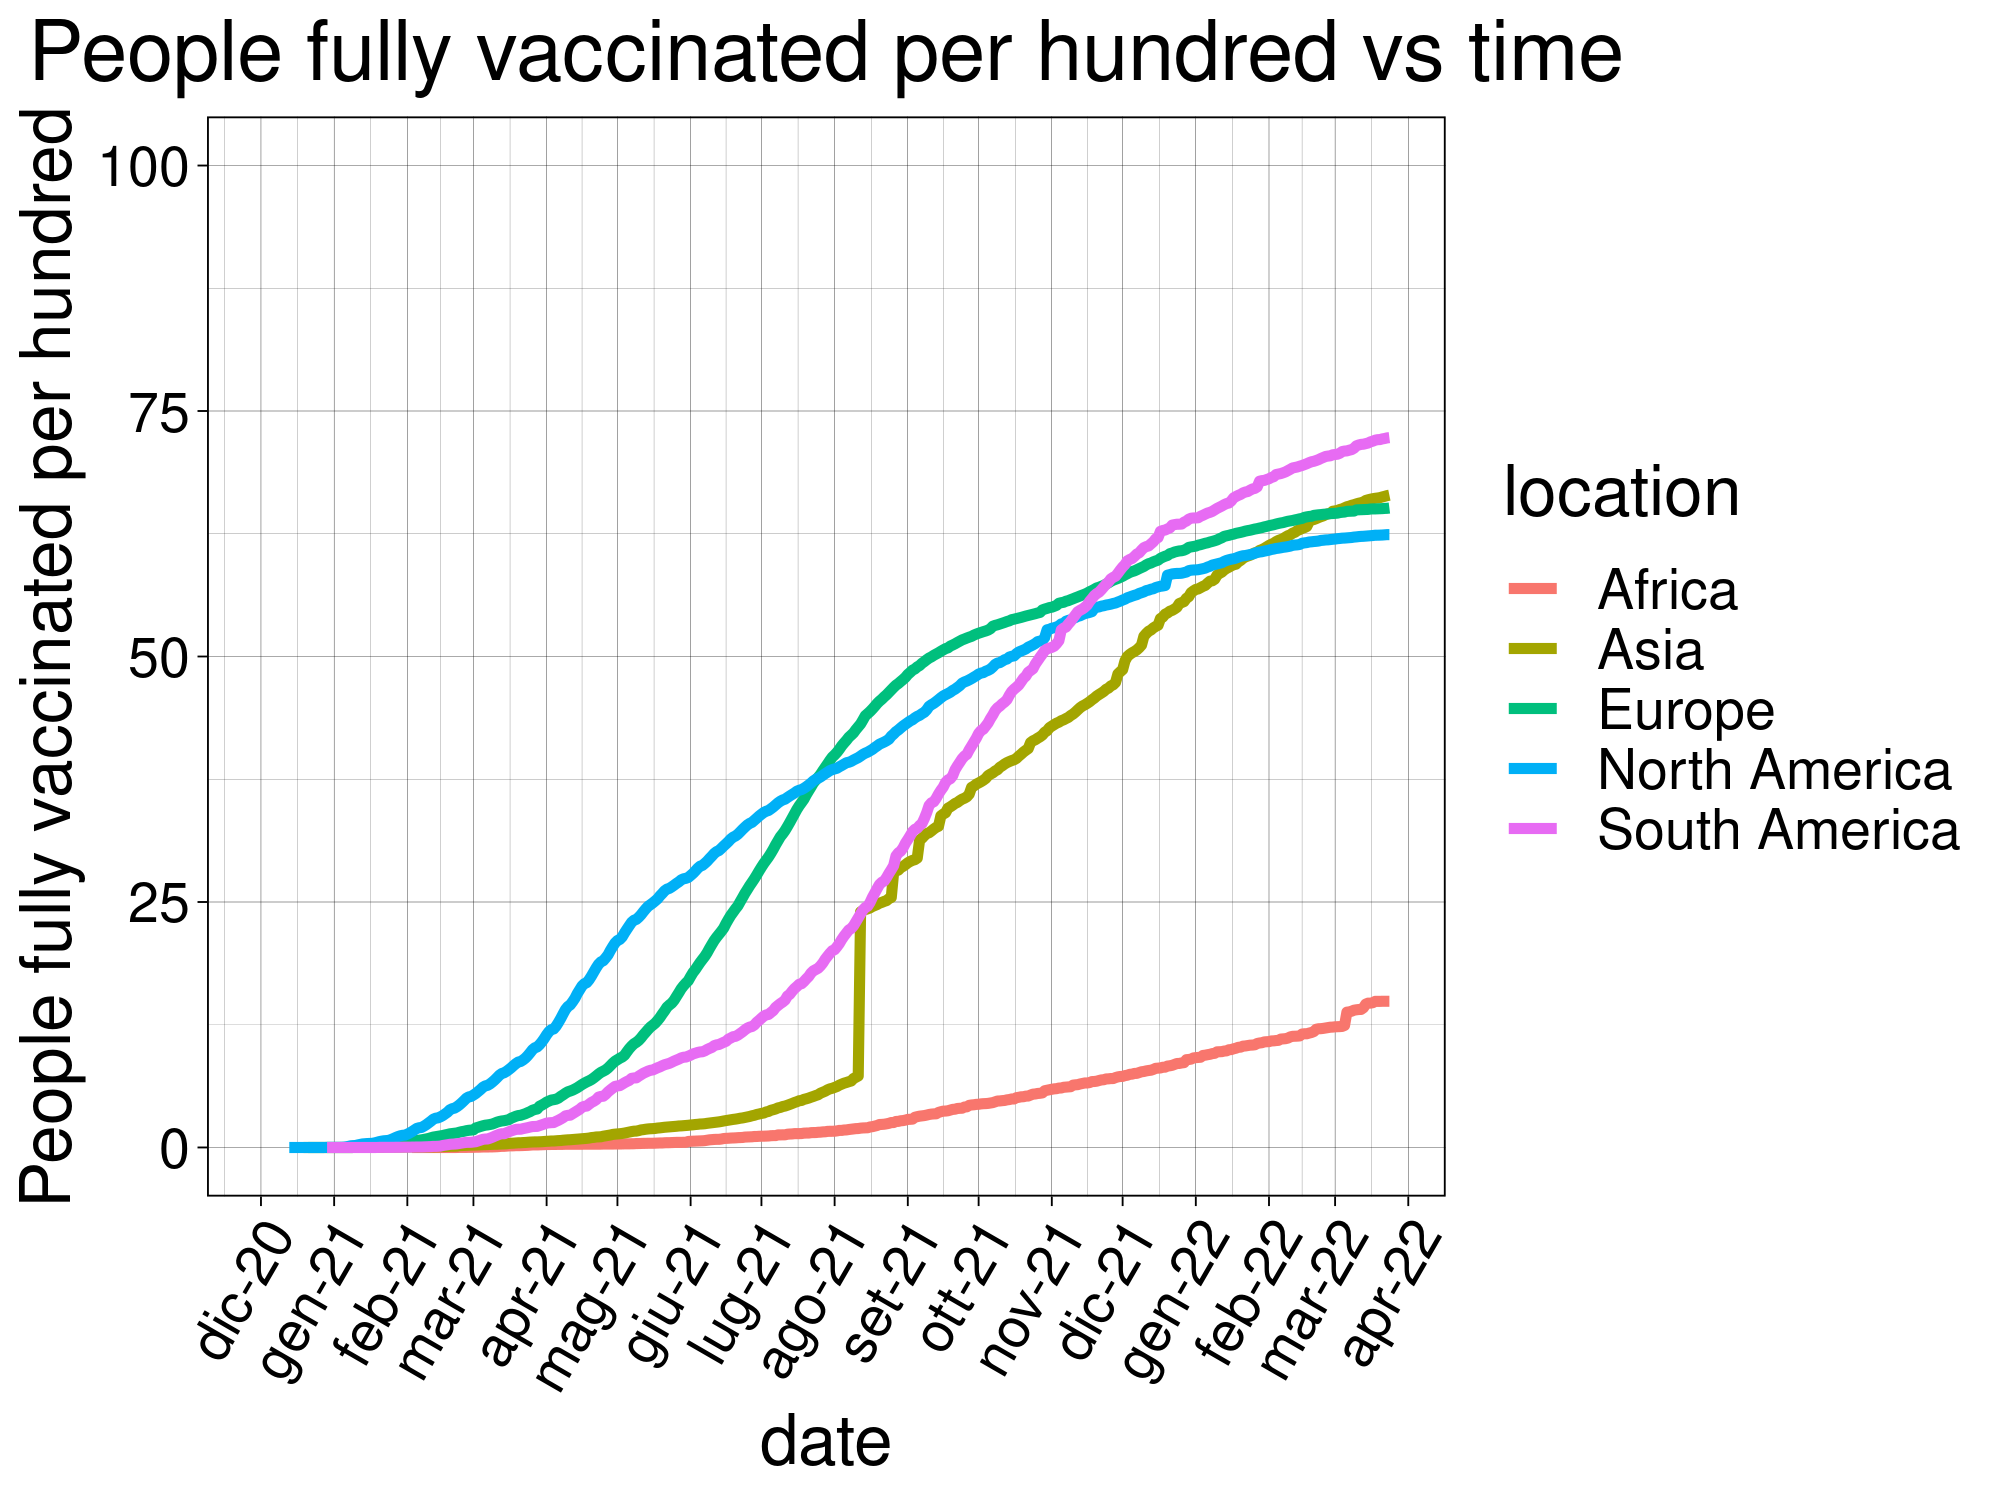

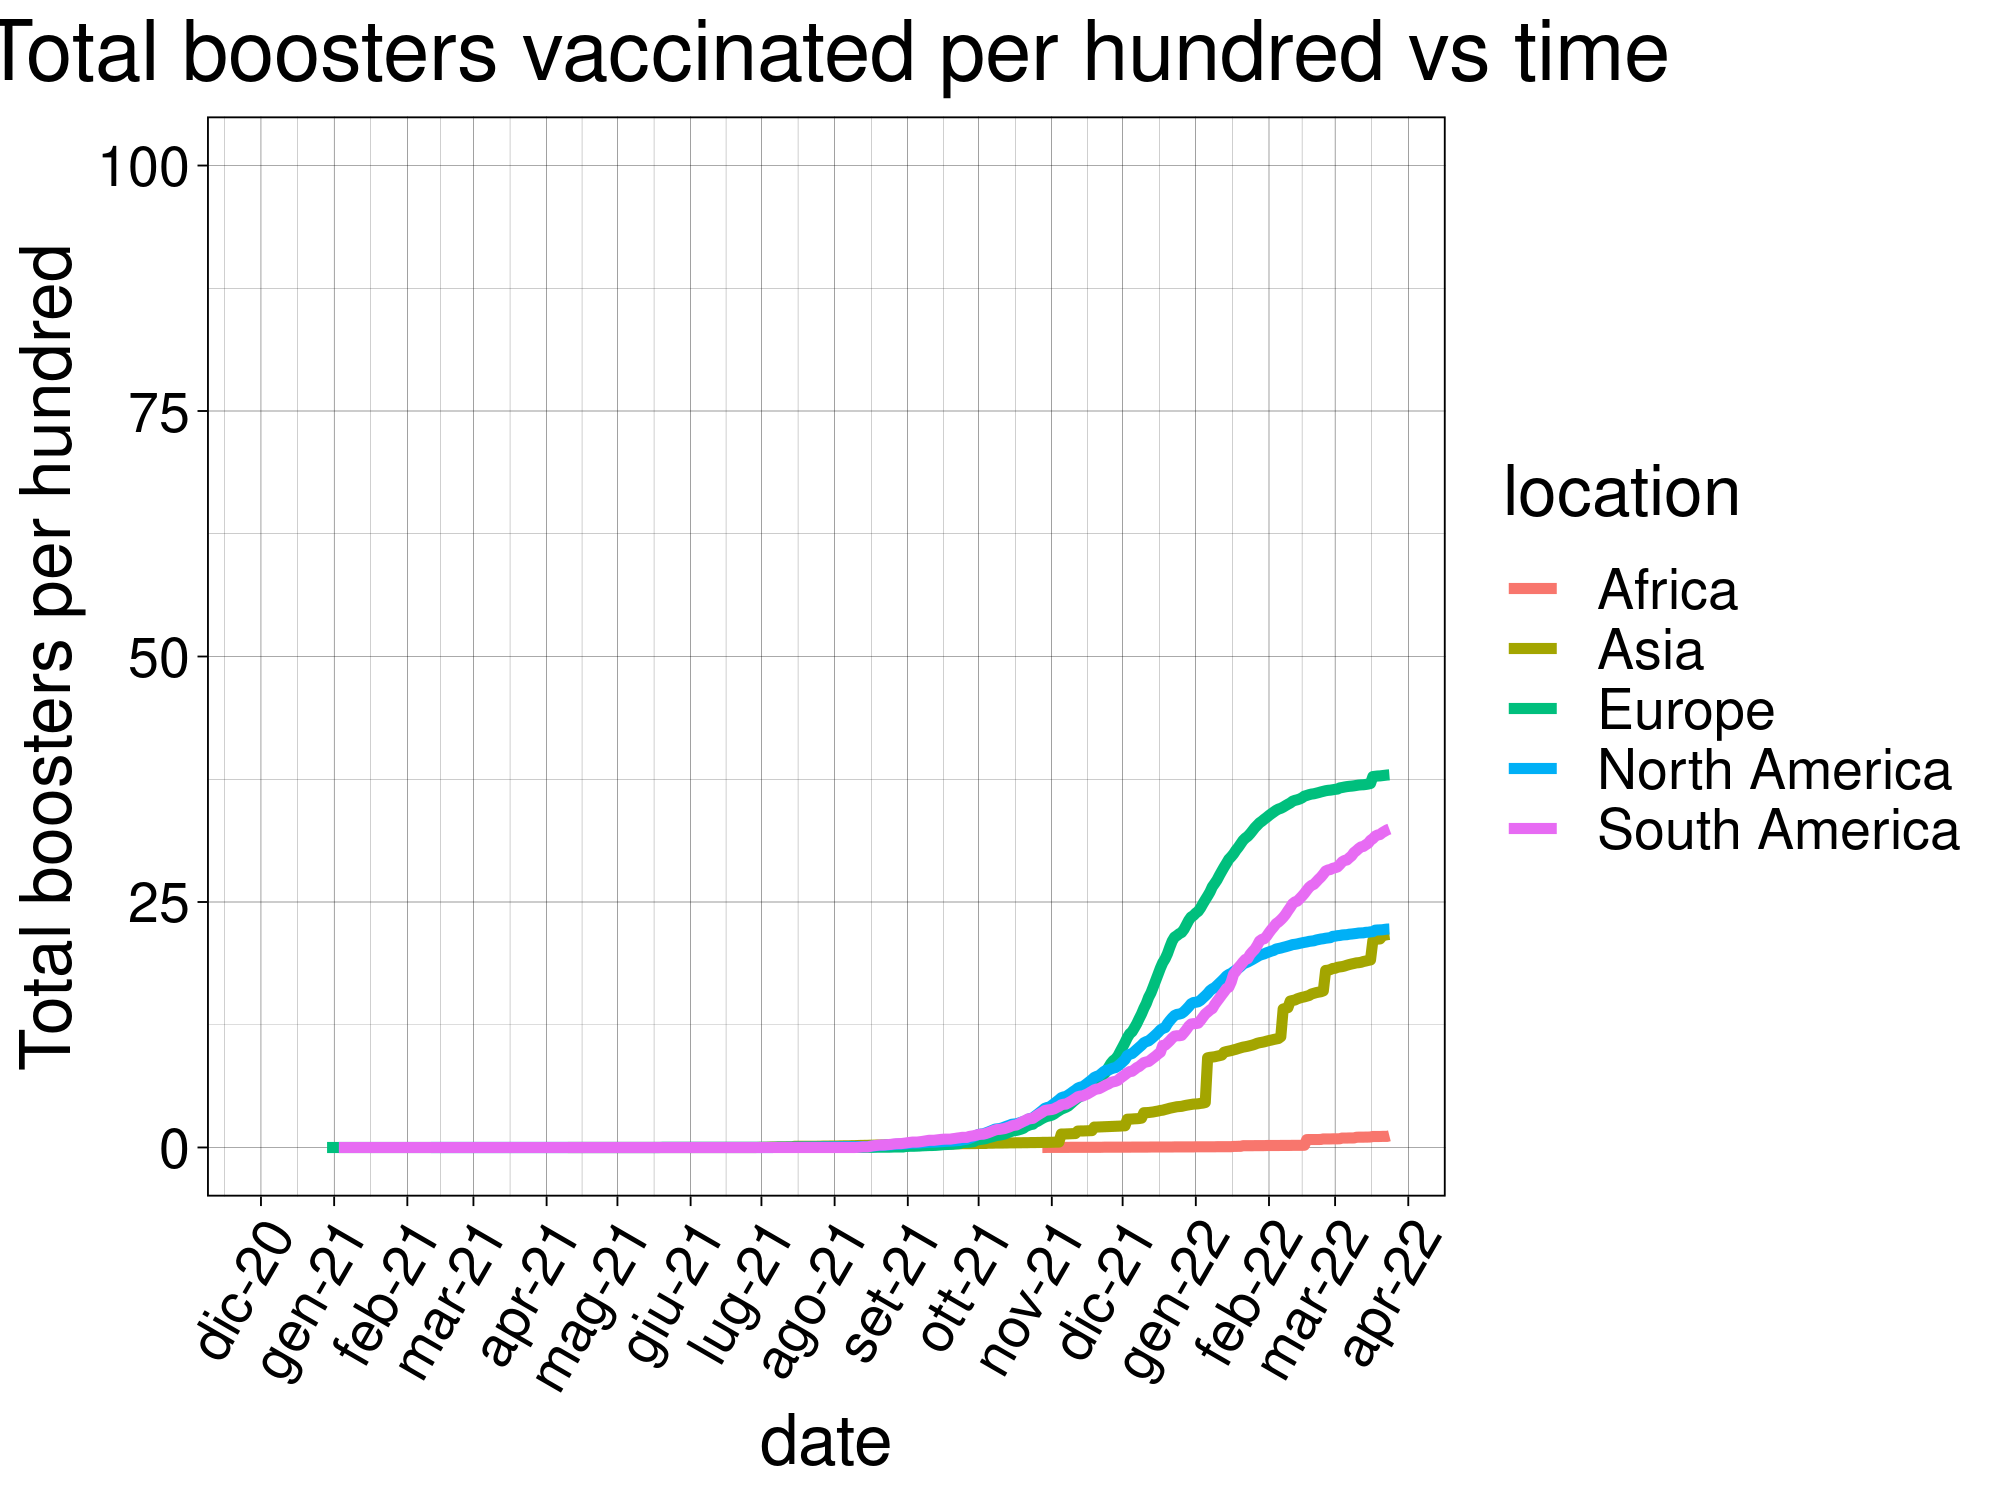

In [56]:
# select only continents
entities <- c("Europe", "Asia", "Africa", "North America", "South America")
df_vac_ <- df_vac[df_vac$location %in% entities, ]
options(repr.plot.width=8, repr.plot.height=6) 

p1 <- ggplot(data=df_vac_) +   
     theme_linedraw() +                                            
     geom_line(lwd=1.5, aes(x=date, y=people_vaccinated_per_hundred, color=location)) +                                                               
     theme(text = element_text(size=20)) +
     ylab("People vaccinatinated per hundred") +
     ggtitle("People vaccinatinated per hundred vs time") +
     theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle = 60, hjust = 1)) +
     scale_x_date(date_breaks = "1 months", date_labels="%b-%y") +
     ylim(0, 100)

p2 <- ggplot(data=df_vac_) +   
     theme_linedraw() +                                            
     geom_path(lwd=1.5, aes(x=date, y=people_fully_vaccinated_per_hundred, color=location)) +                                                               
     theme(text = element_text(size=20)) +
     ylab("People fully vaccinated per hundred") +
     ggtitle("People fully vaccinated per hundred vs time") +
     theme(plot.title = element_text(hjust = 0.5),
           axis.text.x = element_text(angle = 60, hjust = 1)) +
     scale_x_date(date_breaks = "1 months", date_labels="%b-%y") +
     ylim(0, 100) 


p3 <- ggplot(data=df_vac_) +   
     theme_linedraw() +                                            
     geom_line(lwd=1.5, aes(x=date, y=total_boosters_per_hundred, color=location)) +                                                               
     theme(text = element_text(size=20), ) +
     ylab("Total boosters per hundred") +
     ggtitle("Total boosters vaccinated per hundred vs time") +
     theme(plot.title = element_text(hjust = 0.5),
           axis.text.x = element_text(angle = 60, hjust = 1)) +
     scale_x_date(date_breaks = "1 months", date_labels="%b-%y") +
     ylim(0, 100)


p1
p2
p3

As we can see there is a lot of difference between Africa and the other continents